In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pingouin as pg

#df_anno = pd.read_feather("./NHP_BG_AIT_115_NCBI/RSC-204-361/NHP_BG_AIT_115_NCBI_RSC-204-361_map_full/anno.feather") 
#df_anno = pd.read_feather("./NHP_BG_AIT_115/204_346/anno.feather")   # Has subclass colors
#df_anno = pd.read_csv("./NHP_BG_AIT_115/204_337/NHP_BG_204_337_AIT115_ann_map_QC_full.csv")

df_anno = pd.read_feather("./NHP_BG_AIT_116/NHP_BG_AIT_116_RSC-204-377_map_full/anno.feather")
# Use feather file if you want color labels

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
df_anno.columns

Index(['sample_name_old', 'exp_component_name_id', 'exp_component_name_label',
       'exp_component_name_color', 'exp_component_vendor_name_id',
       'exp_component_vendor_name_label', 'exp_component_vendor_name_color',
       'batch_id', 'batch_label', 'batch_color',
       ...
       'contaminationType_label', 'contaminationType_color', 'contam_sum_id',
       'contam_sum_label', 'contam_sum_color', 'ar_id', 'reference_id',
       'cell_id', 'sample_id', 'cluster'],
      dtype='object', length=510)

In [3]:
xls = pd.ExcelFile('HMBA_BG_consensus_annotation.xlsx')
df_lt = pd.read_excel(xls, 'linking_table')
print(set(df_anno['Subclass_Corr_label'])-set(df_lt['previous_nomenclature']))
link = df_lt.set_index('previous_nomenclature').level4_group.to_dict()
#link
link['SLC17A7'] = 'Formerly SLC17A7'
link['SLC17A7-SATB2'] = 'Formerly SLC17A7-SATB2'
link['Gluta_PVALB-SLC17A6-CLMN'] = 'Formerly Gluta_PVALB-SLC17A6-CLMN'


{'SLC17A7', 'Gluta_PVALB-SLC17A6-CLMN'}


In [5]:
#df_ephys = pd.read_csv("NHPephys_features_090523.csv")
df_ephys = pd.read_csv("NHP_ephys_features_20241204.csv")
df_ephys.columns

Index(['cell_name', 'blowout_mv_qc', 'electrode_0_pa_qc', 'recording_date_qc',
       'seal_gohm_qc', 'input_resistance_mohm_qc',
       'initial_access_resistance_mohm_qc', 'input_access_resistance_ratio_qc',
       'fail_tags_qc', 'failed_blowout',
       ...
       'first_isi_inv_hero', 'peak_ratio_chirp', 'peak_freq_chirp',
       '3db_freq_chirp', 'peak_impedance_chirp', 'low_freq_impedance_chirp',
       'sync_freq_chirp', 'phase_peak_chirp', 'phase_low_chirp',
       'total_inductive_phase_chirp'],
      dtype='object', length=117)

In [6]:
df_ephys['recording_date_qc'].sort_values()

2483    2019-10-10 23:56:30
2529    2019-10-22 21:16:40
184     2019-10-22 21:51:42
755     2019-10-22 22:54:15
596     2019-10-22 23:43:19
               ...         
1963    2024-11-14 23:06:04
79      2024-11-14 23:36:27
1920    2024-11-15 00:35:06
352     2024-11-19 22:22:05
2027    2024-11-19 22:49:05
Name: recording_date_qc, Length: 2734, dtype: object

In [14]:
df_id = pd.read_csv("custom_report_20241119.csv")

In [15]:
print('Cultured: ', sum(df_id['project ']=='qIVSCC-METc'))
print('Acute: ', sum(df_id['project ']=='qIVSCC-METa'))

Cultured:  1148
Acute:  1593


In [16]:
df2 = pd.merge(df_anno, df_id, how='inner', left_on='cell_name_label', right_on='cell_specimen_name ', sort=True)

len(df2)

2040

In [17]:
len(df_anno)

3211

In [18]:
len(df_id)

2741

In [19]:
df3 = pd.merge(df2, df_ephys, how='inner', left_on='cell_specimen_id ', right_on='cell_name', sort=True)
len(df3)

2036

In [20]:
set(df3['roi_label'])

{'CTXsp_LCLA',
 'CTXsp_L_CLA',
 'HIPb_CA1',
 'HIPb_CA2',
 'HIPb_CA3',
 'HIPb_CA4',
 'HIPb_DG',
 'HYSTN',
 'ICx_L_L3',
 'ICx_L_L5',
 'MOp_L_L2-3',
 'MOp_L_L5',
 'OT_L1',
 'OT_L2',
 'OT_L3',
 'PALGPi',
 'PAL_GPe',
 'PAL_GPi',
 'PFCx_L_L1',
 'PFCx_L_L2',
 'PFCx_L_L3',
 'PFCx_L_L5',
 'STRd',
 'STRdCP',
 'STRdCa',
 'STRdPu',
 'STRd_CP',
 'STRd_Ca',
 'STRd_Pu',
 'STRvACB',
 'STRv_ACB',
 'TCx_L2',
 'TCx_L_L1',
 'TCx_L_L2',
 'TCx_L_L3',
 'TCx_L_L3a',
 'TCx_L_L3c',
 'TCx_L_L4',
 'TCx_L_L5',
 'TCx_L_L6',
 'VISp_L_L1',
 'VISp_L_L2-3',
 'VISp_L_L4',
 'VISp_L_L4a',
 'VISp_L_L4b',
 'VISp_L_L4c',
 'VISp_L_L5-6',
 'ZZ_Missing'}

In [21]:
set(df3['Subclass_Tree_label'])

{'CCK-FBXL7',
 'CCK-VIP-TAC3',
 'CHAT',
 'D1-ICj',
 'D1-Matrix',
 'D1-NUDAP',
 'D1-ShellOT',
 'D1-Striosome',
 'D1D2-Hybrid',
 'D2-Hybrid-MCHR2',
 'D2-Matrix',
 'D2-ShellOT',
 'D2-Striosome',
 'GABA_PVALB-GATA3',
 'GP-LHX6',
 'GPi_Core',
 'GPi_Shell',
 'Gluta_PVALB-CDH23',
 'LHX6-LHX8-GBX1',
 'LHX6-SATB1',
 'LHX6-TAC3-PLPP4',
 'MEIS2',
 'NAc-CCK-SEMA3A',
 'NAc-LHX8',
 'PVALB-COL19A1-ST18',
 'SLC17A6',
 'SLC17A7',
 'SN_STH',
 'SN_STH-GATA3',
 'SN_STH-PAX8',
 'SN_STH_GPe-MEIS2-OTX2',
 'SST-ADARB2',
 'SST-RSPO2',
 'SST_Chodl',
 'TAC3-LHX8-PLPP4',
 'TH'}

In [22]:
df3_filt = df3[['STR' in roi for roi in df3['roi_label']]]
#inds1 = ifelse(grepl("STR|PALGPi|HYSTN",annoNew$roi), TRUE,FALSE)

df3_filt = df3_filt[df3_filt['percent_reads_aligned_total_label']>=25]    # was 50%
print(len(df3_filt))
df3_filt = df3_filt[df3_filt['Genes.Detected_label']>=1000]
print(len(df3_filt))
#df3_filt = df3_filt[df3_filt['score.Corr']>=0.55]
df3_filt = df3_filt[df3_filt['marker_sum_norm_label'] >= 0.6]
print(len(df3_filt))
#df3_filt = df3_filt[df3_filt['rna_amplification_pass_fail_label']=='Pass']
print(df3_filt.shape)
# Layer labels have no numerics, no need to filter

1199
1083
761
(761, 695)


In [23]:
df3_filt['Virus_label'].value_counts()

None          634
CN3445         54
ZZ_Missing     20
               16
CN2421         12
CN3738          6
CN4609          6
CN1390          4
CN3596          2
CN2292          2
CN5050          2
CN1839          1
CN2451          1
CN4731          1
Name: Virus_label, dtype: int64

In [24]:
df3_filt['creCell_label'].value_counts()

ZZ_Missing    592
Positive      104
Negative       41
Cre-           17
None            7
Name: creCell_label, dtype: int64

In [25]:
df_3445 = df3_filt[(df3_filt['Virus_label']=="CN3445") & (df3_filt['creCell_label']=='Positive')]
len(df_3445)

53

In [26]:
df3_filt["CN3445"] = "CN3445-"
df3_filt.loc[(df3_filt['Virus_label']=="CN3445") & (df3_filt['creCell_label']=='Positive'), "CN3445"] = 'CN3445+'
df3_filt["CN3445"].value_counts()

CN3445-    708
CN3445+     53
Name: CN3445, dtype: int64

<Figure size 1440x2880 with 0 Axes>

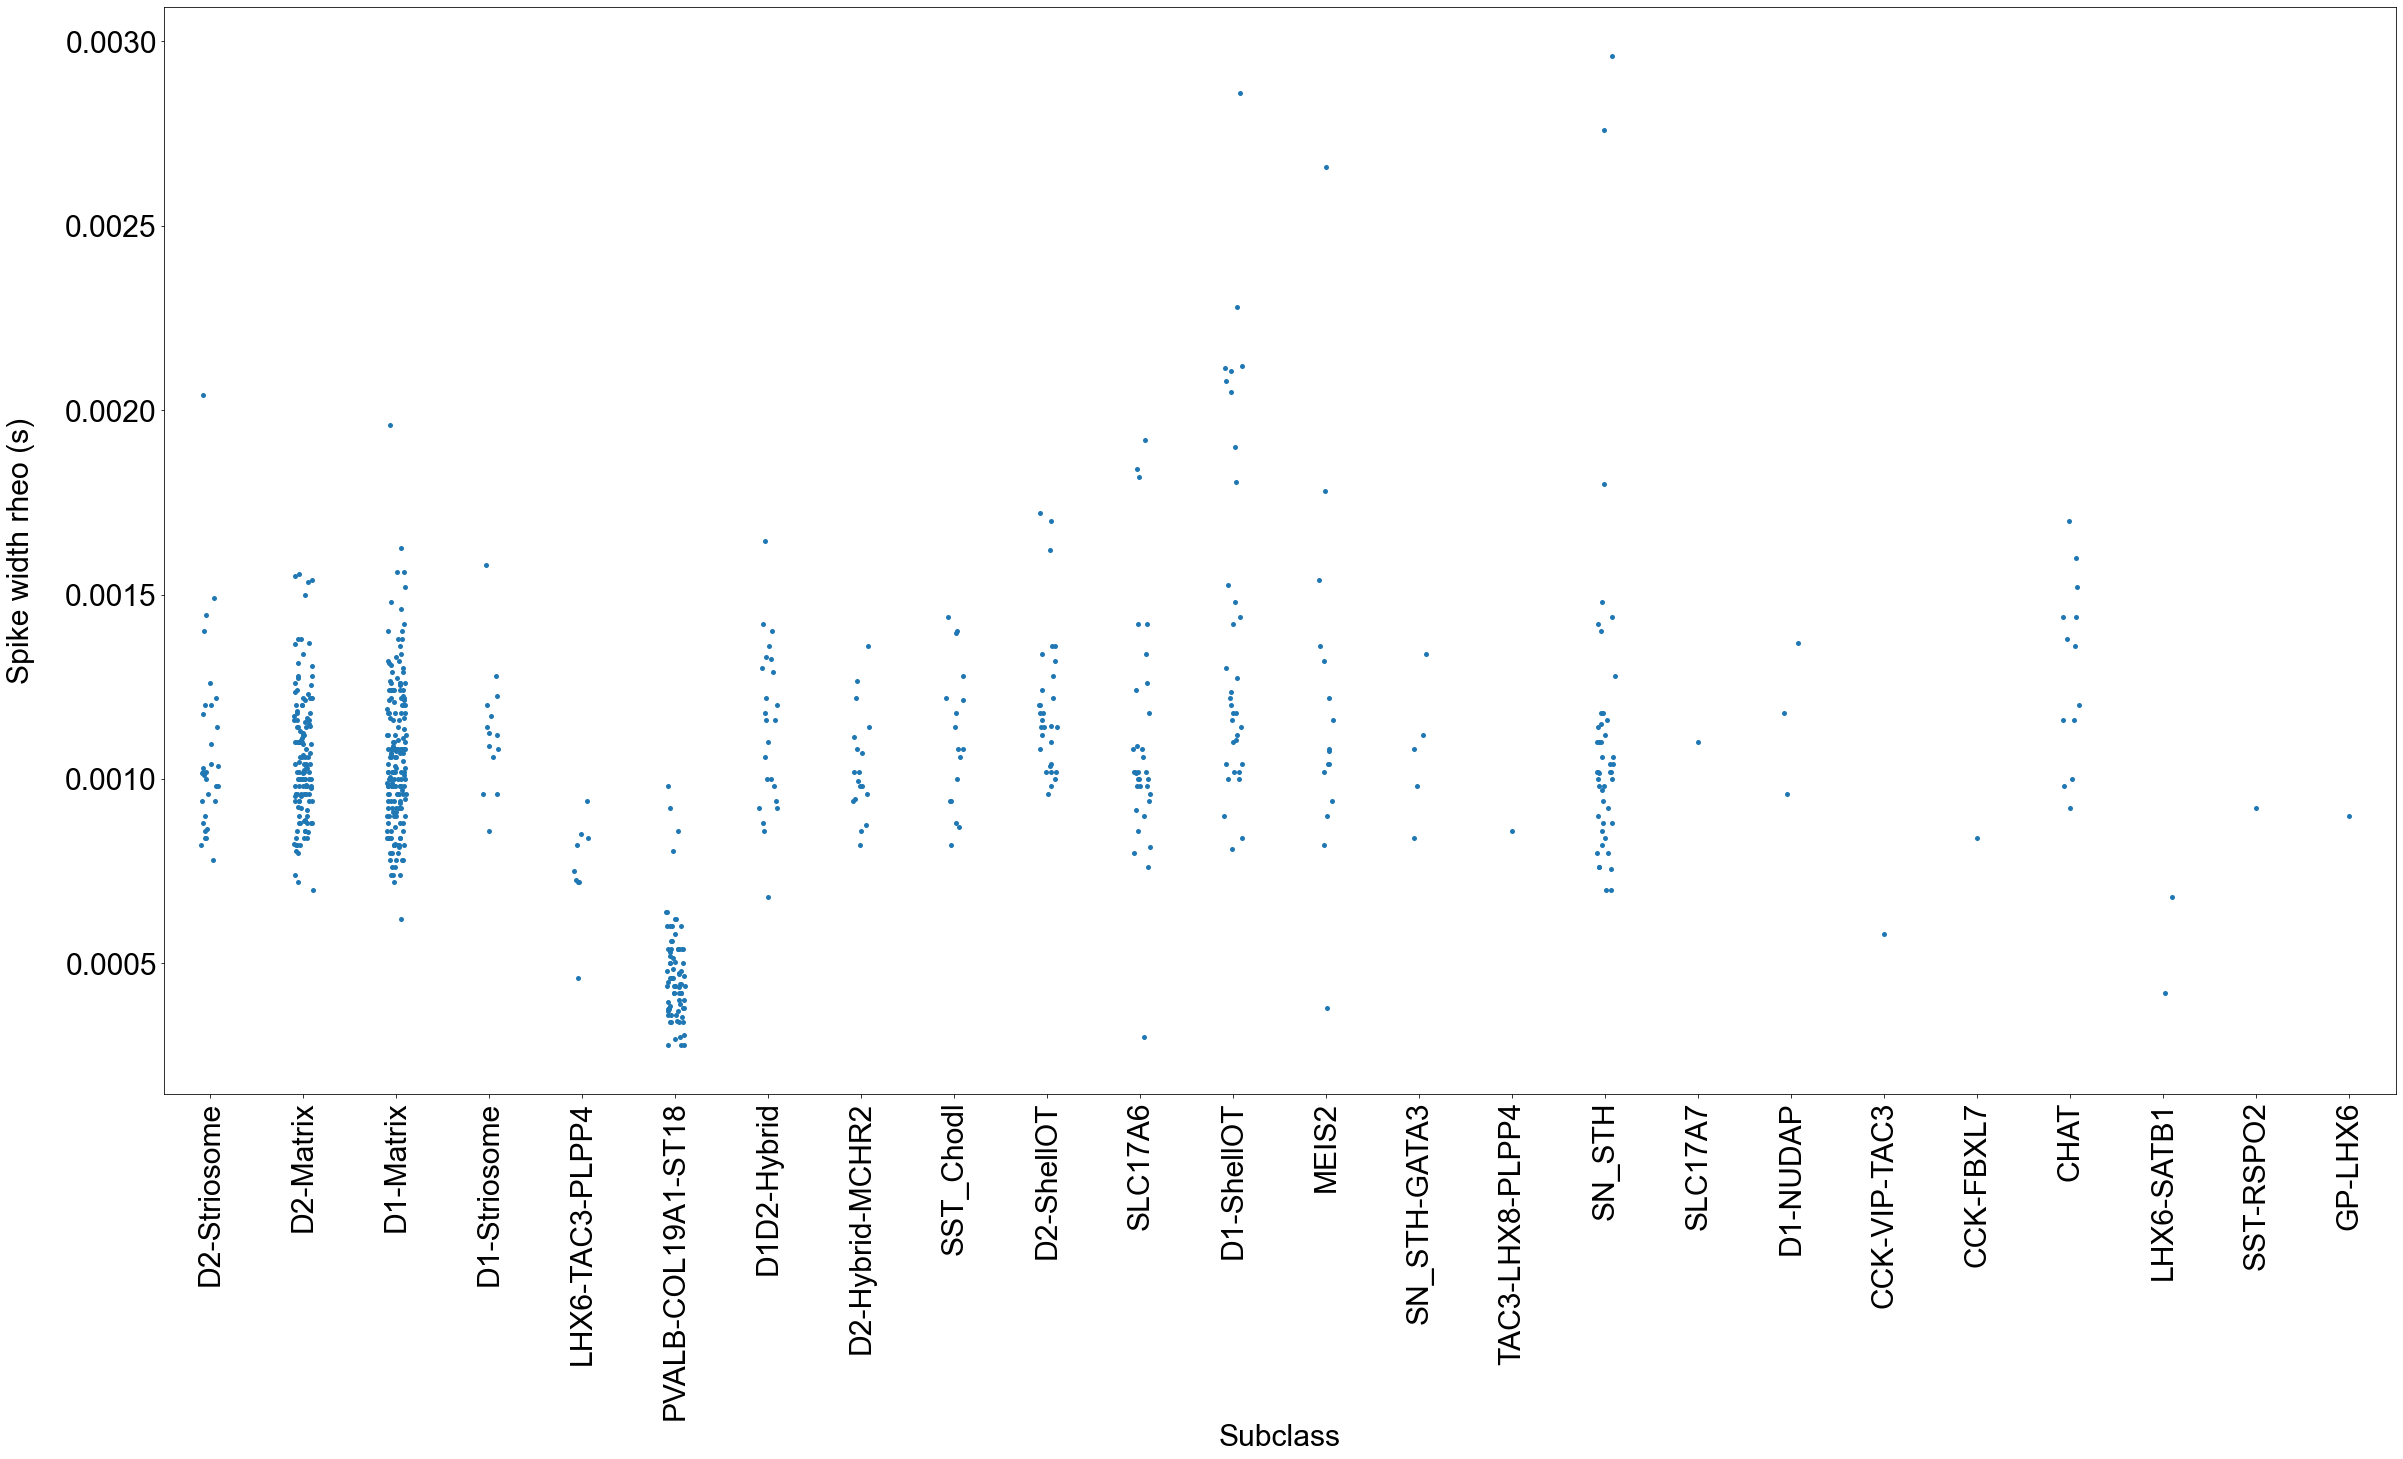

<Figure size 1440x2880 with 0 Axes>

In [27]:
fig, ax1 = plt.subplots(figsize=(40,20))
sns.set(rc={'figure.figsize':(20,40)})
sns.stripplot(data=df3_filt, x="Subclass_Corr_label", y="width_rheo", ax = ax1)
ax1.set_xlabel('Subclass', fontsize = 30)
ax1.set_ylabel('Spike width rheo (s)', labelpad=30, fontsize = 30)
#sns.catplot(data=df3, x="level3.subclass_Corr", y="fast_trough_v_rheo")
#sns.catplot(data=df3, x="level3.subclass_Corr", y="fast_trough_v_rheo")
#sns.catplot(data=df3, x="level3.subclass_Corr", y="latency_rheo")
plt.xticks(rotation = 90, fontsize = 30)
plt.yticks(fontsize = 30)
plt.figure(figsize=(20, 40))

In [28]:
main_subclasses = ['D1-Matrix', 'D2-Matrix', 'D1-Striosome', 'D2-Striosome', 'D1-ShellOT', 'D2-ShellOT', 
                   'D1D2-Hybrid', 'D2-Hybrid-MCHR2', 'D1-NUDAP',
                   'SST_Chodl', 'PVALB-COL19A1-ST18', 'CHAT', 'LHX6-TAC3-PLPP4', 'TAC3-LHX8-PLPP4', 
                   'CCK-VIP-TAC3', 'CCK-FBXL7']
df3_filt_sub = df3_filt[[sc in main_subclasses for sc in df3_filt['Subclass_Corr_label']]]   # CHANGE BACK TO TREE
df3_filt_sub.reset_index(inplace=True, drop=True)   # Important to reset index for subsequent steps
df3_filt_sub

,sample_name_old,exp_component_name_id,exp_component_name_label,exp_component_name_color,exp_component_vendor_name_id,exp_component_vendor_name_label,exp_component_vendor_name_color,batch_id,batch_label,batch_color,...,peak_ratio_chirp,peak_freq_chirp,3db_freq_chirp,peak_impedance_chirp,low_freq_impedance_chirp,sync_freq_chirp,phase_peak_chirp,phase_low_chirp,total_inductive_phase_chirp,CN3445
0,None,3046,SM-J39WG_S281_E1-50,#FF4D84,3046,SM-J39WG-S281,#FF4D84,11,R8S4-191030,#CC841F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CN3445-
1,None,3031,SM-J39VK_S075_E1-50,#FF2670,3031,SM-J39VK-S075,#FF2670,12,R8S4-191120,#996200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CN3445-
2,None,3032,SM-J39VK_S076_E1-50,#CC0045,3032,SM-J39VK-S076,#CC0045,12,R8S4-191120,#996200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CN3445-
3,None,3033,SM-J39VK_S077_E1-50,#994561,3033,SM-J39VK-S077,#994561,12,R8S4-191120,#996200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CN3445-
4,None,3034,SM-J39VK_S078_E1-50,#FF4D88,3034,SM-J39VK-S078,#FF4D88,12,R8S4-191120,#996200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CN3445-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,None,2445,AB-S40376_S676_E1-50,#754599,2445,AB-S40376_S676_E1-50,#754599,102,R8S4-241015,#992E3A,...,1.032582,1.300333,4.851242,0.411273,0.398296,0.400102,-0.217779,-0.046810,0.0,CN3445-
632,None,2440,AB-S40375_S760_E1-50,#8E00FF,2440,AB-S40375_S760_E1-50,#8E00FF,101,R8S4-240927,#CC5C6F,...,1.000228,0.400102,9.252369,0.111013,0.110987,0.400102,-0.001598,-0.001598,0.0,CN3445-
633,None,2441,AB-S40375_S761_E1-50,#9B5CCC,2441,AB-S40375_S761_E1-50,#9B5CCC,101,R8S4-240927,#CC5C6F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CN3445-
634,None,2452,AB-S40376_S686_E1-50,#9400FF,2452,AB-S40376_S686_E1-50,#9400FF,102,R8S4-241015,#992E3A,...,1.000637,0.400102,9.602458,0.077737,0.077688,0.400102,-0.058351,-0.058351,0.0,CN3445+


In [29]:
df3_filt_sub['Subclass_Corr_label'].value_counts()

D1-Matrix             197
D2-Matrix             144
PVALB-COL19A1-ST18     86
D2-Striosome           34
D1-ShellOT             34
D2-ShellOT             31
D1D2-Hybrid            25
D2-Hybrid-MCHR2        19
SST_Chodl              19
CHAT                   16
D1-Striosome           15
LHX6-TAC3-PLPP4        10
D1-NUDAP                3
TAC3-LHX8-PLPP4         1
CCK-VIP-TAC3            1
CCK-FBXL7               1
Name: Subclass_Corr_label, dtype: int64

In [30]:
print(len(df3_filt_sub.columns)-1)
print(len(df3_filt_sub.columns) - 10)
print(df3_filt_sub.columns.get_loc('upstroke_downstroke_ratio_ramp'))

695
686
597


In [31]:
#df_ephys_sub = df3_filt_sub.iloc[:,594:686]
#feat_start_ind = 268
#feat_end_ind = 362
#feat_end_nochirp_ind = 353
feat_start_ind = 597
feat_end_ind = 691
feat_end_nochirp_ind = 682
#df_ephys_sub = df3_filt_sub.iloc[:,feat_start_ind:feat_end_nochirp_ind]
#df_ephys_sub = df3_filt_sub.iloc[:,597:682]   # No chirp features
df_ephys_sub = df3_filt_sub.iloc[:,feat_start_ind:feat_end_ind]
print(len(df_ephys_sub.columns))
df_ephys_sub.columns

94


Index(['upstroke_downstroke_ratio_ramp', 'threshold_v_ramp', 'width_ramp',
       'upstroke_ramp', 'downstroke_ramp', 'width_suprathresh_ramp',
       'trough_v_ramp', 'threshold_i_ramp', 'postap_slope_ramp',
       'fast_trough_deltav_ramp', 'peak_deltav_ramp',
       'upstroke_downstroke_ratio_short_square', 'threshold_v_short_square',
       'width_short_square', 'upstroke_short_square',
       'downstroke_short_square', 'width_suprathresh_short_square',
       'peak_deltav_short_square', 'sag', 'sag_area', 'sag_tau', 'v_baseline',
       'rheobase_i', 'fi_fit_slope', 'vm_for_sag', 'input_resistance',
       'input_resistance_ss', 'tau', 'latency_rheo', 'avg_rate_rheo',
       'mean_isi_rheo', 'upstroke_downstroke_ratio_rheo', 'threshold_v_rheo',
       'peak_v_rheo', 'width_rheo', 'upstroke_rheo', 'downstroke_rheo',
       'width_suprathresh_rheo', 'trough_v_rheo', 'trough_t_rheo',
       'fast_trough_v_rheo', 'postap_slope_rheo', 'fast_trough_v_last_rheo',
       'adp_v_last_rheo'

In [32]:
# Conservative outlier removal via std after transform
# Compare within each subclass and feature separately

from scipy.stats import skew
if 'PV' in df_ephys_sub.columns:
    df_ephys_sub = df_ephys_sub.drop(['PV'], axis=1)

def outlier_transform (df_ephys_sub, df_full, subclass_name):
    keep = set(np.arange(len(df_ephys_sub)))
    feat_outliers = []
    df_ephys_sub_no_outliers = df_ephys_sub.copy()
    df_ephys_trans = df_full.copy()

    for feat in df_ephys_sub.columns:  
        print(feat)
        sk = skew(df_ephys_sub[feat], nan_policy = 'omit')
        if sk > 5:     # If very right skewed, log transform
            print('skewed')
            if any(df_ephys_sub[feat] == 0):
                #min_nonzero = np.nanmin(df_ephys_sub[feat][df_ephys_sub[feat]!=0]) 
                A = np.array(df_ephys_sub[feat][df_ephys_sub[feat]!=0])
                k = 3
                idx = np.argpartition(A, k)
                print("mins:", A[idx[:k]])
                print("mean:", np.nanmean(A))
                min_nonzero = np.mean(A[idx[:k]])
                print(min_nonzero)
                feat_vals = np.log(df_ephys_sub[feat]+min_nonzero)     # Careful creates a histogram bump at 0
            else:
                feat_vals = np.log(df_ephys_sub[feat])     
            # Be careful whether you want to add 0, but it's largely not counts, so not often zero?
        else:
            print('not_skewed')
            feat_vals = df_ephys_sub[feat]

        df_ephys_trans[feat] = feat_vals
        outlier_temp = np.empty(shape=(0))
        for subclass in main_subclasses:
            feat_vals_sub = feat_vals[df_full[subclass_name]==subclass]
            #Q1 = np.nanpercentile(feat_vals_sub, 25)
            #Q3 = np.nanpercentile(feat_vals_sub, 75)
            #IQR = Q3 - Q1
            feat_vals_z = (feat_vals-np.nanmean(feat_vals_sub))/np.nanstd(feat_vals_sub)

            thresh = 4
            # Above Upper bound
            upper = thresh
            #upper=Q3+thresh*IQR
            nz_inds_upper = np.nonzero(np.array(feat_vals_z>upper) & np.array(df_full[subclass_name]==subclass))

            #Below Lower bound
            lower = -thresh
            #lower=Q1-thresh*IQR
            nz_inds_lower = np.nonzero(np.array(feat_vals_z<lower) & np.array(df_full[subclass_name]==subclass))

            #print('thresh:', thresh)
            print(subclass)
            print(upper)
            print(lower)
            print(len(nz_inds_upper[0]))
            print(len(nz_inds_lower[0]))
            print(np.count_nonzero(~np.isnan(feat_vals_sub)))
            #print(0.005 * len(feat_vals))
            #print('IQR:', IQR)

            if len(nz_inds_upper[0]) != 0:
                print("Severe high outlier(s) for feature ", feat)
                print(feat_vals.iloc[nz_inds_upper[0]])
                print(nz_inds_upper)
            if len(nz_inds_lower[0]) != 0:
                print("Severe low outlier(s) for feature ", feat)
                print(feat_vals.iloc[nz_inds_lower[0]])

            keep = keep.difference(set(nz_inds_upper[0]))
            keep = keep.difference(set(nz_inds_lower[0]))
            #outlier_temp = outlier_temp.append(nz_inds_upper[0])
            #outlier_temp = outlier_temp.append(nz_inds_lower[0])
            outlier_temp = np.hstack((outlier_temp,nz_inds_upper[0],nz_inds_lower[0]))
            #list(np.hstack((nz_inds_upper[0], nz_inds_lower[0])))
        outlier_temp = np.unique(outlier_temp).astype(int)
        feat_outliers.append(outlier_temp)
        print(outlier_temp)
        df_ephys_sub_no_outliers[feat].iloc[outlier_temp] = np.nan
        df_ephys_trans[feat].iloc[outlier_temp] = np.nan
        #keep.remove(lower_array)

    print(keep)
    print(len(list(keep)))
    return df_ephys_sub_no_outliers, df_ephys_trans, feat_outliers

df_ephys_sub_no_outliers, df_ephys_trans, feat_outliers = outlier_transform (df_ephys_sub, df3_filt_sub, 'Subclass_Corr_label')

upstroke_downstroke_ratio_ramp
not_skewed
D1-Matrix
4
-4
0
0
62
D2-Matrix
4
-4
0
0
38
D1-Striosome
4
-4
0
0
3
D2-Striosome
4
-4
0
0
9
D1-ShellOT
4
-4
0
0
12
D2-ShellOT
4
-4
0
0
20
D1D2-Hybrid
4
-4
0
0
9
D2-Hybrid-MCHR2
4
-4
0
0
4
D1-NUDAP
4
-4
0
0
1
SST_Chodl
4
-4
0
0
7
PVALB-COL19A1-ST18
4
-4
0
0
23
CHAT
4
-4
0
0
12
LHX6-TAC3-PLPP4
4
-4
0
0
0
TAC3-LHX8-PLPP4
4
-4
0
0
0
CCK-VIP-TAC3
4
-4
0
0
0
CCK-FBXL7
4
-4
0
0
0
[]
threshold_v_ramp
not_skewed
D1-Matrix
4
-4
0
0
62
D2-Matrix
4
-4
0
0
38
D1-Striosome
4
-4
0
0
3
D2-Striosome
4
-4
0
0
9
D1-ShellOT
4
-4
0
0
12
D2-ShellOT
4
-4
0
0
20
D1D2-Hybrid
4
-4
0
0
9
D2-Hybrid-MCHR2
4
-4
0
0
4
D1-NUDAP
4
-4
0
0
1
SST_Chodl
4
-4
0
0
7
PVALB-COL19A1-ST18
4
-4
0
0
23
CHAT
4
-4
0
0
12
LHX6-TAC3-PLPP4
4
-4
0
0
0
TAC3-LHX8-PLPP4
4
-4
0
0
0
CCK-VIP-TAC3
4
-4
0
0
0
CCK-FBXL7
4
-4
0
0
0
[]
width_ramp
not_skewed
D1-Matrix
4
-4
0
0
62
D2-Matrix
4
-4
0
0
38
D1-Striosome
4
-4
0
0
3
D2-Striosome
4
-4
0
0
9
D1-ShellOT
4
-4
0
0
12
D2-ShellOT
4
-4
0
0
20
D1D2-Hybrid


/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_49678/3080752432.py:43: RuntimeWarning: Mean of empty slice
  feat_vals_z = (feat_vals-np.nanmean(feat_vals_sub))/np.nanstd(feat_vals_sub)
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_49678/3080752432.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ephys_trans[feat].iloc[outlier_temp] = np.nan
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


D2-Hybrid-MCHR2
4
-4
0
0
17
D1-NUDAP
4
-4
0
0
3
SST_Chodl
4
-4
0
0
13
PVALB-COL19A1-ST18
4
-4
0
0
78
CHAT
4
-4
0
0
11
LHX6-TAC3-PLPP4
4
-4
0
0
9
TAC3-LHX8-PLPP4
4
-4
0
0
1
CCK-VIP-TAC3
4
-4
0
0
1
CCK-FBXL7
4
-4
0
0
1
[280 549]
upstroke_short_square
not_skewed
D1-Matrix
4
-4
0
0
180
D2-Matrix
4
-4
0
0
123
D1-Striosome
4
-4
0
0
14
D2-Striosome
4
-4
0
0
31
D1-ShellOT
4
-4
0
0
33
D2-ShellOT
4
-4
0
0
30
D1D2-Hybrid
4
-4
0
0
24
D2-Hybrid-MCHR2
4
-4
0
0
17
D1-NUDAP
4
-4
0
0
3
SST_Chodl
4
-4
0
0
13
PVALB-COL19A1-ST18
4
-4
0
0
78
CHAT
4
-4
0
0
11
LHX6-TAC3-PLPP4
4
-4
0
0
9
TAC3-LHX8-PLPP4
4
-4
0
0
1
CCK-VIP-TAC3
4
-4
0
0
1
CCK-FBXL7
4
-4
0
0
1
[]
downstroke_short_square
not_skewed
D1-Matrix
4
-4
0
0
180
D2-Matrix
4
-4
0
0
123
D1-Striosome
4
-4
0
0
14
D2-Striosome
4
-4
0
0
31
D1-ShellOT
4
-4
0
0
33
D2-ShellOT
4
-4
0
0
30
D1D2-Hybrid
4
-4
0
0
24
D2-Hybrid-MCHR2
4
-4
0
0
17
D1-NUDAP
4
-4
0
0
3
SST_Chodl
4
-4
0
0
13
PVALB-COL19A1-ST18
4
-4
0
0
78
CHAT
4
-4
0
0
11
LHX6-TAC3-PLPP4
4
-4
0
0
9
TAC3-LHX

CCK-VIP-TAC3
4
-4
0
0
1
CCK-FBXL7
4
-4
0
0
1
[113 123 130 146]
mean_isi_rheo
not_skewed
D1-Matrix
4
-4
0
0
72
D2-Matrix
4
-4
0
0
66
D1-Striosome
4
-4
0
0
6
D2-Striosome
4
-4
0
0
17
D1-ShellOT
4
-4
0
0
5
D2-ShellOT
4
-4
0
0
13
D1D2-Hybrid
4
-4
0
0
10
D2-Hybrid-MCHR2
4
-4
0
0
9
D1-NUDAP
4
-4
0
0
1
SST_Chodl
4
-4
0
0
10
PVALB-COL19A1-ST18
4
-4
0
0
46
CHAT
4
-4
0
0
2
LHX6-TAC3-PLPP4
4
-4
0
0
4
TAC3-LHX8-PLPP4
4
-4
0
0
1
CCK-VIP-TAC3
4
-4
0
0
1
CCK-FBXL7
4
-4
0
0
0
[]
upstroke_downstroke_ratio_rheo
not_skewed
D1-Matrix
4
-4
0
0
185
D2-Matrix
4
-4
0
0
134
D1-Striosome
4
-4
0
0
14
D2-Striosome
4
-4
0
0
32
D1-ShellOT
4
-4
0
0
34
D2-ShellOT
4
-4
0
0
30
D1D2-Hybrid
4
-4
0
0
24
D2-Hybrid-MCHR2
4
-4
0
0
18
D1-NUDAP
4
-4
0
0
3
SST_Chodl
4
-4
0
0
17
PVALB-COL19A1-ST18
4
-4
0
0
80
CHAT
4
-4
0
0
13
LHX6-TAC3-PLPP4
4
-4
0
0
9
TAC3-LHX8-PLPP4
4
-4
0
0
1
CCK-VIP-TAC3
4
-4
0
0
1
CCK-FBXL7
4
-4
0
0
1
[]
threshold_v_rheo
not_skewed
D1-Matrix
4
-4
0
0
185
D2-Matrix
4
-4
0
0
134
D1-Striosome
4
-4
0
0
14
D2-St

D1-Matrix
4
-4
0
0
185
D2-Matrix
4
-4
0
0
134
D1-Striosome
4
-4
0
0
14
D2-Striosome
4
-4
0
0
32
D1-ShellOT
4
-4
0
0
34
D2-ShellOT
4
-4
0
0
30
D1D2-Hybrid
4
-4
0
0
24
D2-Hybrid-MCHR2
4
-4
0
0
18
D1-NUDAP
4
-4
0
0
3
SST_Chodl
4
-4
0
0
17
PVALB-COL19A1-ST18
4
-4
0
0
80
CHAT
4
-4
0
0
13
LHX6-TAC3-PLPP4
4
-4
0
0
9
TAC3-LHX8-PLPP4
4
-4
0
0
1
CCK-VIP-TAC3
4
-4
0
0
1
CCK-FBXL7
4
-4
0
0
1
[]
trough_t_hero
not_skewed
D1-Matrix
4
-4
2
0
185
Severe high outlier(s) for feature  trough_t_hero
507    0.93094
596    0.69244
Name: trough_t_hero, dtype: float64
(array([507, 596]),)
D2-Matrix
4
-4
2
0
134
Severe high outlier(s) for feature  trough_t_hero
304    0.58812
408    0.55898
Name: trough_t_hero, dtype: float64
(array([304, 408]),)
D1-Striosome
4
-4
0
0
14
D2-Striosome
4
-4
0
0
32
D1-ShellOT
4
-4
0
0
34
D2-ShellOT
4
-4
0
0
30
D1D2-Hybrid
4
-4
0
0
24
D2-Hybrid-MCHR2
4
-4
0
0
18
D1-NUDAP
4
-4
0
0
3
SST_Chodl
4
-4
0
0
17
PVALB-COL19A1-ST18
4
-4
1
0
80
Severe high outlier(s) for feature  trough_t_her

D1-NUDAP
4
-4
0
0
2
SST_Chodl
4
-4
0
0
14
PVALB-COL19A1-ST18
4
-4
0
1
78
Severe low outlier(s) for feature  threshold_v_adapt_ratio
325    0.733229
Name: threshold_v_adapt_ratio, dtype: float64
CHAT
4
-4
0
0
7
LHX6-TAC3-PLPP4
4
-4
0
0
5
TAC3-LHX8-PLPP4
4
-4
0
0
1
CCK-VIP-TAC3
4
-4
0
0
1
CCK-FBXL7
4
-4
0
0
1
[295 304 325 350 575 593]
peak_v_adapt_ratio
not_skewed
D1-Matrix
4
-4
0
0
178
D2-Matrix
4
-4
0
2
131
Severe low outlier(s) for feature  peak_v_adapt_ratio
121    0.706694
304    0.706647
Name: peak_v_adapt_ratio, dtype: float64
D1-Striosome
4
-4
0
0
12
D2-Striosome
4
-4
0
1
32
Severe low outlier(s) for feature  peak_v_adapt_ratio
593    0.631861
Name: peak_v_adapt_ratio, dtype: float64
D1-ShellOT
4
-4
0
0
21
D2-ShellOT
4
-4
0
0
29
D1D2-Hybrid
4
-4
0
0
21
D2-Hybrid-MCHR2
4
-4
0
0
18
D1-NUDAP
4
-4
0
0
2
SST_Chodl
4
-4
0
0
14
PVALB-COL19A1-ST18
4
-4
0
1
78
Severe low outlier(s) for feature  peak_v_adapt_ratio
81   -0.680511
Name: peak_v_adapt_ratio, dtype: float64
CHAT
4
-4
0
0
7
LHX6

PVALB-COL19A1-ST18
4
-4
0
0
28
CHAT
4
-4
0
0
1
LHX6-TAC3-PLPP4
4
-4
0
0
0
TAC3-LHX8-PLPP4
4
-4
0
0
0
CCK-VIP-TAC3
4
-4
0
0
0
CCK-FBXL7
4
-4
0
0
1
[]
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 61, 62, 63, 64, 66, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 103, 104, 105, 106, 107, 109, 111, 116, 117, 122, 124, 125, 126, 128, 129, 131, 132, 133, 134, 135, 136, 138, 141, 142, 143, 144, 145, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 182, 184, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 217, 218, 219, 220, 221, 222, 223, 224, 

<Axes: xlabel='Subclass_Corr_label', ylabel='isi_adapt_ratio'>

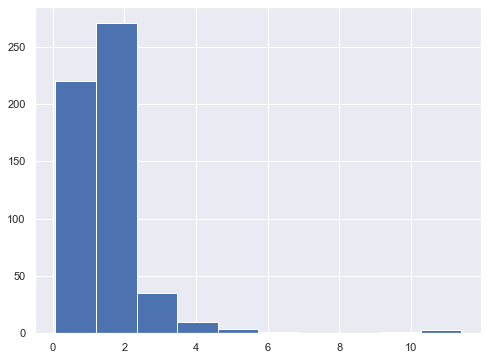

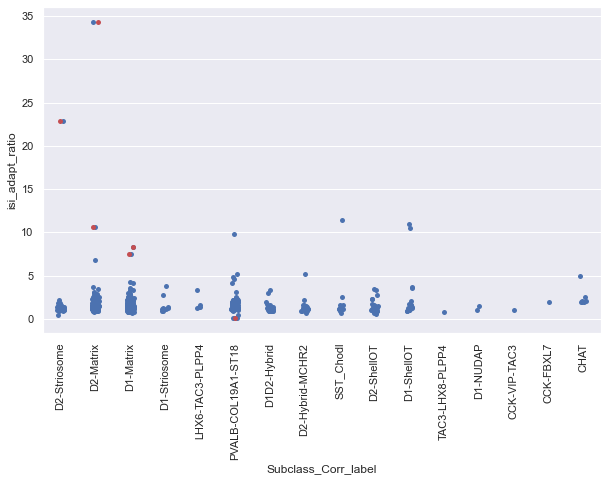

In [33]:
#feat = 'upstroke_downstroke_ratio_short_square'
#feat = 'total_inductive_phase_chirp'
#feat = 'phase_peak_chirp'
#feat = 'threshold_v_short_square'
#feat = 'width_ramp'
#feat = 'avg_rate_rheo'
#feat = 'downstroke_ramp'
#feat = 'adapt_hero'
#feat = 'peak_deltav_5th_adapt_ratio'
#feat= 'first_isi_inv_rheo'
#feat = 'peak_ratio_chirp'
feat = 'isi_adapt_ratio'

#(n, bins, patches) = plt.hist(df_ephys_sub[feat][df_ephys_sub[feat]<0.1], bins = 50)   # Needs log transform
#min_nonzero = np.nanmin(df_ephys_sub[feat][df_ephys_sub[feat]!=0]) 
#feat_vals = np.log(df_ephys_sub[feat]+min_nonzero) 
#plt.hist(feat_vals)
fig,ax = plt.subplots(figsize=(8, 6))
plt.hist(df_ephys_sub_no_outliers[feat])

fig,ax = plt.subplots(figsize=(10, 6))
sns.stripplot(data=df3_filt_sub, x='Subclass_Corr_label', y=feat, ax=ax)
plt.xticks(rotation = 90)
feat_ind = int(np.nonzero(df_ephys_sub.columns==feat)[0])

sns.stripplot(data=df3_filt_sub.iloc[list(feat_outliers[feat_ind])], x='Subclass_Corr_label', y=feat, ax=ax, color='r')
#plt.yscale("log")
#plt.xlim([-1,15])

In [26]:
df_ephys_trans['Class_Corr_label'].value_counts()

MSN            502
Interneuron    134
Name: Class_Corr_label, dtype: int64

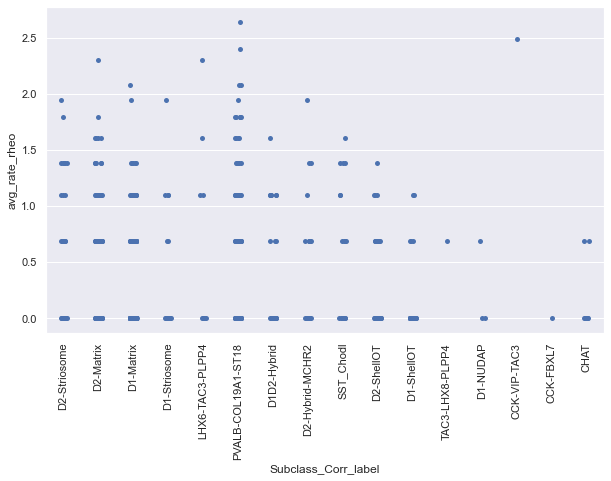

In [27]:
# Check that transformed distributions look more symmetrical

#feat = 'upstroke_downstroke_ratio_short_square'
#feat = 'total_inductive_phase_chirp'
#feat = 'phase_peak_chirp'
#feat = 'threshold_v_short_square'
#feat = 'width_ramp'
feat = 'avg_rate_rheo'
#feat = 'avg_rate_hero'

fig,ax = plt.subplots(figsize=(10, 6))
sns.stripplot(data=df_ephys_trans, x='Subclass_Corr_label', y=feat, ax=ax)
plt.xticks(rotation = 90)
feat_ind = int(np.nonzero(df_ephys_trans.columns==feat)[0])

In [28]:
# Remove chirp features and impute
#nonchirp_feat_inds = ["chirp" not in name for name in df_ephys_trans.columns]
#df_ephys_trim = df_ephys_trans.iloc[:,nonchirp_feat_inds]

df_ephys_trim = df_ephys_trans

df3_filt_sub.reset_index(inplace=True, drop=True)

#target_names = iris.target_names    # unique list of target categories, indexable from the target numbers
#X = df_ephys_trim.iloc[:,feat_start_ind-1:feat_end_nochirp_ind-1] 
X = df_ephys_trim.iloc[:,feat_start_ind:feat_end_ind] 
y = df3_filt_sub['Subclass_Corr_label']    # Currently actually using the below

random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
n_classes = len(np.unique(y))
print("n samples:", n_samples)
print("n classes:", n_classes)
print("n features:", n_features)

n samples: 636
n classes: 16
n features: 94


In [29]:
#print(sum(nonchirp_feat_inds==False))
#df_ephys_trim = df_ephys_trans.iloc[:,nonchirp_feat_inds]
#df_ephys_trans.columns
X.columns

Index(['upstroke_downstroke_ratio_ramp', 'threshold_v_ramp', 'width_ramp',
       'upstroke_ramp', 'downstroke_ramp', 'width_suprathresh_ramp',
       'trough_v_ramp', 'threshold_i_ramp', 'postap_slope_ramp',
       'fast_trough_deltav_ramp', 'peak_deltav_ramp',
       'upstroke_downstroke_ratio_short_square', 'threshold_v_short_square',
       'width_short_square', 'upstroke_short_square',
       'downstroke_short_square', 'width_suprathresh_short_square',
       'peak_deltav_short_square', 'peak_ratio_chirp', 'peak_freq_chirp',
       '3db_freq_chirp', 'peak_impedance_chirp', 'low_freq_impedance_chirp',
       'sync_freq_chirp', 'phase_peak_chirp', 'phase_low_chirp',
       'total_inductive_phase_chirp', 'sag', 'sag_area', 'sag_tau',
       'v_baseline', 'rheobase_i', 'fi_fit_slope', 'vm_for_sag',
       'input_resistance', 'input_resistance_ss', 'tau', 'latency_rheo',
       'avg_rate_rheo', 'mean_isi_rheo', 'upstroke_downstroke_ratio_rheo',
       'threshold_v_rheo', 'peak_v_rheo',

In [30]:
# Optional: imputation (e.g., after trimming anything with missing swaths)
from sklearn.impute import KNNImputer

imputer = KNNImputer(missing_values=np.nan)
X_imputed = imputer.fit_transform(X)  

from sklearn.preprocessing import StandardScaler, RobustScaler

#scaler = RobustScaler()    # Produces weird results, maybe due to skew?
scaler = StandardScaler().fit(X_imputed)
X_std = scaler.transform(X_imputed)

y_orig = df3_filt_sub['Subclass_Corr_label']   # CHANGE BACK TO TREE

mean_vec = np.mean(X_std, axis=0)
mean_vec    # Check it's zeroed

array([ 6.56358266e-16,  1.67580834e-17,  2.79301390e-17,  1.00548500e-16,
       -1.34064667e-16,  2.01097001e-16,  2.62543306e-16,  1.31271653e-16,
        8.37904170e-17,  2.82094404e-16,  1.23451214e-15, -4.13366057e-16,
        0.00000000e+00, -5.58602780e-18,  8.93764447e-17, -3.01645501e-16,
        5.02742502e-17,  7.82043892e-17, -1.99141891e-15, -1.21496105e-16,
       -5.66981821e-16, -3.32368654e-16, -1.20099598e-16,  3.19800091e-16,
        5.30672641e-17,  3.63091807e-17, -1.25685625e-17, -1.67580834e-17,
       -4.13366057e-16,  1.00548500e-16, -1.84338917e-16,  2.03890015e-16,
       -5.58602780e-17, -8.99350475e-16,  5.30672641e-17,  1.46633230e-16,
        2.01097001e-16, -2.12269056e-16, -1.34064667e-16, -5.58602780e-16,
       -2.01097001e-16, -1.45236723e-16, -1.67580834e-16, -2.06683028e-16,
       -2.06683028e-16, -3.35161668e-17,  5.19500585e-16, -1.61994806e-15,
       -5.47430724e-16,  1.11720556e-17, -3.35161668e-16,  4.24538113e-16,
        3.35161668e-17, -

In [30]:
# How many nan values are there for each feature


In [31]:
# Two Way ANOVA

df_ephys_trim['D1orD2MS'] = 'Neither'
df_ephys_trim['D1orD2MS'][(y_orig == 'D1-Matrix') | (y_orig == 'D1-Striosome')] = 'D1'
df_ephys_trim['D1orD2MS'][(y_orig =='D2-Matrix') | (y_orig == 'D2-Striosome')] = 'D2'

df_ephys_trim['MS'] = 'Neither'
df_ephys_trim['MS'][(y_orig =='D1-Matrix') | (y_orig == 'D2-Matrix')] = 'Matrix'
df_ephys_trim['MS'][(y_orig =='D1-Striosome') | (y_orig == 'D2-Striosome')] = 'Striosome'

df_ephys_trim_ms = df_ephys_trim[df_ephys_trim['D1orD2MS']  != 'Neither']
#df_ephys_trim_ms = df_ephys_trim_ms.iloc[:,feat_start_ind:(feat_end_nochirp_ind+3)]
df_ephys_trim_ms = df_ephys_trim_ms.iloc[:,feat_start_ind:(feat_end_ind+3)]
#inds = df_ephys_sub['D1orD2MS']  != 'Neither'
#y = X_std[inds]
#x1 = df_ephys_sub['D1orD2MS'][inds]
#x2 = df_ephys_sub['MS'][inds]

np2_vec_MS = np.empty([2, df_ephys_trim.shape[1]-4])
np2_vec_D12 = np.empty([2, df_ephys_trim.shape[1]-4])

i = 0 
#for feat in df_ephys_trim_ms.columns[:feat_end_nochirp_ind-feat_start_ind]: 
for feat in df_ephys_trim_ms.columns[:feat_end_ind-feat_start_ind]: 
    print(feat)
    if feat != 'sag_tau':
        aov = pg.anova(dv=feat, between=["MS","D1orD2MS"], data=df_ephys_trim_ms,
                detailed=True)
        np2_vec_MS[0,i] = aov.np2[0].round(3)
        np2_vec_MS[1,i] = aov['p-unc'][0]
        np2_vec_D12[0,i] = aov.np2[1].round(3)
        np2_vec_D12[1,i] = aov['p-unc'][1]
    else:
        np2_vec_MS[0,i] = np.nan
        np2_vec_MS[1,i] = np.nan
        np2_vec_D12[0,i] = np.nan
        np2_vec_D12[1,i] = np.nan
    i+=1

# FDR Correction
rejects, pval_corr = pg.multicomp(np2_vec_MS[1,:], method='fdr_bh')
np2_vec_MS[1,:] = pval_corr
rejects, pval_corr = pg.multicomp(np2_vec_D12[1,:], method='fdr_bh')
np2_vec_D12[1,:] = pval_corr

#data_tuples = list(zip(df_ephys_trim_ms.columns[:feat_end_nochirp_ind-feat_start_ind-1],np2_vec_MS[0,:],np2_vec_MS[1,:]))
data_tuples = list(zip(df_ephys_trim_ms.columns[:feat_end_ind-feat_start_ind-1],np2_vec_MS[0,:],np2_vec_MS[1,:]))
df_MS = pd.DataFrame(data_tuples)
df_MS.columns = ['Feature', 'Partial_eta_squared', 'p-value']

#df_MS = df_MS.sort_values(by='Partial_eta_squared', ascending=False)
df_MS = df_MS.sort_values(by='p-value', ascending=True)
#df_I.columns = df_ephys_sub_I.columns[2:]

min_ind = np.min(np.where(df_MS['p-value']<0.05))
print(df_MS)

#data_tuples = list(zip(df_ephys_trim_ms.columns[:feat_end_nochirp_ind-feat_start_ind-1],np2_vec_D12[0,:],np2_vec_D12[1,:]))
data_tuples = list(zip(df_ephys_trim_ms.columns[:feat_end_ind-feat_start_ind-1],np2_vec_D12[0,:],np2_vec_D12[1,:]))
df_D12 = pd.DataFrame(data_tuples)
df_D12.columns = ['Feature', 'Partial_eta_squared', 'p-value']
print(df_D12)

#df_D12 = df_D12.sort_values(by='Partial_eta_squared', ascending=False)
df_D12 = df_D12.sort_values(by='p-value', ascending=True)
#df_I.columns = df_ephys_sub_I.columns[2:]

min_ind = np.min(np.where(df_D12['p-value']<0.05))
print(min_ind)
df_D12[1:10]


/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_51409/4259466577.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ephys_trim['D1orD2MS'][(y_orig == 'D1-Matrix') | (y_orig == 'D1-Striosome')] = 'D1'
/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_51409/4259466577.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ephys_trim['D1orD2MS'][(y_orig =='D2-Matrix') | (y_orig == 'D2-Striosome')] = 'D2'
/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_51409/4259466577.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

upstroke_downstroke_ratio_ramp
threshold_v_ramp
width_ramp
upstroke_ramp
downstroke_ramp
width_suprathresh_ramp
trough_v_ramp
threshold_i_ramp
postap_slope_ramp
fast_trough_deltav_ramp
peak_deltav_ramp
upstroke_downstroke_ratio_short_square
threshold_v_short_square
width_short_square
upstroke_short_square
downstroke_short_square
width_suprathresh_short_square
peak_deltav_short_square
peak_ratio_chirp
peak_freq_chirp
3db_freq_chirp
peak_impedance_chirp
low_freq_impedance_chirp
sync_freq_chirp
phase_peak_chirp
phase_low_chirp
total_inductive_phase_chirp
sag
sag_area
sag_tau
v_baseline
rheobase_i
fi_fit_slope
vm_for_sag
input_resistance
input_resistance_ss
tau
latency_rheo
avg_rate_rheo
mean_isi_rheo
upstroke_downstroke_ratio_rheo
threshold_v_rheo
peak_v_rheo
width_rheo
upstroke_rheo
downstroke_rheo
width_suprathresh_rheo
trough_v_rheo
fast_trough_v_rheo
postap_slope_rheo
fast_trough_v_last_rheo
adp_v_last_rheo
adapt_hero
avg_rate_hero
latency_hero
mean_isi_hero
median_isi_hero
isi_cv_her

,Feature,Partial_eta_squared,p-value
11,upstroke_downstroke_ratio_short_square,0.118,5.489485e-11
59,upstroke_downstroke_ratio_hero,0.109,1.359488e-10
60,threshold_v_hero,0.101,6.438131e-10
47,trough_v_rheo,0.093,3.427010e-09
41,threshold_v_rheo,0.088,1.006428e-08
44,upstroke_rheo,0.088,1.006428e-08
63,upstroke_hero,0.082,3.241176e-08
48,fast_trough_v_rheo,0.080,4.798423e-08
32,fi_fit_slope,0.074,1.723395e-07


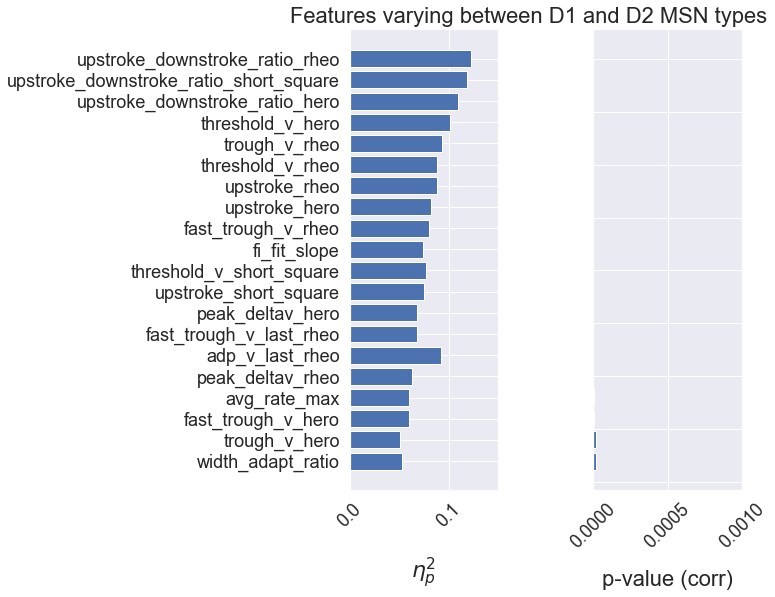

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(10.925, 8.55), sharey=False)
y_pos = np.arange(20)
#axs[1].bar(df_D12['Feature'][:20], df_D12['p-value'][:20])
axs[1].barh(y_pos, df_D12['p-value'][:20], align='center')
#axs[1].set_xticklabels(axs[0].get_xticklabels(), rotation = 90, fontsize = 16)
axs[1].set_yticklabels([])
axs[1].set_xlabel('p-value (corr)', fontsize = 22, labelpad = 18)
axs[1].tick_params(axis='both', which='major', labelsize=18, rotation= 45)
#plt.setp(axs[1].get_xticklabels(), rotation=50, ha="center", rotation_mode="anchor")
axs[1].set_xlim([0.0,0.001])
axs[1].invert_yaxis()

#axs[0].barh(df_D12['Feature'][:20], df_D12['Partial_eta_squared'][:20])
axs[0].barh(y_pos, df_D12['Partial_eta_squared'][:20])
#axs[0].set_yticklabels(axs[1].get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor", fontsize = 22)
axs[0].tick_params(axis='both', which='major', labelsize=18, rotation = 45)
axs[0].set_yticks(y_pos, labels=df_D12['Feature'][:20], rotation = 0, ha = "right", rotation_mode = "anchor")
axs[0].set_xlabel(r'$\eta_{p}^{2}$', fontsize = 22, labelpad = 25)
axs[0].set_xlim([0,0.15])
axs[0].set_title('Features varying between D1 and D2 MSN types', fontsize = 22, x = 1.2)
axs[0].invert_yaxis()
#axs[0].set_title('Features varying between D1 and D2 MSN types', fontsize = 22)

fig.tight_layout()

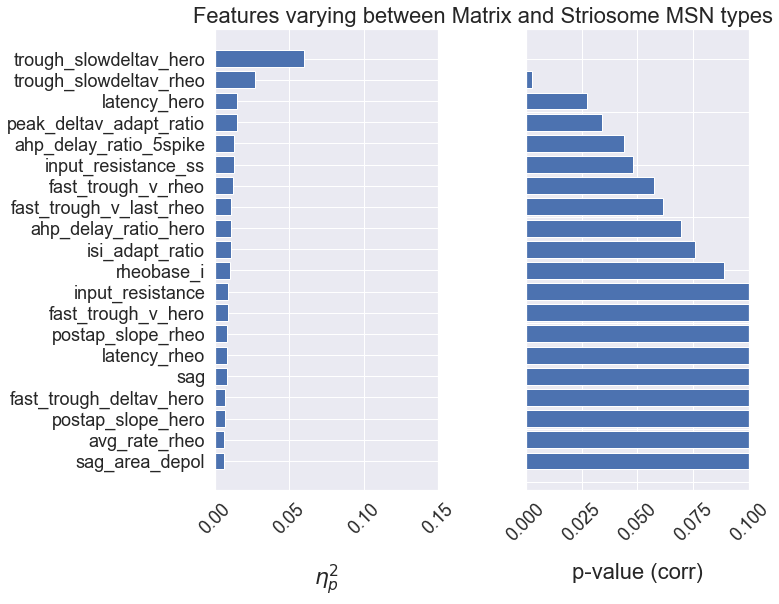

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(10.925, 8.55), sharey=False)
y_pos = np.arange(20)
axs[1].barh(y_pos, df_MS['p-value'][:20], align='center')
#axs[1].set_xticklabels(axs[0].get_xticklabels(), rotation = 90, fontsize = 16)
axs[1].set_yticklabels([])
axs[1].set_xlabel('p-value (corr)', fontsize = 22, labelpad = 18)
axs[1].tick_params(axis='both', which='major', labelsize=18, rotation= 45)
#plt.setp(axs[1].get_xticklabels(), rotation=50, ha="center", rotation_mode="anchor")
axs[1].set_xlim([0.0,0.1])
axs[1].invert_yaxis()

#axs[0].barh(df_D12['Feature'][:20], df_D12['Partial_eta_squared'][:20])
axs[0].barh(y_pos, df_MS['Partial_eta_squared'][:20])
#axs[0].set_yticklabels(axs[1].get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor", fontsize = 22)
axs[0].tick_params(axis='both', which='major', labelsize=18, rotation = 45)
axs[0].set_yticks(y_pos, labels=df_MS['Feature'][:20], rotation = 0, ha = "right", rotation_mode = "anchor")
axs[0].set_xlabel(r'$\eta_{p}^{2}$', fontsize = 22, labelpad = 25)
axs[0].set_xlim([0,0.15])
axs[0].set_title('Features varying between Matrix and Striosome MSN types', fontsize = 22, x = 1.2)
axs[0].invert_yaxis()
#axs[0].set_title('Features varying between D1 and D2 MSN types', fontsize = 22)

fig.tight_layout()

In [34]:
pd.set_option('display.max_rows', 100)
df_MS

,Feature,Partial_eta_squared,p-value
87,trough_slowdeltav_hero,0.060,0.000004
86,trough_slowdeltav_rheo,0.027,0.002624
54,latency_hero,0.015,0.027477
83,peak_deltav_adapt_ratio,0.015,0.034057
85,ahp_delay_ratio_5spike,0.013,0.043897
35,input_resistance_ss,0.013,0.047914
48,fast_trough_v_rheo,0.012,0.057584
50,fast_trough_v_last_rheo,0.011,0.061321
69,ahp_delay_ratio_hero,0.011,0.069447
77,isi_adapt_ratio,0.011,0.075658


In [35]:
#df_ephys_trim_ms.columns()
X_std.shape

(636, 94)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P']
0         DD2-Striosome
1            BD2-Matrix
2            AD1-Matrix
3            BD2-Matrix
4            BD2-Matrix
             ...       
631         FD2-ShellOT
632       DD2-Striosome
633         FD2-ShellOT
634          AD1-Matrix
635    HD2-Hybrid-MCHR2
Name: Subclass_Corr_label, Length: 636, dtype: object
636
['AD1-Matrix' 'BD2-Matrix' 'CD1-Striosome' 'DD2-Striosome' 'ED1-ShellOT'
 'FD2-ShellOT' 'GD1D2-Hybrid' 'HD2-Hybrid-MCHR2' 'ID1-NUDAP' 'JCCK-FBXL7'
 'KCCK-VIP-TAC3' 'LCHAT' 'MLHX6-TAC3-PLPP4' 'NTAC3-LHX8-PLPP4'
 'OPVALB-COL19A1-ST18' 'PSST_Chodl']
Without crossvalidation:
                     precision    recall  f1-score   support

         AD1-Matrix       0.79      0.58      0.67       197
         BD2-Matrix       0.66      0.58      0.61       144
      CD1-Striosome       0.52      0.87      0.65        15
      DD2-Striosome       0.49      0.68      0.57        34
        ED1-ShellOT

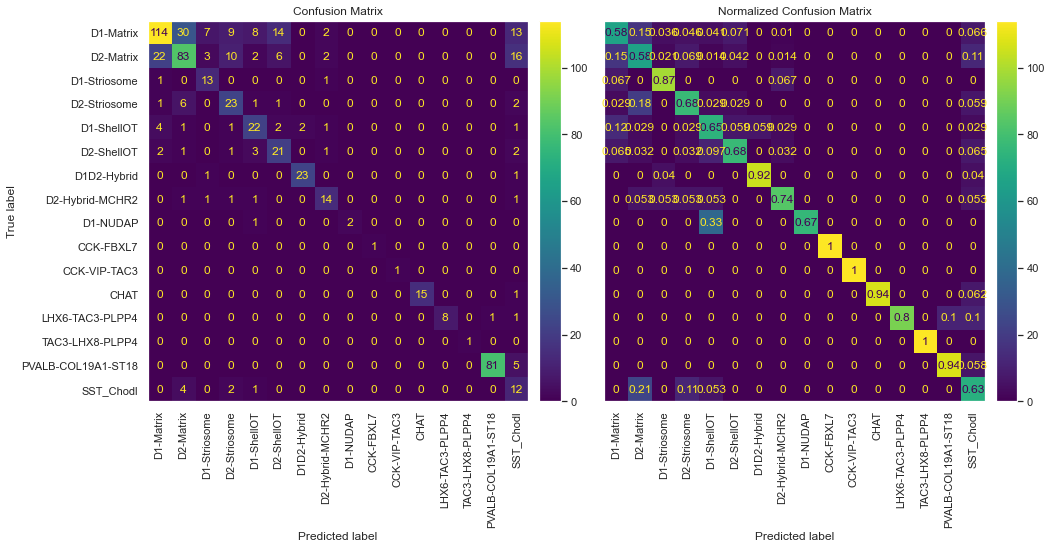

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
#from sklearn.model_selection import train_test_split
X = X_std
y = y_orig
sorted_classes = ['D1-Matrix', 'D2-Matrix',  'D1-Striosome', 'D2-Striosome', 'D1-ShellOT', 'D2-ShellOT', 
                  'D1D2-Hybrid', 'D2-Hybrid-MCHR2', 'D1-NUDAP' , 'CCK-FBXL7', 'CCK-VIP-TAC3', 'CHAT', 
                  'LHX6-TAC3-PLPP4', 'TAC3-LHX8-PLPP4', 'PVALB-COL19A1-ST18', 'SST_Chodl']
# Prepend letters because sklearn sorts classes alphabetically
sorted_prefix = [chr(ord('@')+num+1) for num in  range(len(sorted_classes))]
print(sorted_prefix)
y_pref = [sorted_prefix[sorted_classes.index(yy)] for yy in y] + y_orig
y = y_pref
print(y_pref)
print(len(y_pref))
print(np.unique(y_pref))
#sorted_id = range(len(sorted_classes))
#y_id = [sorted_id[sorted_classes.index(yy)] for yy in y]
#inds = sorted(range(len(y_id)), key=lambda k: y_id[k])
#y_sorted = y[inds]
#X_sorted = X[inds,:]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

c = 0.1

clf_lr = LogisticRegression(solver="lbfgs", multi_class='ovr', penalty = "l2", class_weight = 'balanced', max_iter=100000, C=c).fit(X, y)

# F1-macro slightly better on multi_class = 'multinomial' but this might be more sensical for distinguishing characteristics printout

#print(clf_lr.classes_)
#coef_sorted = np.empty_like(clf_lr.coef_)
#intercept_sorted = np.empty_like(clf_lr.intercept_)
#for i in range(len(clf_lr.coef_)):
#    coef_sorted[i,:] = clf_lr.coef_ [list(clf_lr.classes_).index(sorted_classes[i]),:]
#    intercept_sorted[i] = clf_lr.intercept_ [list(clf_lr.classes_).index(sorted_classes[i])]
#clf_lr.classes_ = sorted_classes
#clf_lr.coef_ = coef_sorted
#clf_lr.intercept_ = intercept_sorted
#print(clf_lr.coef_[0])

print("Without crossvalidation:")
print(classification_report(y, clf_lr.predict(X)))

y_pred = clf_lr.predict(X)
labels_cropped = [s[1:] for s in clf_lr.classes_]
print(labels_cropped)

fig, ax = plt.subplots(1,2, figsize=(15, 10))
ax[0].set_title('Confusion Matrix')
cmp = ConfusionMatrixDisplay.from_predictions(y, y_pred, display_labels= labels_cropped, ax = ax[0], colorbar=False)
ax[0].grid(False)

# Adding custom colorbar - default one is too tall and makes plot small
cax = fig.add_axes([ax[0].get_position().x1+0.01,ax[0].get_position().y0,0.02,ax[0].get_position().height])
plt.colorbar(cmp.im_,  cax=cax)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)

ax[1].set_title('Normalized Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y, y_pred, display_labels=labels_cropped, ax = ax[1], normalize='true', 
                                        values_format = '.2g', colorbar=False)
cax = fig.add_axes([ax[1].get_position().x1+0.01,ax[1].get_position().y0,0.02,ax[1].get_position().height])
plt.colorbar(cmp.im_,  cax=cax)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)
ax[1].grid(False)
ax[1].get_yaxis().set_visible(False)

print("Perc_correct", sum(y_pred==y)/len(y))

# SORT SUBCLASSES BY HIERARCHICAL CLUSTERING

In [37]:
# Remove subclasses with less than 5 cells - causes problems for crossvalidation scores further down and noisy
# Currently rmoves L5 PT, L6b, and SST Chodl

cts = y_orig.value_counts()
insuff_subclasses = cts.index[cts<5]
notinsuff_inds = [s not in insuff_subclasses for s in y_orig]
y_suff = y_orig[notinsuff_inds]
X_suff = X_std[notinsuff_inds,:]
insuff_subclasses
y_suff.reset_index(inplace=True, drop=True)
y_suff

0         D2-Striosome
1            D2-Matrix
2            D1-Matrix
3            D2-Matrix
4            D2-Matrix
            ...       
625         D2-ShellOT
626       D2-Striosome
627         D2-ShellOT
628          D1-Matrix
629    D2-Hybrid-MCHR2
Name: Subclass_Corr_label, Length: 630, dtype: object

504


/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


504
504
504
504
0.5412698412698413
504
504


/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


504
504
504


/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


0.5571428571428572
504
504
504
504
504
0.5619047619047619
504


/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


504
504
504
504


/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


0.5698412698412698
504
504
504
504
504
0.5698412698412698
504


/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


504
504
504
504


/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


0.573015873015873
504
504
504
504
504
0.5761904761904761
504


/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


504
504
504
504


/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


0.5777777777777777
504
504
504
504
504
0.5777777777777777
504


/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


504
504
504
504
0.573015873015873
504
504
504


/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


504
504
0.5619047619047619
0.06
0.5


/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


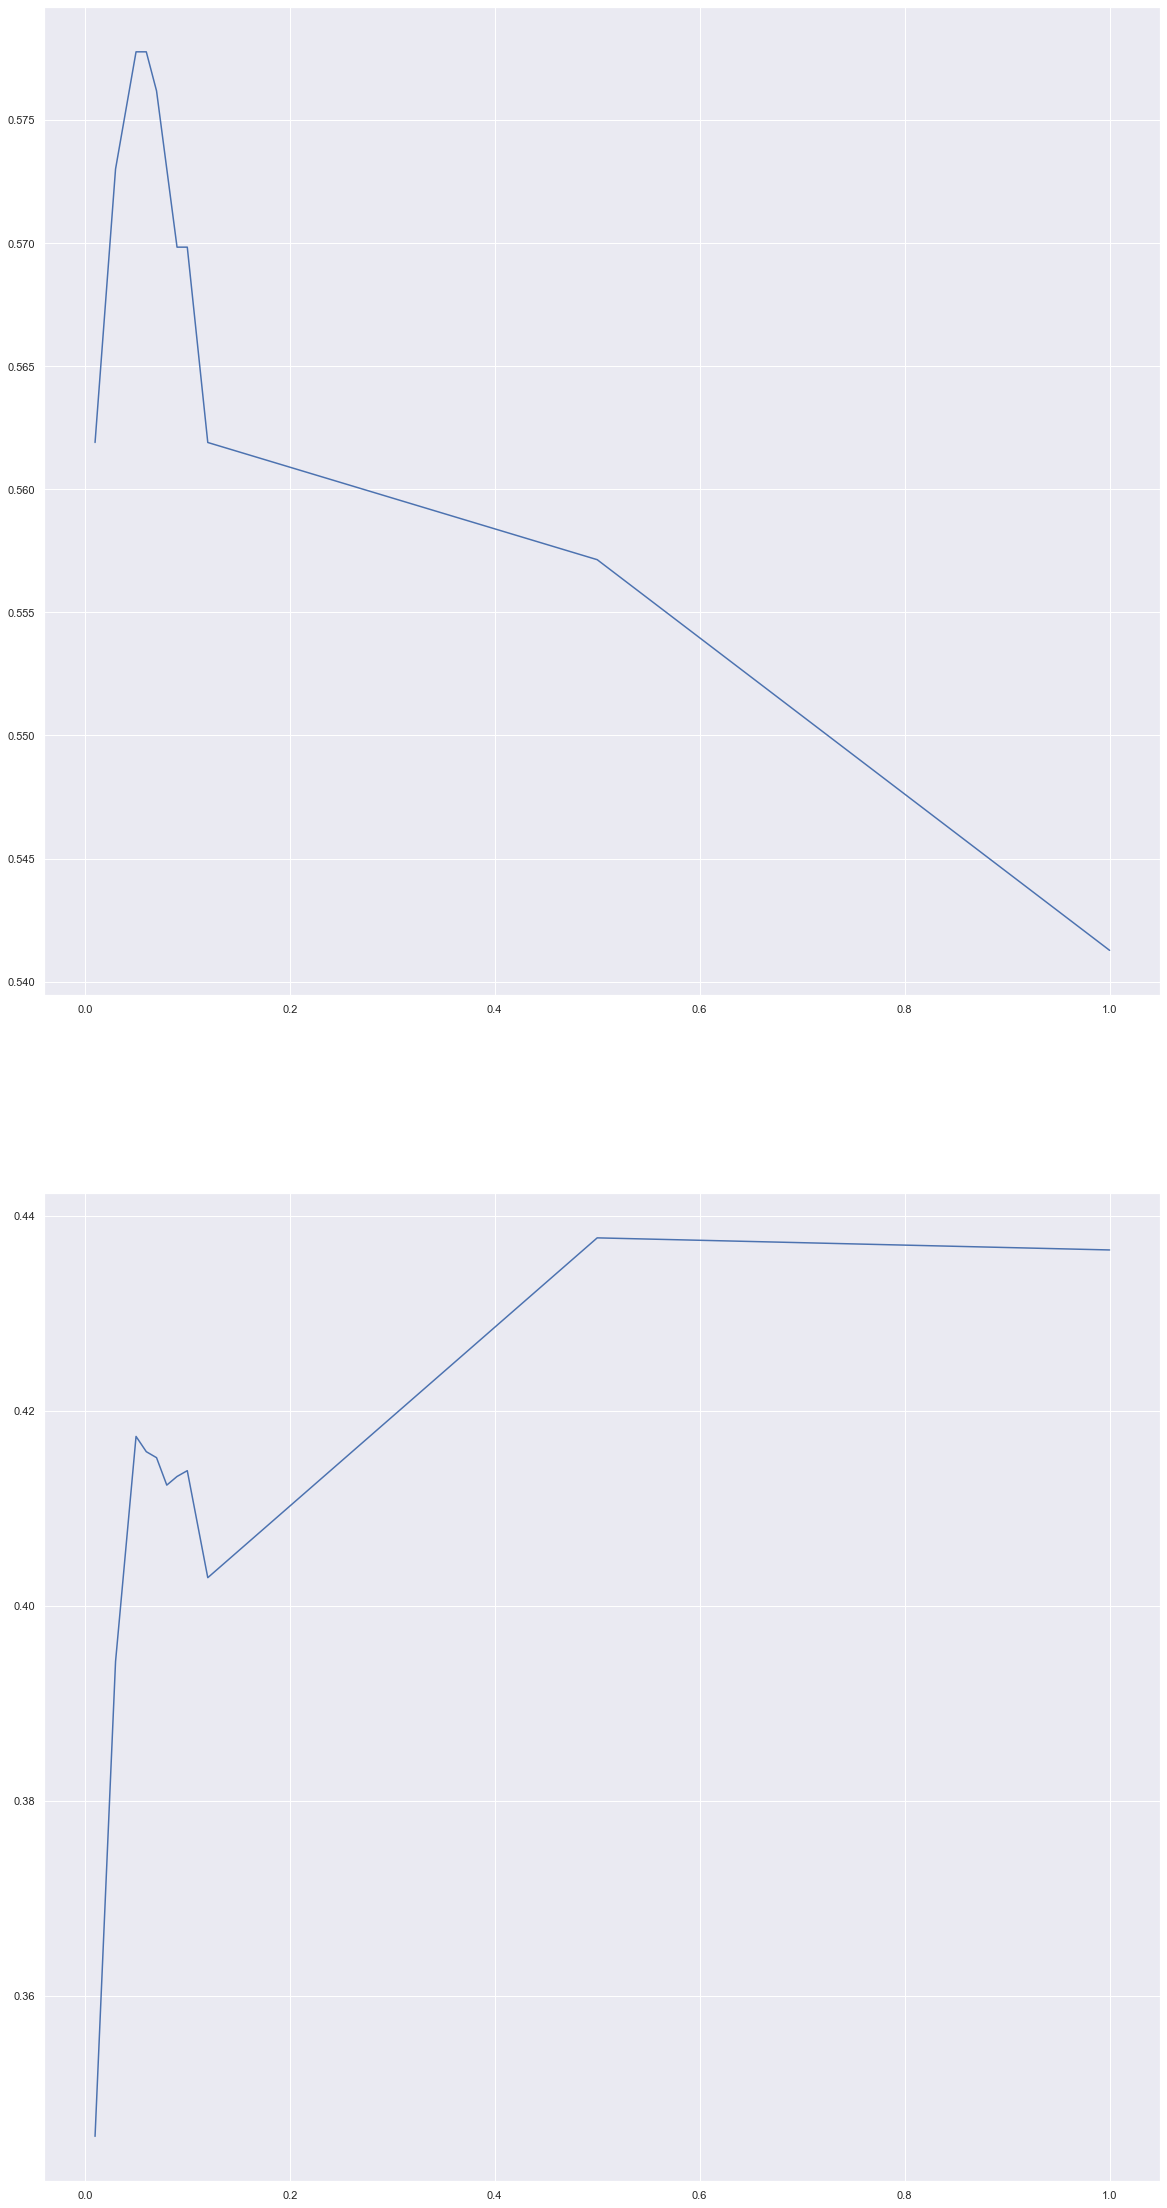

In [38]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

kf =KFold(n_splits=5, shuffle=True, random_state=1)

X = X_suff
y = y_suff

C_list = [1.0, 0.5, 0.12, 0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.03, 0.01]
perc_corr_all = []
f1_all = []

for c in C_list:
    perc_corr = []
    f1s = []
    for train_index, test_index in kf.split(X, y):

        print(len(train_index))
        clf_full = LogisticRegression(solver="lbfgs", multi_class='ovr', penalty = "l2", max_iter=1000, C=c).fit(X[train_index], y[train_index])

        #Predict the response for test dataset
        y_pred = clf_full.predict(X[test_index])

        perc_corr.append(sum(y_pred==y[test_index])/len(y[test_index]))
        f1 = f1_score(y[test_index], y_pred, average=None, labels = np.unique(y))
        f1s.append(f1)

    print(np.mean(perc_corr))
    perc_corr_all.append(np.mean(perc_corr))
    f1_all.append(np.mean(f1s))
    
fig,axs = plt.subplots(2,1)
axs[0].plot(C_list, perc_corr_all)
axs[1].plot(C_list, f1_all)
print(C_list[np.argmax(perc_corr_all)])
print(C_list[np.argmax(f1_all)])

In [39]:
# Work on only inh cells
IN_subclasses = ['CHAT', 'LHX6-TAC3-PLPP4', 'PVALB-COL19A1-ST18', 'SST_Chodl']
keep_inds = [s in IN_subclasses for s in y_orig]
y_suff = y_orig[keep_inds]
X_suff = X_std[keep_inds,:]
y_suff.reset_index(inplace=True, drop=True)
y_suff

0         LHX6-TAC3-PLPP4
1      PVALB-COL19A1-ST18
2      PVALB-COL19A1-ST18
3      PVALB-COL19A1-ST18
4      PVALB-COL19A1-ST18
              ...        
126    PVALB-COL19A1-ST18
127    PVALB-COL19A1-ST18
128    PVALB-COL19A1-ST18
129    PVALB-COL19A1-ST18
130                  CHAT
Name: Subclass_Corr_label, Length: 131, dtype: object

In [59]:
# Work on only on MSN cells
#keep_subclasses = ['D1-Matrix', 'D2-Matrix', 'D1-Striosome', 'D2-Striosome', 'D1-ShellOT', 'D2-ShellOT', 'D1D2-Hybrid', 'D2-Hybrid-MCHR2']
keep_subclasses = ['D1-Matrix', 'D2-Matrix', 'D1-Striosome', 'D2-Striosome', 'D1D2-Hybrid', 'D2-Hybrid-MCHR2']
keep_inds = [s in keep_subclasses for s in y_orig]
y_suff = y_orig[keep_inds]
X_suff = X_std[keep_inds,:]
y_suff.reset_index(inplace=True, drop=True)
y_suff

0         D2-Striosome
1            D2-Matrix
2            D1-Matrix
3            D2-Matrix
4            D2-Matrix
            ...       
429          D1-Matrix
430          D1-Matrix
431       D2-Striosome
432          D1-Matrix
433    D2-Hybrid-MCHR2
Name: Subclass_Corr_label, Length: 434, dtype: object

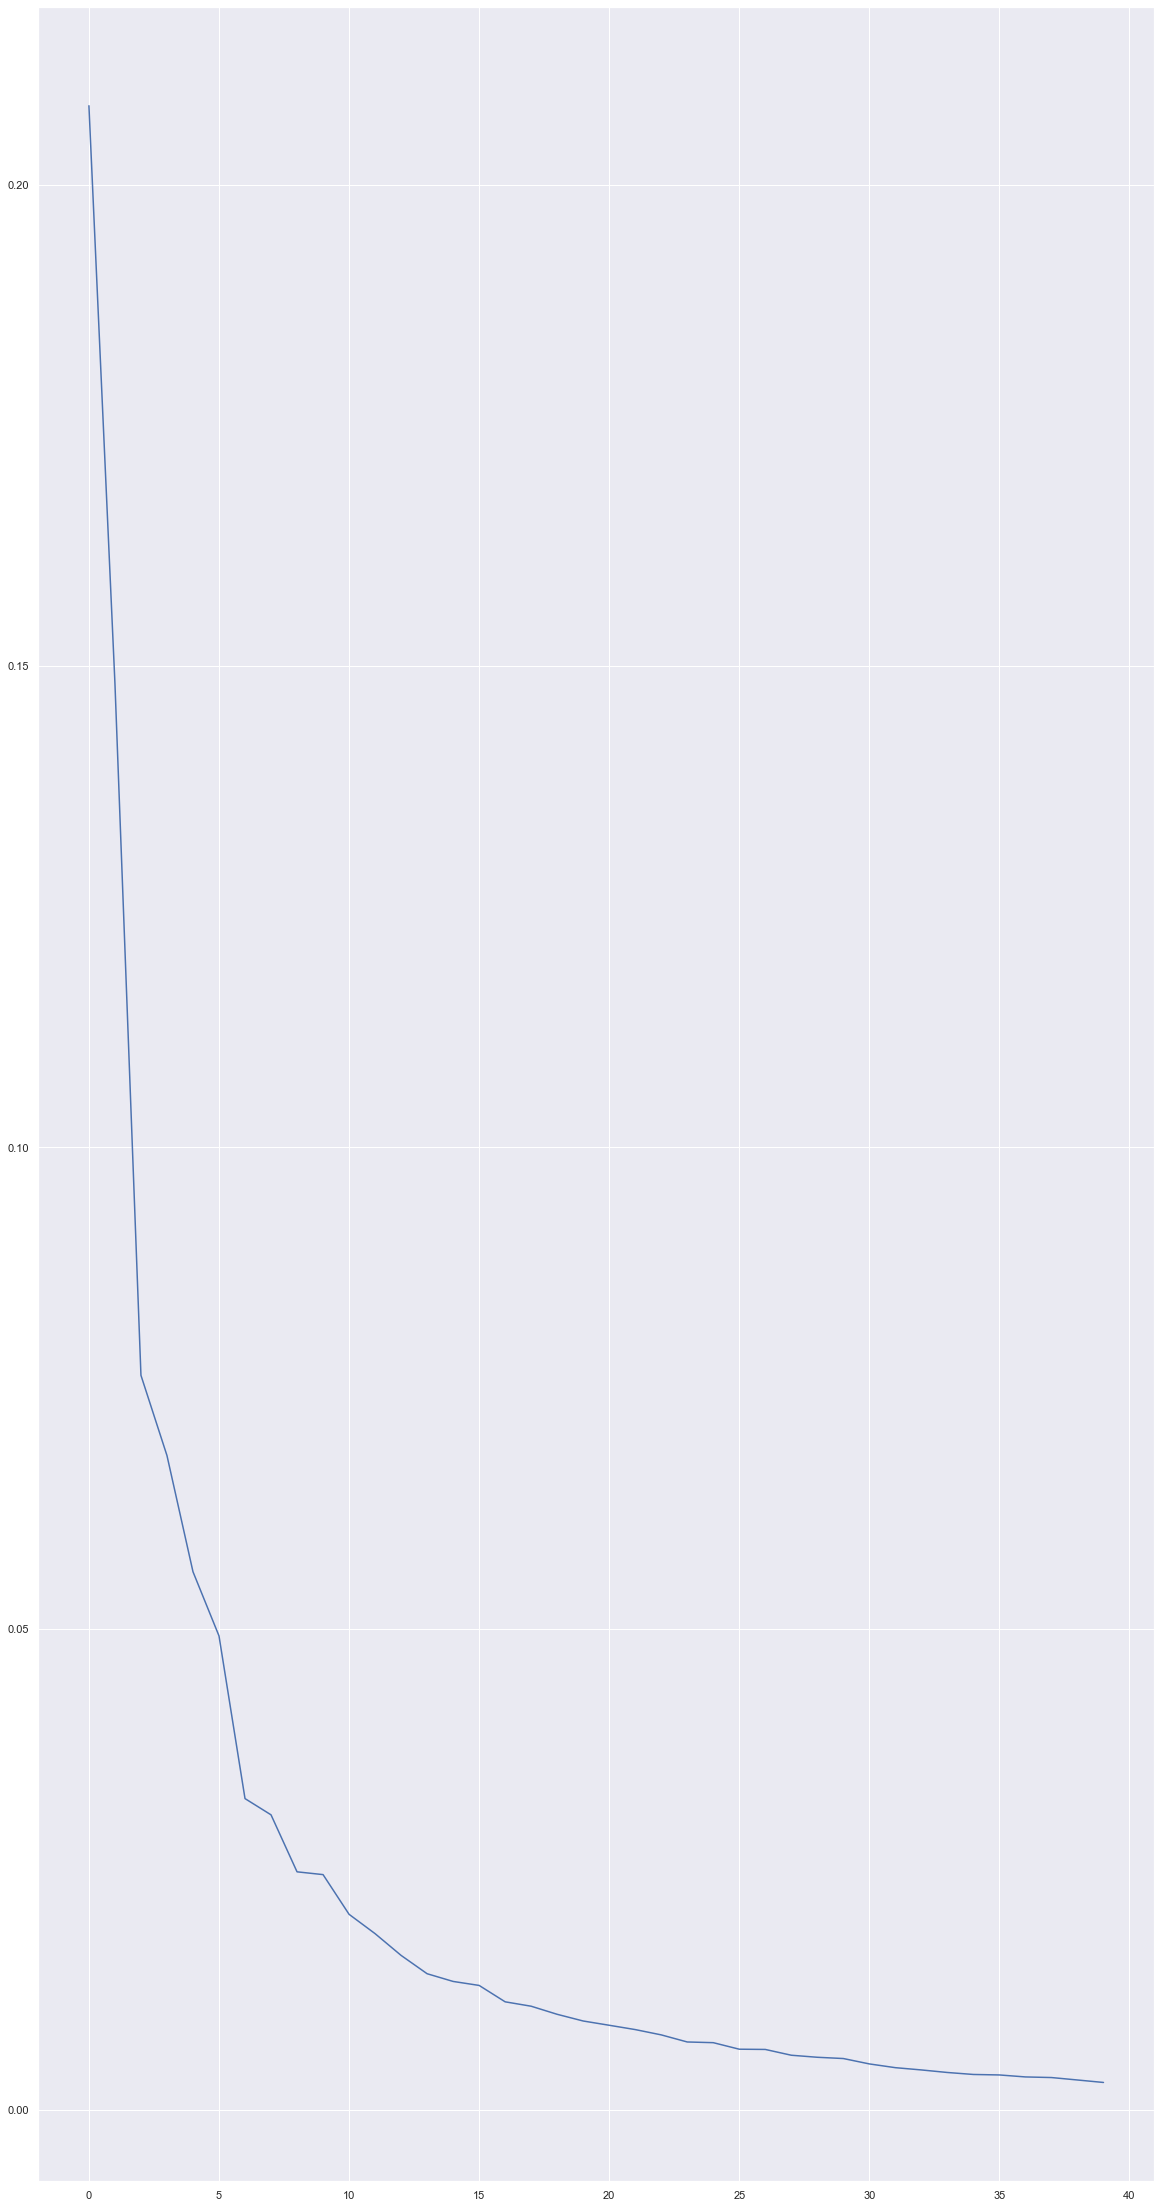

In [60]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=40)
X_suff = pca.fit_transform(X_suff)
plt.plot(pca.explained_variance_ratio_)


Text(0, 0.5, 'PC2')

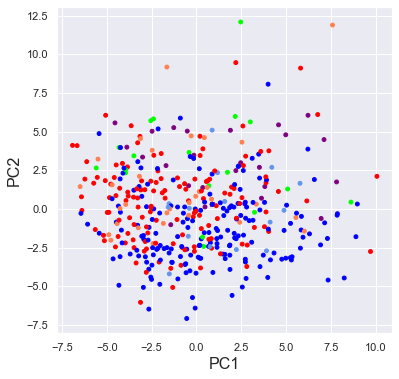

In [125]:
fig,ax = plt.subplots(1,1,figsize = (6,6))
col_dict = dict()
#col_dict['STRd D1 Matrix'] = 'blue'       
#col_dict['STRd D2 Matrix'] = 'red'       
#col_dict['STRd D1 Striosome'] = 'cornflowerblue'
#col_dict['STRd D2 Matrix'] = 'coral'
#col_dict['STRd D1D2 Hybrid'] = 'purple'
#col_dict['STRd D2 StrioMat Hybrid'] = 'green'

col_dict['D1-Matrix'] = 'blue'       
col_dict['D2-Matrix'] = 'red'       
col_dict['D1-Striosome'] = 'cornflowerblue'
col_dict['D2-Striosome'] = 'coral'
col_dict['D1D2-Hybrid'] = 'purple'
col_dict['D2-Hybrid-MCHR2'] = 'lime'

sc = ax.scatter(
    X_suff[:, 0],
    X_suff[:, 1],
    #c=[sns.color_palette()[sc_dict[yy]] for yy in y]
    c = [col_dict[sc] for sc in df_ephys_trans[keep_inds]['Subclass_Corr_label']],
    s = 15
)

#markers = [plt.scatter([0,0],[0,0],color=color, s= 4) for color in col_dict.values()]
#plt.legend(markers, col_dict.keys(), numpoints=1)

X_suff.shape
ax.set_xlabel('PC1', fontsize = 16)
ax.set_ylabel('PC2', fontsize = 16)

#lp = lambda i: plt.plot([],color=sc.cmap(sc.norm(i)), ms=np.sqrt(size), mec="none",
#                        label="Feature {:g}".format(i), ls="", marker="o")[0]
#handles = [lp(i) for i in df_ephys_trans['Subclass_Corr_color']]
#plt.legend(handles=handles)


['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P']
['TR Cholinergic GABA', 'TR FS PTHLH ST18 GABA', 'TR SST Chodl GABA', 'TR TAC3 PLPP4 GABA']
Perc_correct 0.9083969465648855


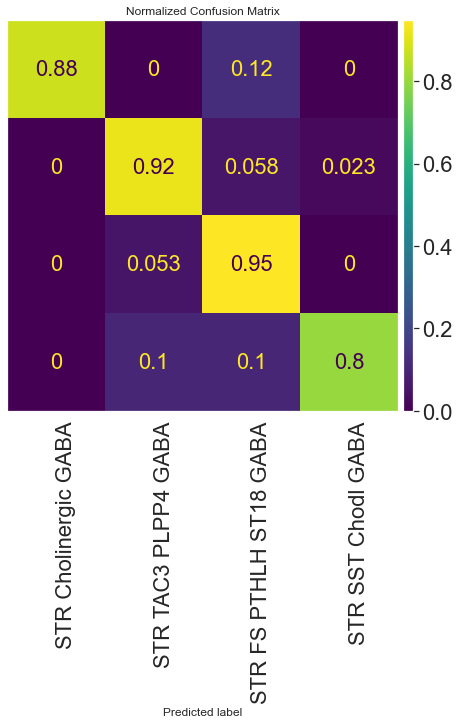

In [45]:
# Logistic Regression Crossvalidation Confusion Matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import ConfusionMatrixDisplay

font = {'size'   : 22}
plt.rc('font', **font)

X = X_suff
#y = y_suff
y_suff_cons = [link[str] for str in y_suff]    # Translate to consensus nomenclature
y_suff_cons = pd.DataFrame(y_suff_cons)
y_suff_cons[0] = y_suff_cons[0].astype('category')
#y = y_suff_cons[0].cat.reorder_categories(['STR FS PTHLH ST18 GABA', 
#                                        'STR SST Chodl GABA', 
#                                        'STR Cholinergic GABA', 
#                                        'STR TAC3 PLPP4 GABA'])
#y = y_suff_cons[0].cat.reorder_categories(['D1-Matrix', 'D2-Matrix', 
#                                           'D1-Striosome', 'D2-Striosome', 
#                                           'D1-ShellOT', 'D2-ShellOT', 
#                                           'D1D2-Hybrid', 'D2-Hybrid-MCHR2'])
y = y_suff_cons[0].cat.reorder_categories([link[str] for str in keep_subclasses])

sorted_classes = ['D1-Matrix', 'D2-Matrix',  'D1-Striosome', 'D2-Striosome', 'D1-ShellOT', 'D2-ShellOT', 
                  'D2-Hybrid-MCHR2', 'D1D2-Hybrid', 'D1-NUDAP' , 'CCK-FBXL7', 'CCK-VIP-TAC3', 'CHAT', 
                  'LHX6-TAC3-PLPP4', 'TAC3-LHX8-PLPP4', 'PVALB-COL19A1-ST18', 'SST_Chodl']
# Prepend letters because sklearn sorts classes alphabetically
sorted_prefix = [chr(ord('@')+num+1) for num in  range(len(sorted_classes))]
print(sorted_prefix)
#y_pref = [sorted_prefix[sorted_classes.index(yy)] for yy in y] + y_suff
#y = y_pref

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

#c = 0.07
c = 0.12

#kf =KFold(n_splits=4, shuffle=True, random_state=1)
loo = LeaveOneOut()

y_pred_all = np.array([])
y_test_all = np.array([])
#for train_index, test_index in kf.split(X, y):
for train_index, test_index in loo.split(X):
    clf_lr = LogisticRegression(solver="lbfgs", multi_class='ovr', penalty = "l2", class_weight = 'balanced', max_iter=100000, C=c).fit(X[train_index], y[train_index])
 
    #clf_full = LogisticRegression(solver="lbfgs", multi_class='ovr', penalty = "l2", max_iter=1000, C=c).fit(X[train_index], y[train_index])

    #Predict the response for test dataset
    y_pred = clf_lr.predict(X[test_index])
    y_pred_all = np.concatenate((y_pred_all, y_pred))
    y_test_all = np.concatenate((y_test_all, y[test_index]))

#clf_lr = LogisticRegression(solver="lbfgs", multi_class='ovr', penalty = "l2", class_weight = 'balanced', max_iter=100000, C=c).fit(X_train, y_train)

#print("Crossvalidation:")
#print(classification_report(y_test, clf_lr.predict(X_test)))

#y_pred = clf_lr.predict(X_test)
labels_cropped = [s[1:] for s in clf_lr.classes_]
print(labels_cropped)

#fig, ax = plt.subplots(1,2, figsize=(15, 10))
fig, ax = plt.subplots(1,1, figsize=(7, 10))
'''
ax[0].set_title('Confusion Matrix')
cmp = ConfusionMatrixDisplay.from_predictions(y_test_all, y_pred_all, display_labels=y.cat.categories, ax = ax[0], colorbar=False)
ax[0].grid(False)

# Adding custom colorbar - default one is too tall and makes plot small
cax = fig.add_axes([ax[0].get_position().x1+0.01,ax[0].get_position().y0,0.02,ax[0].get_position().height])
plt.colorbar(cmp.im_,  cax=cax)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)

ax[1].set_title('Normalized Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_test_all, y_pred_all, display_labels=y.cat.categories, ax = ax[1], normalize='true', 
                                        values_format = '.2g', colorbar=False)
cax = fig.add_axes([ax[1].get_position().x1+0.01,ax[1].get_position().y0,0.02,ax[1].get_position().height])
plt.colorbar(cmp.im_,  cax=cax)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 45, ha='right', rotation_mode='anchor', fontsize = 20)
ax[1].grid(False)
ax[1].get_yaxis().set_visible(False)
'''
ax.set_title('Normalized Confusion Matrix')
cmp = ConfusionMatrixDisplay.from_predictions(y_test_all, y_pred_all, display_labels=y.cat.categories, ax = ax, normalize='true', 
                                        values_format = '.2g', colorbar=False)
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
cbar = plt.colorbar(cmp.im_,  cax=cax)
cbar.ax.tick_params(labelsize=22)
plt.colorbar(cmp.im_,  cax=cax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha='right', rotation_mode='anchor', fontsize = 22)
ax.grid(False)
ax.get_yaxis().set_visible(False)

print("Perc_correct", sum(y_pred_all==y_test_all)/len(y_test_all))


/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `base_estimator_` was deprecated in version 1.2 and will be removed in 1.4. Use `estimator_` instead.
  warnings.warn(msg, category=FutureWarning)


Training accuracy: 0.9854
Test accuracy:     0.4877
Training
                         precision    recall  f1-score   support

         STRd D1 Matrix       1.00      0.95      0.97       128
      STRd D1 Striosome       1.00      1.00      1.00       128
       STRd D1D2 Hybrid       1.00      0.96      0.98       128
         STRd D2 Matrix       1.00      0.98      0.99       128
STRd D2 StrioMat Hybrid       1.00      1.00      1.00       128
      STRd D2 Striosome       0.90      1.00      0.94       128
          STRv D1 Shell       1.00      1.00      1.00       128
          STRv D2 Shell       1.00      1.00      1.00       128

               accuracy                           0.99      1024
              macro avg       0.99      0.99      0.99      1024
           weighted avg       0.99      0.99      0.99      1024

Test
                         precision    recall  f1-score   support

         STRd D1 Matrix       0.61      0.65      0.63        65
      STRd D1 Strios

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

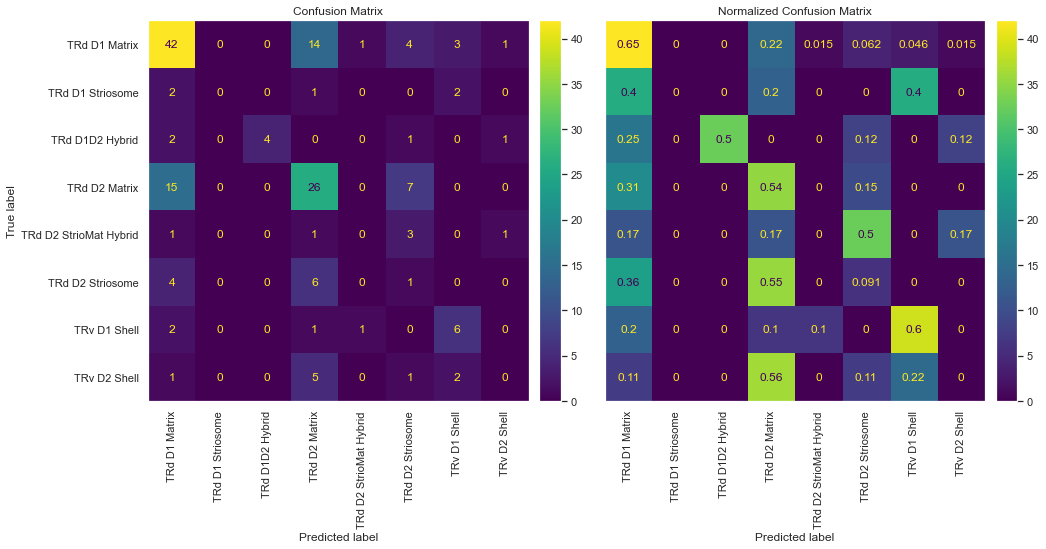

In [50]:
from logitboost import LogitBoost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from imblearn.over_sampling import RandomOverSampler

test_size = 1/3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, stratify=y, random_state=0)

ros = RandomOverSampler(random_state=1)
X_train, y_train = ros.fit_resample(X_train, y_train)

lboost = LogitBoost(n_estimators=200, random_state=0)
lboost.fit(X_train, y_train)

y_pred_train = lboost.predict(X_train)
y_pred_test = lboost.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print('Training accuracy: %.4f' % accuracy_train)
print('Test accuracy:     %.4f' % accuracy_test)

report_train = classification_report(y_train, y_pred_train)
report_test = classification_report(y_test, y_pred_test)
print('Training\n%s' % report_train)
print('Test\n%s' % report_test)

fig, ax = plt.subplots(1,2, figsize=(15, 10))
ax[0].set_title('Confusion Matrix')
cmp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, display_labels= labels_cropped, ax = ax[0], colorbar=False)
ax[0].grid(False)

# Adding custom colorbar - default one is too tall and makes plot small
cax = fig.add_axes([ax[0].get_position().x1+0.01,ax[0].get_position().y0,0.02,ax[0].get_position().height])
plt.colorbar(cmp.im_,  cax=cax)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)

ax[1].set_title('Normalized Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, display_labels=labels_cropped, ax = ax[1], normalize='true', 
                                        values_format = '.2g', colorbar=False)
cax = fig.add_axes([ax[1].get_position().x1+0.01,ax[1].get_position().y0,0.02,ax[1].get_position().height])
plt.colorbar(cmp.im_,  cax=cax)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)
ax[1].grid(False)
ax[1].get_yaxis().set_visible(False)


['upstroke_downstroke_ratio_ramp' 'threshold_v_ramp' 'width_ramp'
 'upstroke_ramp' 'downstroke_ramp' 'width_suprathresh_ramp'
 'trough_v_ramp' 'threshold_i_ramp' 'postap_slope_ramp'
 'fast_trough_deltav_ramp' 'peak_deltav_ramp'
 'upstroke_downstroke_ratio_short_square' 'threshold_v_short_square'
 'width_short_square' 'upstroke_short_square' 'downstroke_short_square'
 'width_suprathresh_short_square' 'peak_deltav_short_square'
 'peak_ratio_chirp' 'peak_freq_chirp' '3db_freq_chirp'
 'peak_impedance_chirp' 'low_freq_impedance_chirp' 'sync_freq_chirp'
 'phase_peak_chirp' 'phase_low_chirp' 'total_inductive_phase_chirp' 'sag'
 'sag_area' 'sag_tau' 'v_baseline' 'rheobase_i' 'fi_fit_slope'
 'vm_for_sag' 'input_resistance' 'input_resistance_ss' 'tau'
 'latency_rheo' 'avg_rate_rheo' 'mean_isi_rheo'
 'upstroke_downstroke_ratio_rheo' 'threshold_v_rheo' 'peak_v_rheo'
 'width_rheo' 'upstroke_rheo' 'downstroke_rheo' 'width_suprathresh_rheo'
 'trough_v_rheo' 'fast_trough_v_rheo' 'postap_slope_rheo'
 '

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Perc_correct 0.5381443298969072


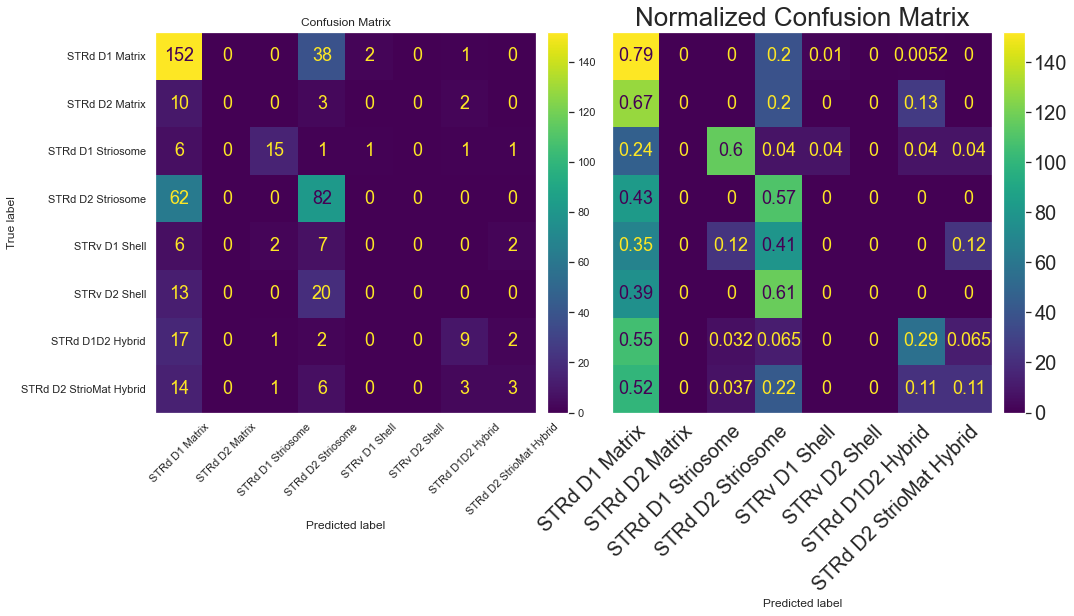

In [52]:
# Random forest classifier

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from matplotlib import rcParams

rcParams.update({'font.size': 18})

#random_feat = np.random.choice(X_std.shape[1], sum(useful), replace=False)
#random_feat = np.random.choice(X_std.shape[1], 1, replace=False)
#print(random_feat)
X = X_suff
#y = y_suff
y_suff_cons = [link[str] for str in y_suff]    # Translate to consensus nomenclature
y_suff_cons = pd.DataFrame(y_suff_cons)
y_suff_cons[0] = y_suff_cons[0].astype('category')

y = y_suff_cons[0].cat.reorder_categories([link[str] for str in keep_subclasses])
#y_pref = [sorted_prefix[sorted_classes.index(yy)] for yy in y_suff] + y_suff_cons
#y = y_pref

feature_cols = imputer.feature_names_in_
#feature_cols = imputer.feature_names_in_[useful]
#feature_cols_rand = imputer.feature_names_in_[random_feat]
print(feature_cols)

#kf =KFold(n_splits=4, shuffle=True, random_state=1)
loo = LeaveOneOut()
#print(loo.get_n_splits(X))
np.random.seed(42)

#perc_corr = []
#for train_index, test_index in kf.split(X, y):
#    # Create Decision Tree classifer object
#    clf1 = RandomForestClassifier()

    # Train Decision Tree Classifer
#    clf1 = clf1.fit(X[train_index],y[train_index])
    
    #Predict the response for test dataset
#    y_pred = clf1.predict(X[test_index])
    
#    perc_corr.append(sum(y_pred==y[test_index])/len(y[test_index]))
    
#print("X_suff:", np.mean(perc_corr))

y_pred_all = np.array([])
y_test_all = np.array([])
#for train_index, test_index in kf.split(X, y):
for train_index, test_index in loo.split(X):
    clf1 = RandomForestClassifier(n_estimators=300, max_features = 'auto')
    clf1 = clf1.fit(X[train_index],y[train_index])

    #Predict the response for test dataset
    y_pred = clf1.predict(X[test_index])
    y_pred_all = np.concatenate((y_pred_all, y_pred))
    y_test_all = np.concatenate((y_test_all, y[test_index]))

fig, ax = plt.subplots(1,2, figsize=(15, 10))
ax[0].set_title('Confusion Matrix')
cmp = ConfusionMatrixDisplay.from_predictions(y_test_all, y_pred_all, display_labels=y.cat.categories, ax = ax[0], colorbar=False)
ax[0].grid(False)

# Adding custom colorbar - default one is too tall and makes plot small
cax = fig.add_axes([ax[0].get_position().x1+0.01,ax[0].get_position().y0,0.02,ax[0].get_position().height])
plt.colorbar(cmp.im_,  cax=cax)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 45)

ax[1].set_title('Normalized Confusion Matrix', fontsize = 26)
ConfusionMatrixDisplay.from_predictions(y_test_all, y_pred_all, display_labels=y.cat.categories, ax = ax[1], normalize='true', 
                                        values_format = '.2g', colorbar=False)
cax = fig.add_axes([ax[1].get_position().x1+0.01,ax[1].get_position().y0,0.02,ax[1].get_position().height])
cbar = plt.colorbar(cmp.im_,  cax=cax)
cbar.ax.tick_params(labelsize=20)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 45, ha='right', rotation_mode='anchor', fontsize = 20)
ax[1].grid(False)
ax[1].get_yaxis().set_visible(False)

print("Perc_correct", sum(y_pred_all==y_test_all)/len(y_test_all))


/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to 

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to 

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to 

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to 

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to 

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to 

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to 

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to 

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to 

0.9327731092436975


/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to 

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to 

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to 

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to 

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to 

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to 

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to 

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to 

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to 

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to 

0.9411764705882353


/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to 

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to 

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to 

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to 

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to 

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to 

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to 

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to 

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to 

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to 

0.9327731092436975


/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to 

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to 

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to 

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to 

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to 

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to 

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to 

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to 

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to 

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to 

0.9327731092436975
300
300


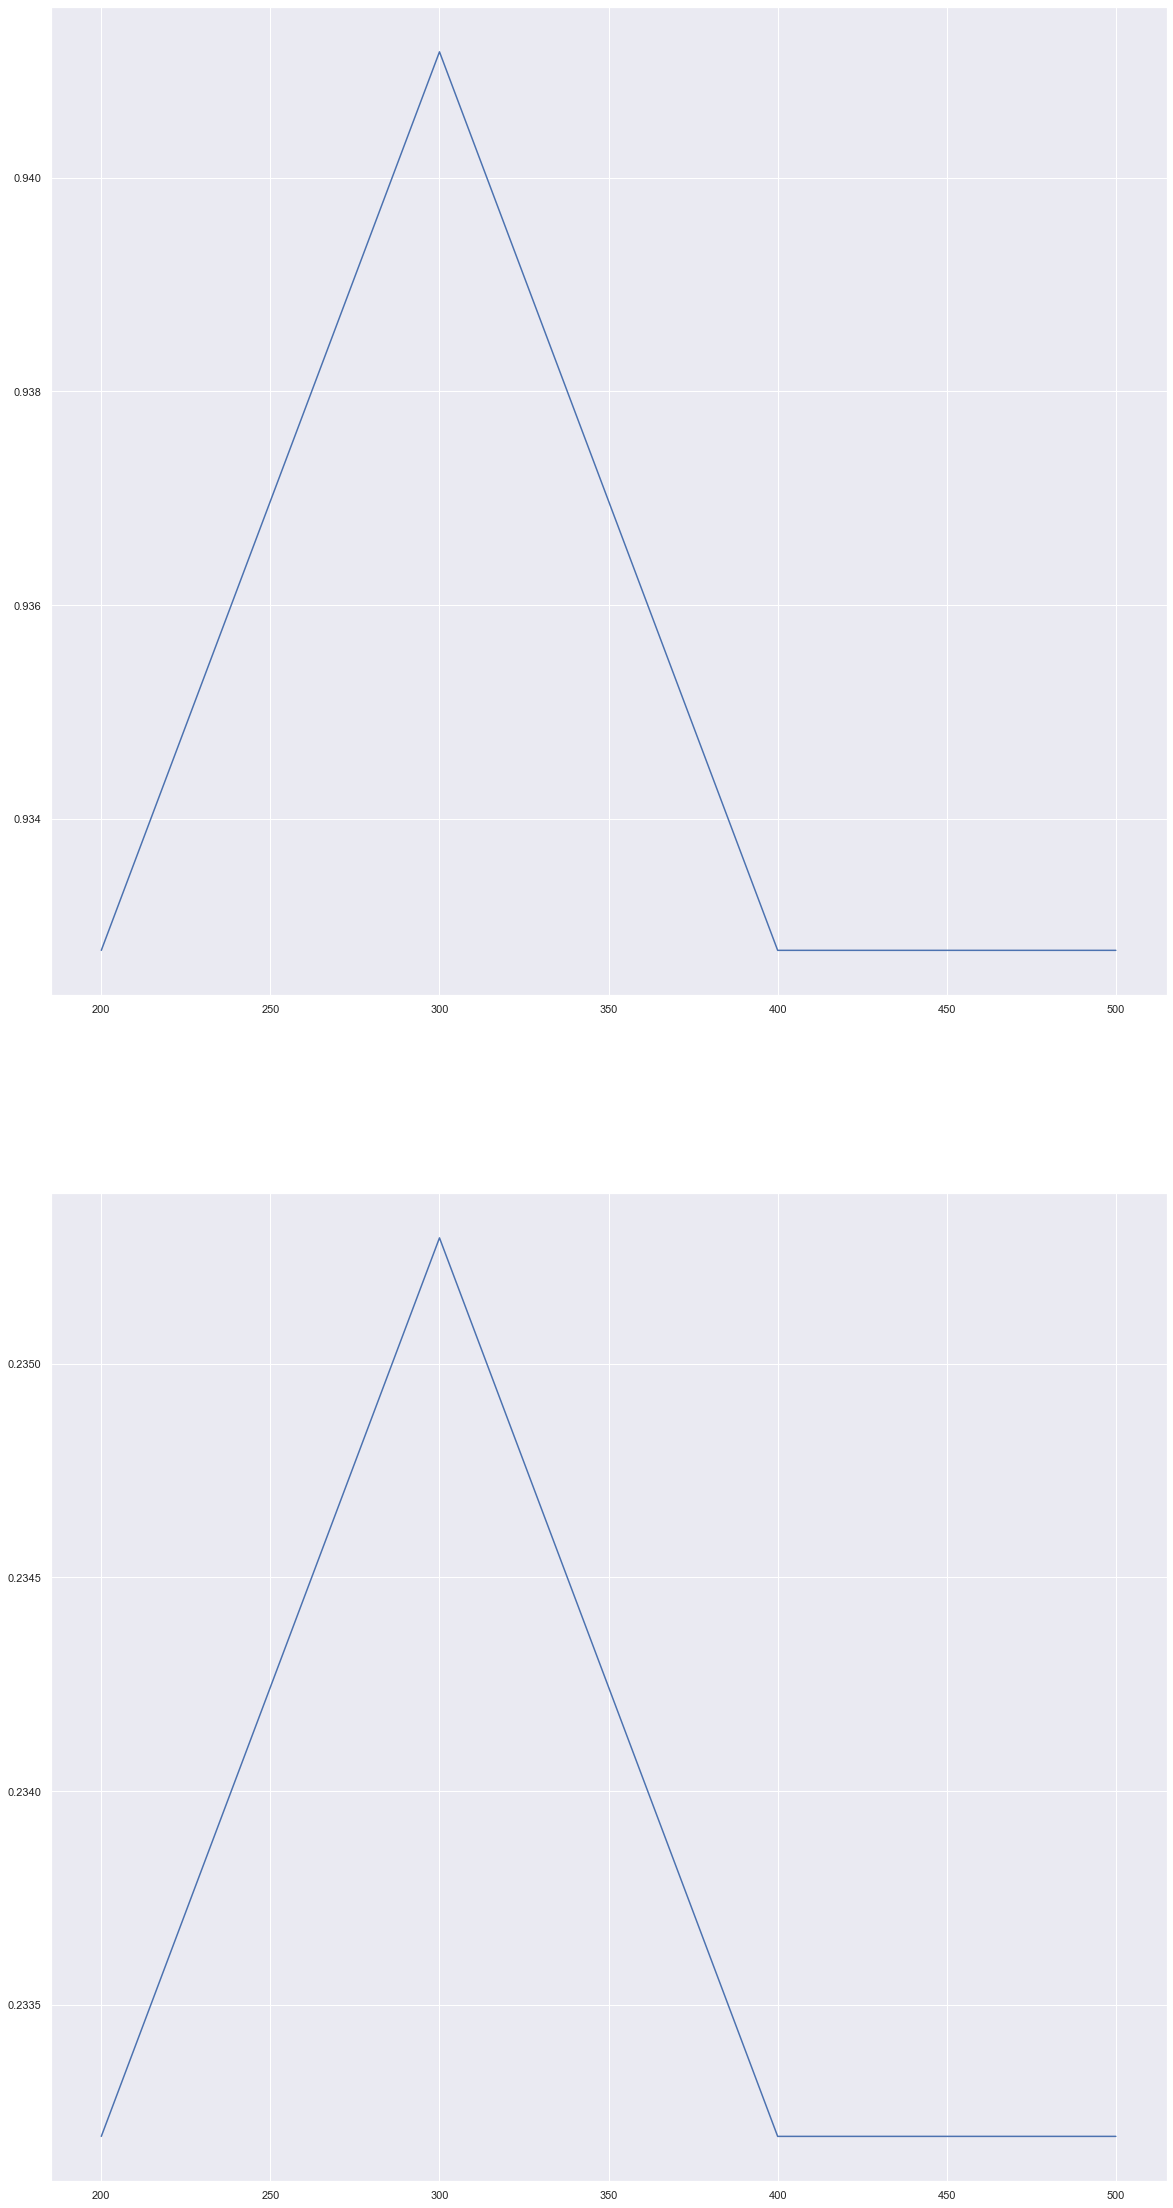

In [50]:
# Tune Random Forest

X = X_suff
y = y_suff

#n_list = [1,3, 10, 30, 100, 300, 1000]
n_list = [200,300,400,500]
#n = 300
maxf_list = [10,25, 'auto']   # Auto is best
maxf = 'auto'

perc_corr_all = []
f1_all = []

for n in n_list:
    perc_corr = []
    f1s = []
    for train_index, test_index in loo.split(X):
        clf1 = RandomForestClassifier(n_estimators=n, max_features = maxf)
        clf1 = clf1.fit(X[train_index],y[train_index])
        #Predict the response for test dataset
        y_pred = clf1.predict(X[test_index])

        perc_corr.append(sum(y_pred==y[test_index])/len(y[test_index]))
        f1 = f1_score(y[test_index], y_pred, average=None, labels = np.unique(y))
        f1s.append(f1)
        
    print(np.mean(perc_corr))
    perc_corr_all.append(np.mean(perc_corr))
    f1_all.append(np.mean(f1s))
    
fig,axs = plt.subplots(2,1)
axs[0].plot(n_list, perc_corr_all)
axs[1].plot(n_list, f1_all)
print(n_list[np.argmax(perc_corr_all)])
print(n_list[np.argmax(f1_all)])


In [62]:
# Use ANOVA to prune down to most informative features

Index(['STR FS PTHLH ST18 GABA', 'STR SST Chodl GABA', 'STR Cholinergic GABA',
       'STR TAC3 PLPP4 GABA'],
      dtype='object')

AttributeError: 'RandomForestClassifier' object has no attribute 'tree_'

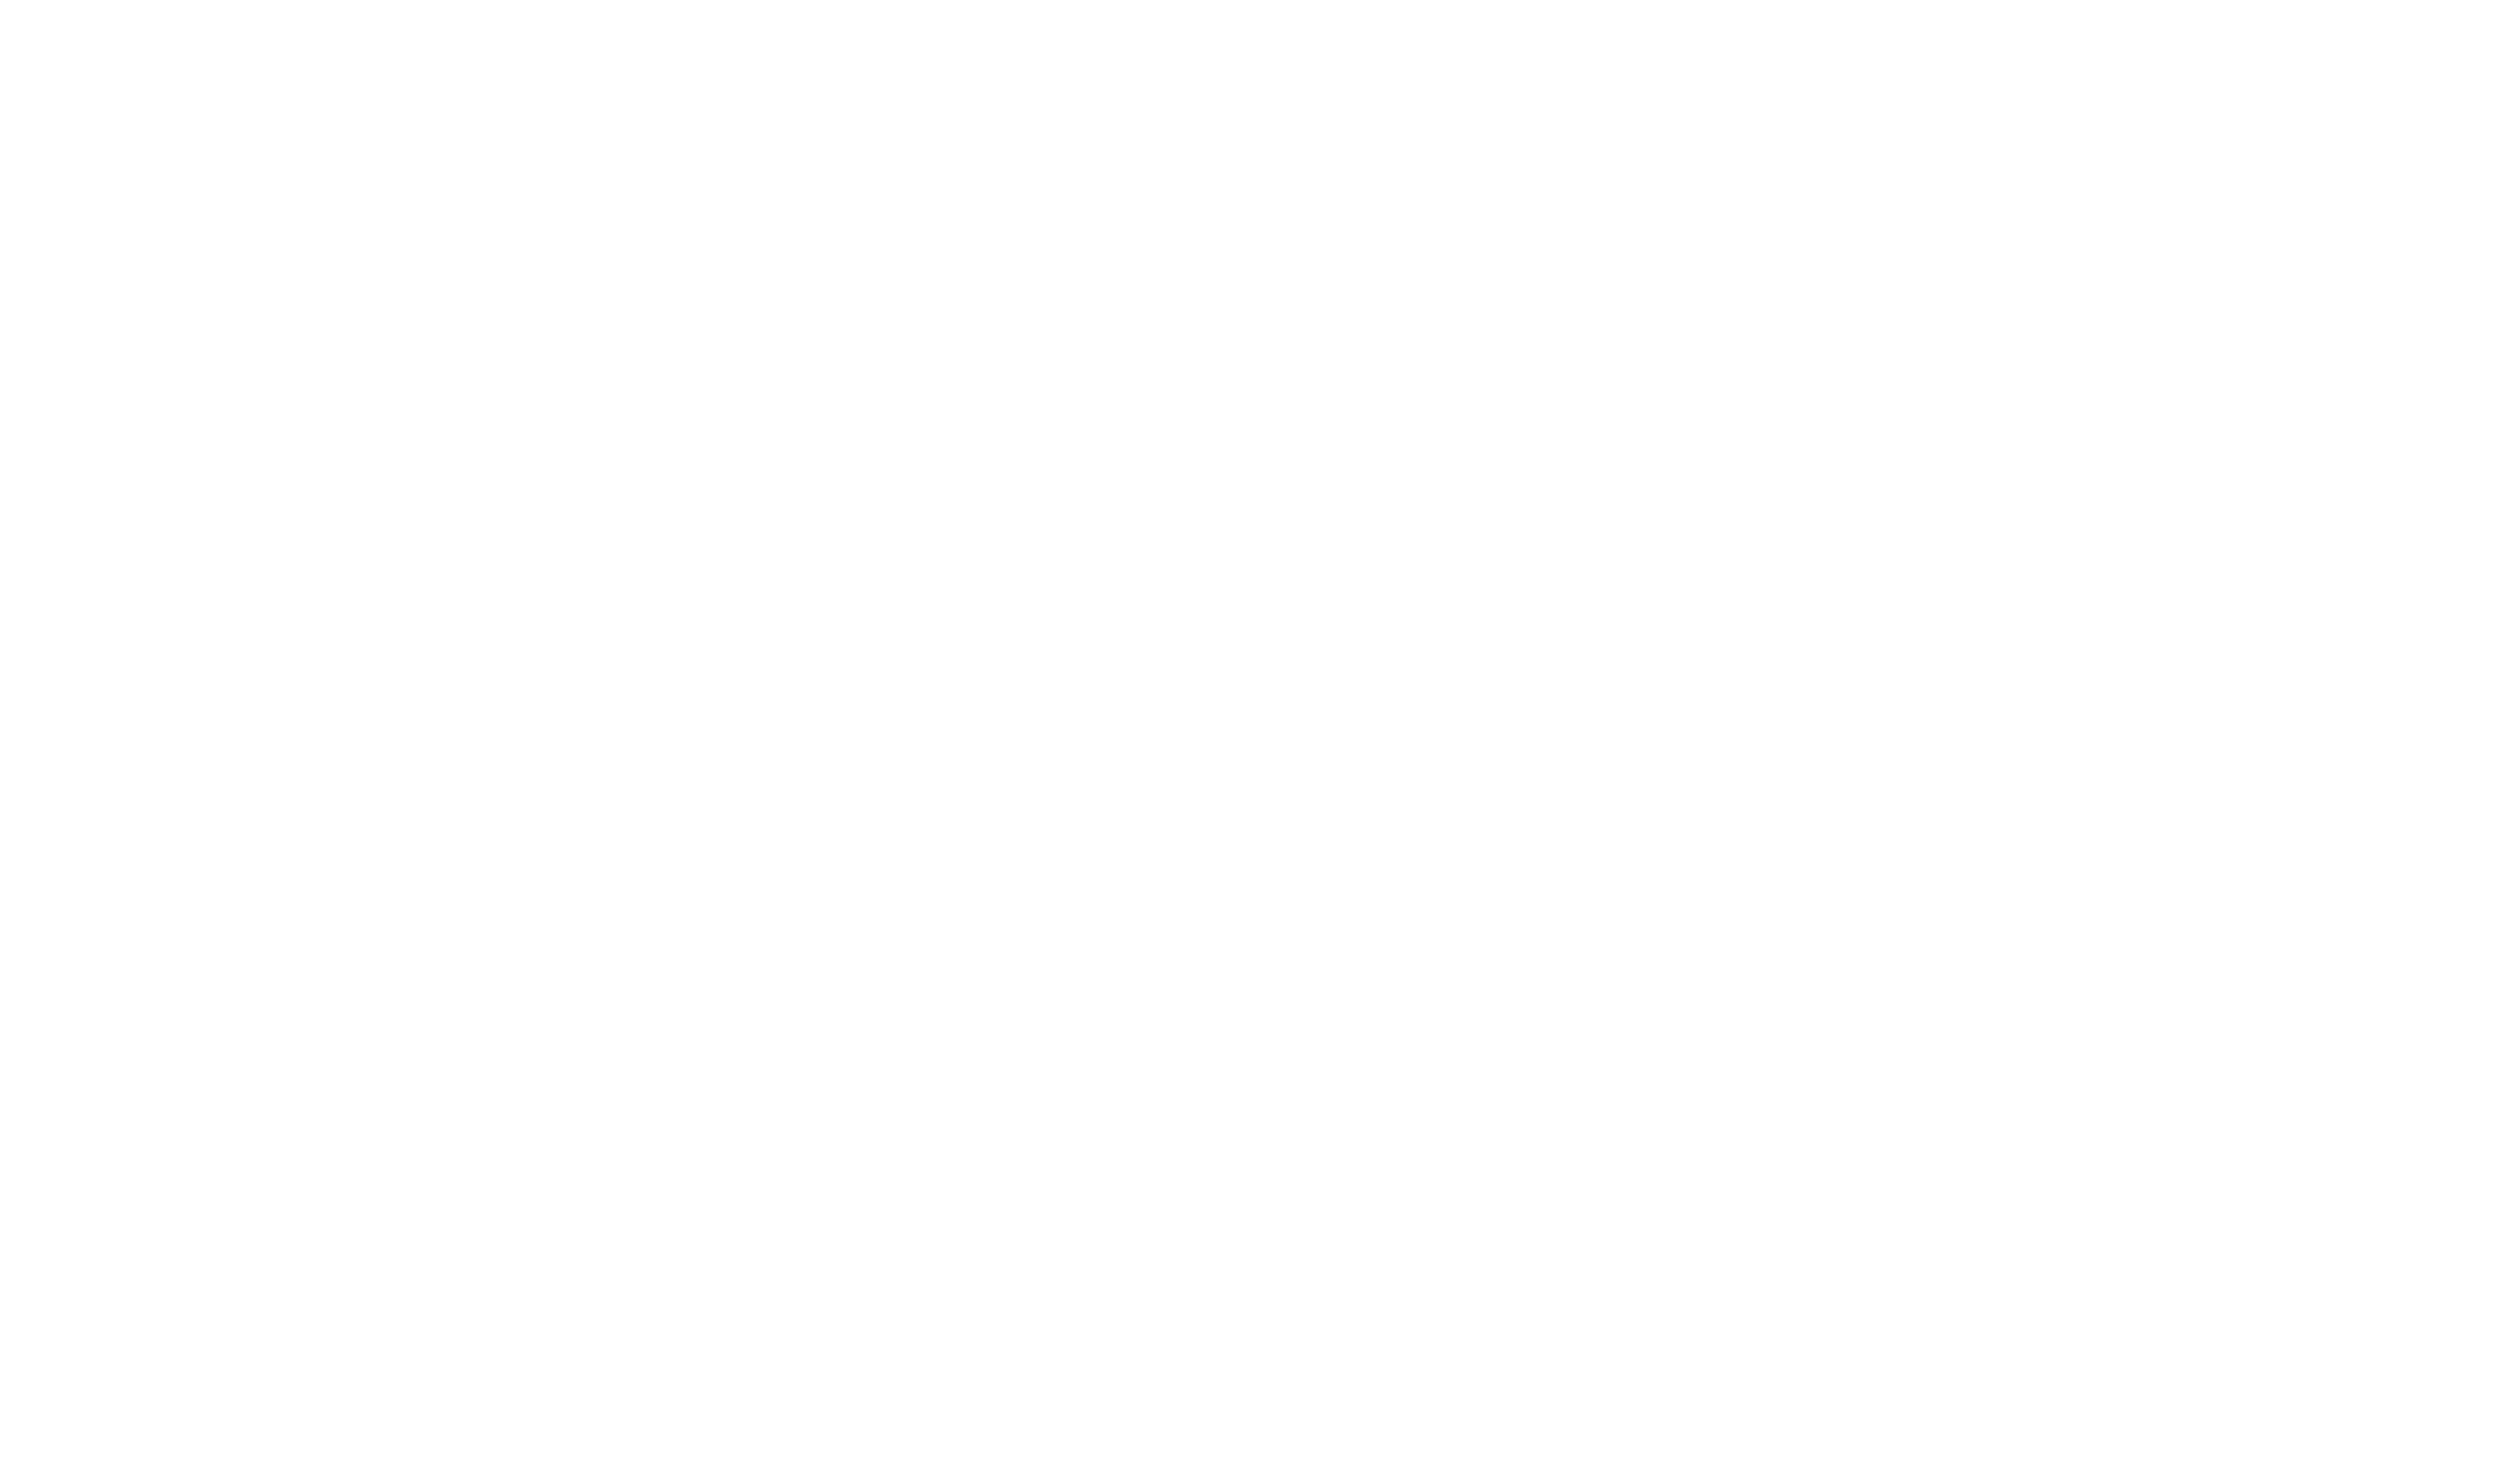

In [67]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

fig = plt.figure(figsize=(50,30))
class_names = clf1.classes_

_ = plot_tree(clf1, 
                   feature_names=feature_cols,
                   max_depth = 5,
                   filled=True,
                   fontsize = 14,
                   class_names = class_names,
                   #proportion=True
                   precision=5,
                   rounded=True)

#fig.savefig("decision_tree.png", dpi=300)
print(class_names)

In [102]:
# Decision tree classifier

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

#random_feat = np.random.choice(X_std.shape[1], sum(useful), replace=False)
#random_feat = np.random.choice(X_std.shape[1], 1, replace=False)
#print(random_feat)
X = X_suff    # No PCA
y = y_suff

feature_cols = imputer.feature_names_in_
#feature_cols = imputer.feature_names_in_[useful]
#feature_cols_rand = imputer.feature_names_in_[random_feat]
print(feature_cols)

kf =KFold(n_splits=5, shuffle=True, random_state=1)

perc_corr = []
for train_index, test_index in kf.split(X, y):
    # Create Decision Tree classifer object
    clf1 = DecisionTreeClassifier()

    # Train Decision Tree Classifer
    clf1 = clf1.fit(X[train_index],y[train_index])
    
    #Predict the response for test dataset
    y_pred = clf1.predict(X[test_index])
    
    perc_corr.append(sum(y_pred==y[test_index])/len(y[test_index]))
    
print("X_suff:", np.mean(perc_corr))

['upstroke_downstroke_ratio_ramp' 'threshold_v_ramp' 'width_ramp'
 'upstroke_ramp' 'downstroke_ramp' 'width_suprathresh_ramp'
 'trough_v_ramp' 'threshold_i_ramp' 'postap_slope_ramp'
 'fast_trough_deltav_ramp' 'peak_deltav_ramp'
 'upstroke_downstroke_ratio_short_square' 'threshold_v_short_square'
 'width_short_square' 'upstroke_short_square' 'downstroke_short_square'
 'width_suprathresh_short_square' 'peak_deltav_short_square' 'sag'
 'sag_area' 'sag_tau' 'v_baseline' 'rheobase_i' 'fi_fit_slope'
 'vm_for_sag' 'input_resistance' 'input_resistance_ss' 'tau'
 'latency_rheo' 'avg_rate_rheo' 'mean_isi_rheo'
 'upstroke_downstroke_ratio_rheo' 'threshold_v_rheo' 'peak_v_rheo'
 'width_rheo' 'upstroke_rheo' 'downstroke_rheo' 'width_suprathresh_rheo'
 'trough_v_rheo' 'fast_trough_v_rheo' 'postap_slope_rheo'
 'fast_trough_v_last_rheo' 'adp_v_last_rheo' 'adapt_hero' 'avg_rate_hero'
 'latency_hero' 'mean_isi_hero' 'median_isi_hero' 'isi_cv_hero'
 'ir_late_hero' 'upstroke_downstroke_ratio_hero' 'thresh

In [40]:
from MEBoost import MEBoost

ModuleNotFoundError: No module named 'imblearn'

In [104]:
# nclasses x nfeatures
df_I = pd.DataFrame(clf_lr.coef_, columns=df_ephys_trans.columns[597:691], index = clf_lr.classes_)

df_I

# WITHOUT DOING DIMENSIONALITY REDUCTION, WITH MANY COLINEAR FEATURES, YOU MAY HAVE DECENT PERFORMANCE BUT POOR COEFFICIENT INTERPRETABILITY

for cl in clf_lr.classes_:
    featsigns = df_I.loc[cl]
    featsigns[abs(featsigns)<0.8] = np.nan    # Threshold was 0.1
    featsigns.dropna(inplace=True)
    print(f"{cl}:{featsigns.round(decimals=2)}")

ValueError: Shape of passed values is (4, 40), indices imply (4, 94)

     upstroke_downstroke_ratio_ramp  threshold_v_ramp  width_ramp  \
0                         -0.000754         -0.070235   -0.043213   
1                         -0.000754         -0.070235   -0.043213   
2                         -0.455217         -0.657826   -0.142958   
3                          0.173314         -0.891844   -0.062826   
4                         -0.415744         -0.472875    0.149290   
..                              ...               ...         ...   
526                       -0.000754         -0.070235   -0.043213   
527                        0.036620         -0.150158    0.567864   
528                       -0.054827          0.198353   -0.218377   
529                       -0.579973          0.739127    0.498432   
530                        0.148746         -0.661915    0.170973   

     upstroke_ramp  downstroke_ramp  width_suprathresh_ramp  trough_v_ramp  \
0         0.041290        -0.047358               -0.041200      -0.072377   
1         0.041

<Axes: xlabel='level3.subclass_Tree_label', ylabel='downstroke_ramp'>

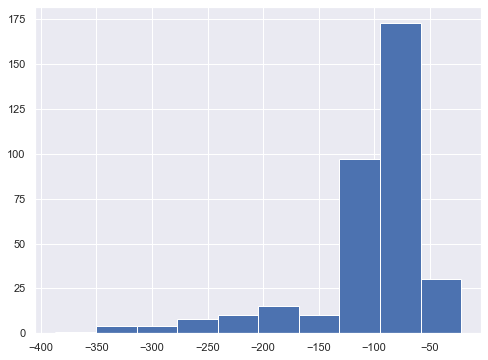

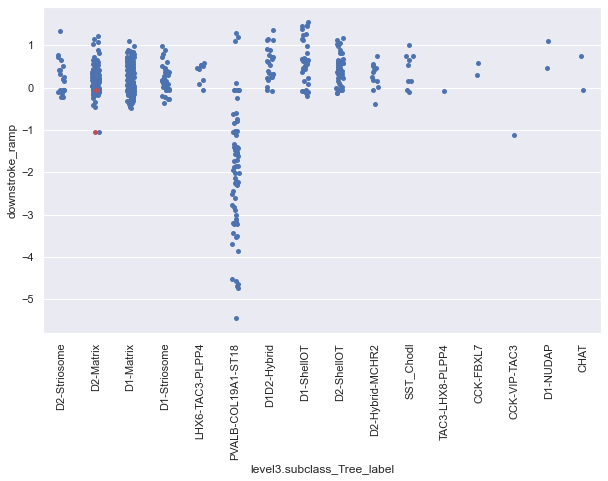

In [23]:
# See features after transforming and normalizing
#feat = 'width_rheo'
feat = 'downstroke_ramp'
#feat = 'avg_rate_rheo'
#feat = 'sag_tau'
#feat = 'downstroke_rheo'

#df_std = pd.DataFrame(df_ephys_trans.iloc[:,267:359], columns = df3_filt_sub.columns[267:359])
df_std = pd.DataFrame(X_std, columns = df3_filt_sub.columns[597:691])
print(df_std)
df_std['level3.subclass_Tree_label'] = df3_filt_sub['level3.subclass_Tree_label']

#(n, bins, patches) = plt.hist(df_ephys_sub[feat][df_ephys_sub[feat]<0.1], bins = 50)   # Needs log transform
#min_nonzero = np.nanmin(df_ephys_sub[feat][df_ephys_sub[feat]!=0]) 
#feat_vals = np.log(df_ephys_sub[feat]+min_nonzero) 
#plt.hist(feat_vals)
fig,ax = plt.subplots(figsize=(8, 6))
plt.hist(df_ephys_sub_no_outliers[feat])

fig,ax = plt.subplots(figsize=(10, 6))
sns.stripplot(data=df_std, x='level3.subclass_Tree_label', y=feat, ax=ax)
plt.xticks(rotation = 90)
feat_ind = int(np.nonzero(df_ephys_sub.columns==feat)[0])

sns.stripplot(data=df_std.iloc[list(feat_outliers[feat_ind])], x='level3.subclass_Tree_label', y=feat, ax=ax, color='r')
#plt.yscale("log")
#plt.xlim([-1,15])
# Because they were set to Nan, they got imputed

In [57]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

feature_cols = comp_names
print(feature_cols)

#X_transformed = X_std @ df_spca.values
#X = X_transformed
X = X_std
#X = np.array(X_suff)
#y = np.array(y_suff)
y = y_orig

n_splits = 5
kf =KFold(n_splits=n_splits, shuffle=True, random_state=1)

max_depth_list = [2,3,4,5,6,7,8,9,10,15,20]
perc_corr_test_md = []
perc_corr_train_md = []

for md in max_depth_list:
    perc_corr_test = []
    perc_corr_train = []

    for train_index, test_index in kf.split(X, y):
        # Create classifer object
        clf2 = DecisionTreeClassifier(max_depth=md)

        # Train classifer
        clf2 = clf2.fit(X[train_index],y[train_index])

        #Predict the response for test dataset
        y_pred = clf2.predict(X[test_index])
        y_pred_train = clf2.predict(X[train_index])

        perc_corr_test.append(sum(y_pred==y[test_index])/len(y[test_index]))
        perc_corr_train.append(sum(y_pred_train == y[train_index])/len(y[train_index]))

    print("Test", np.mean(perc_corr_test))
    print("Train", np.mean(perc_corr_train))
    perc_corr_test_md.append(np.mean(perc_corr_test))
    perc_corr_train_md.append(np.mean(perc_corr_train))

plt.plot(max_depth_list, perc_corr_test_md)
plt.plot(max_depth_list, perc_corr_train_md)
plt.xlabel("Max depth")
plt.ylabel("Percent Accuracy")
plt.legend(["Test", "Train"])
plt.show()
print("Best:", max_depth_list[np.argmax(perc_corr_test_md)])

clf2 = DecisionTreeClassifier()
clf2 = clf2.fit(X,y)
y_pred = clf2.predict(X)
f1 = f1_score(y, y_pred, average=None)
df_f1 = pd.DataFrame(clf2.classes_,f1)
df_f1

NameError: name 'comp_names' is not defined

In [24]:
# Sparse principal component analysis

feat_names = df_ephys_sub.columns[:92]
#print(feat_names)
X_std_df = pd.DataFrame(X_std)
X_std_df.columns = df_ephys_sub.columns[:92]

#In R: para=rep(300, ncomp)   --> 22 components

# Sparse PCA in R
X_std_df.to_feather('X_std_BG.feather')
# Process then in R elasticnet implementation

# Consider using a PEV threshold?


In [25]:
df_spca = pd.read_feather('spca_comps.feather')
sums = df_spca.abs().sum(axis=0)

df_spca = df_spca.drop(df_spca.columns[sums==0],axis = 1)

In [26]:
print(feat_names[np.nonzero(df_spca.iloc[:,0].values)])
comp_names = ['downstroke-width']

Index(['downstroke_ramp', 'width_suprathresh_ramp', 'width_short_square',
       'downstroke_short_square', 'width_suprathresh_short_square',
       'width_rheo', 'downstroke_rheo', 'width_hero',
       'width_suprathresh_hero'],
      dtype='object')


In [27]:
print(feat_names[np.nonzero(df_spca.iloc[:,1].values)])
comp_names.append('upstroke-peak')

Index(['upstroke_downstroke_ratio_ramp', 'peak_deltav_ramp',
       'upstroke_downstroke_ratio_short_square', 'upstroke_short_square',
       'peak_deltav_short_square', 'upstroke_downstroke_ratio_rheo',
       'peak_v_rheo', 'upstroke_rheo', 'upstroke_downstroke_ratio_hero',
       'peak_v_hero', 'upstroke_hero', 'peak_deltav_rheo', 'peak_deltav_hero',
       'phase_peak_chirp'],
      dtype='object')


In [28]:
print(feat_names[np.nonzero(df_spca.iloc[:,2].values)])
comp_names.append('chirp')

Index(['peak_freq_chirp', '3db_freq_chirp', 'peak_impedance_chirp',
       'sync_freq_chirp'],
      dtype='object')


In [29]:
print(feat_names[np.nonzero(df_spca.iloc[:,3].values)])
comp_names.append('fast_trough')

Index(['fast_trough_deltav_ramp', 'fast_trough_deltav_rheo',
       'fast_trough_deltav_hero'],
      dtype='object')


In [30]:
print(feat_names[np.nonzero(df_spca.iloc[:,4].values)])
comp_names.append('threshold-trough')

Index(['threshold_v_ramp', 'trough_v_ramp', 'threshold_v_short_square',
       'threshold_v_rheo', 'trough_v_rheo', 'fast_trough_v_rheo',
       'fast_trough_v_last_rheo', 'adp_v_last_rheo', 'threshold_v_hero',
       'trough_v_hero', 'fast_trough_v_hero'],
      dtype='object')


In [31]:
print(feat_names[np.nonzero(df_spca.iloc[:,5].values)])
comp_names.append('isi_cv')

Index(['isi_cv_mean'], dtype='object')


In [32]:
print(feat_names[np.nonzero(df_spca.iloc[:,6].values)])
comp_names.append('trough_slowdeltav')

Index(['trough_slowdeltav_rheo', 'trough_slowdeltav_hero'], dtype='object')


In [33]:
print(feat_names[np.nonzero(df_spca.iloc[:,7].values)])
comp_names.append('isi_hero')

Index(['mean_isi_hero', 'median_isi_hero'], dtype='object')


In [34]:
print(feat_names[np.nonzero(df_spca.iloc[:,8].values)])
comp_names.append('peak_v_adapt_ratio')

Index(['upstroke_adapt_ratio', 'peak_v_adapt_ratio'], dtype='object')


In [35]:
print(feat_names[np.nonzero(df_spca.iloc[:,9].values)])
comp_names.append('rheobase_Rin')

Index(['threshold_i_ramp', 'rheobase_i', 'input_resistance_ss',
       'low_freq_impedance_chirp'],
      dtype='object')


In [36]:
print(feat_names[np.nonzero(df_spca.iloc[:,10].values)])
comp_names.append('postap_slope')

Index(['postap_slope_ramp', 'postap_slope_rheo', 'postap_slope_hero'], dtype='object')


In [37]:
print(feat_names[np.nonzero(df_spca.iloc[:,11].values)])
comp_names.append('isi_rheo')

Index(['sag_area'], dtype='object')


In [38]:
print(feat_names[np.nonzero(df_spca.iloc[:,12].values)])
comp_names.append('vm_for_sag')

Index(['v_baseline', 'vm_for_sag'], dtype='object')


In [39]:
print(feat_names[np.nonzero(df_spca.iloc[:,13].values)])
comp_names.append('latency')

Index(['latency_rheo', 'latency_hero'], dtype='object')


In [40]:
print(feat_names[np.nonzero(df_spca.iloc[:,14].values)])
comp_names.append('sag_tau')

Index(['sag_tau_depol'], dtype='object')


In [41]:
print(feat_names[np.nonzero(df_spca.iloc[:,15].values)])
comp_names.append('avg_rate_rheo')

Index(['avg_rate_rheo'], dtype='object')


In [42]:
print(feat_names[np.nonzero(df_spca.iloc[:,16].values)])
comp_names.append('phase_low_chirp')

Index(['phase_low_chirp'], dtype='object')


In [43]:
print(feat_names[np.nonzero(df_spca.iloc[:,17].values)])
comp_names.append('sag_depol')

Index(['sag_depol', 'sag_area_depol'], dtype='object')


In [44]:
print(feat_names[np.nonzero(df_spca.iloc[:,18].values)])
comp_names.append('sag')

Index(['sag'], dtype='object')


In [45]:
print(feat_names[np.nonzero(df_spca.iloc[:,19].values)])
comp_names.append('sag_tau')

Index(['sag_tau'], dtype='object')


In [46]:
print(feat_names[np.nonzero(df_spca.iloc[:,20].values)])
comp_names.append('fi_rates')

Index(['fi_fit_slope', 'avg_rate_hero', 'avg_rate_max'], dtype='object')


In [47]:
print(feat_names[np.nonzero(df_spca.iloc[:,21].values)])
comp_names.append('Rin')

Index(['input_resistance'], dtype='object')


In [71]:
print(feat_names[np.nonzero(df_spca.iloc[:,22].values)])
#comp_names.append('sag_depol')

IndexError: single positional indexer is out-of-bounds

In [72]:
print(feat_names[np.nonzero(df_spca.iloc[:,23].values)])
#comp_names.append('sag_depol')

IndexError: single positional indexer is out-of-bounds

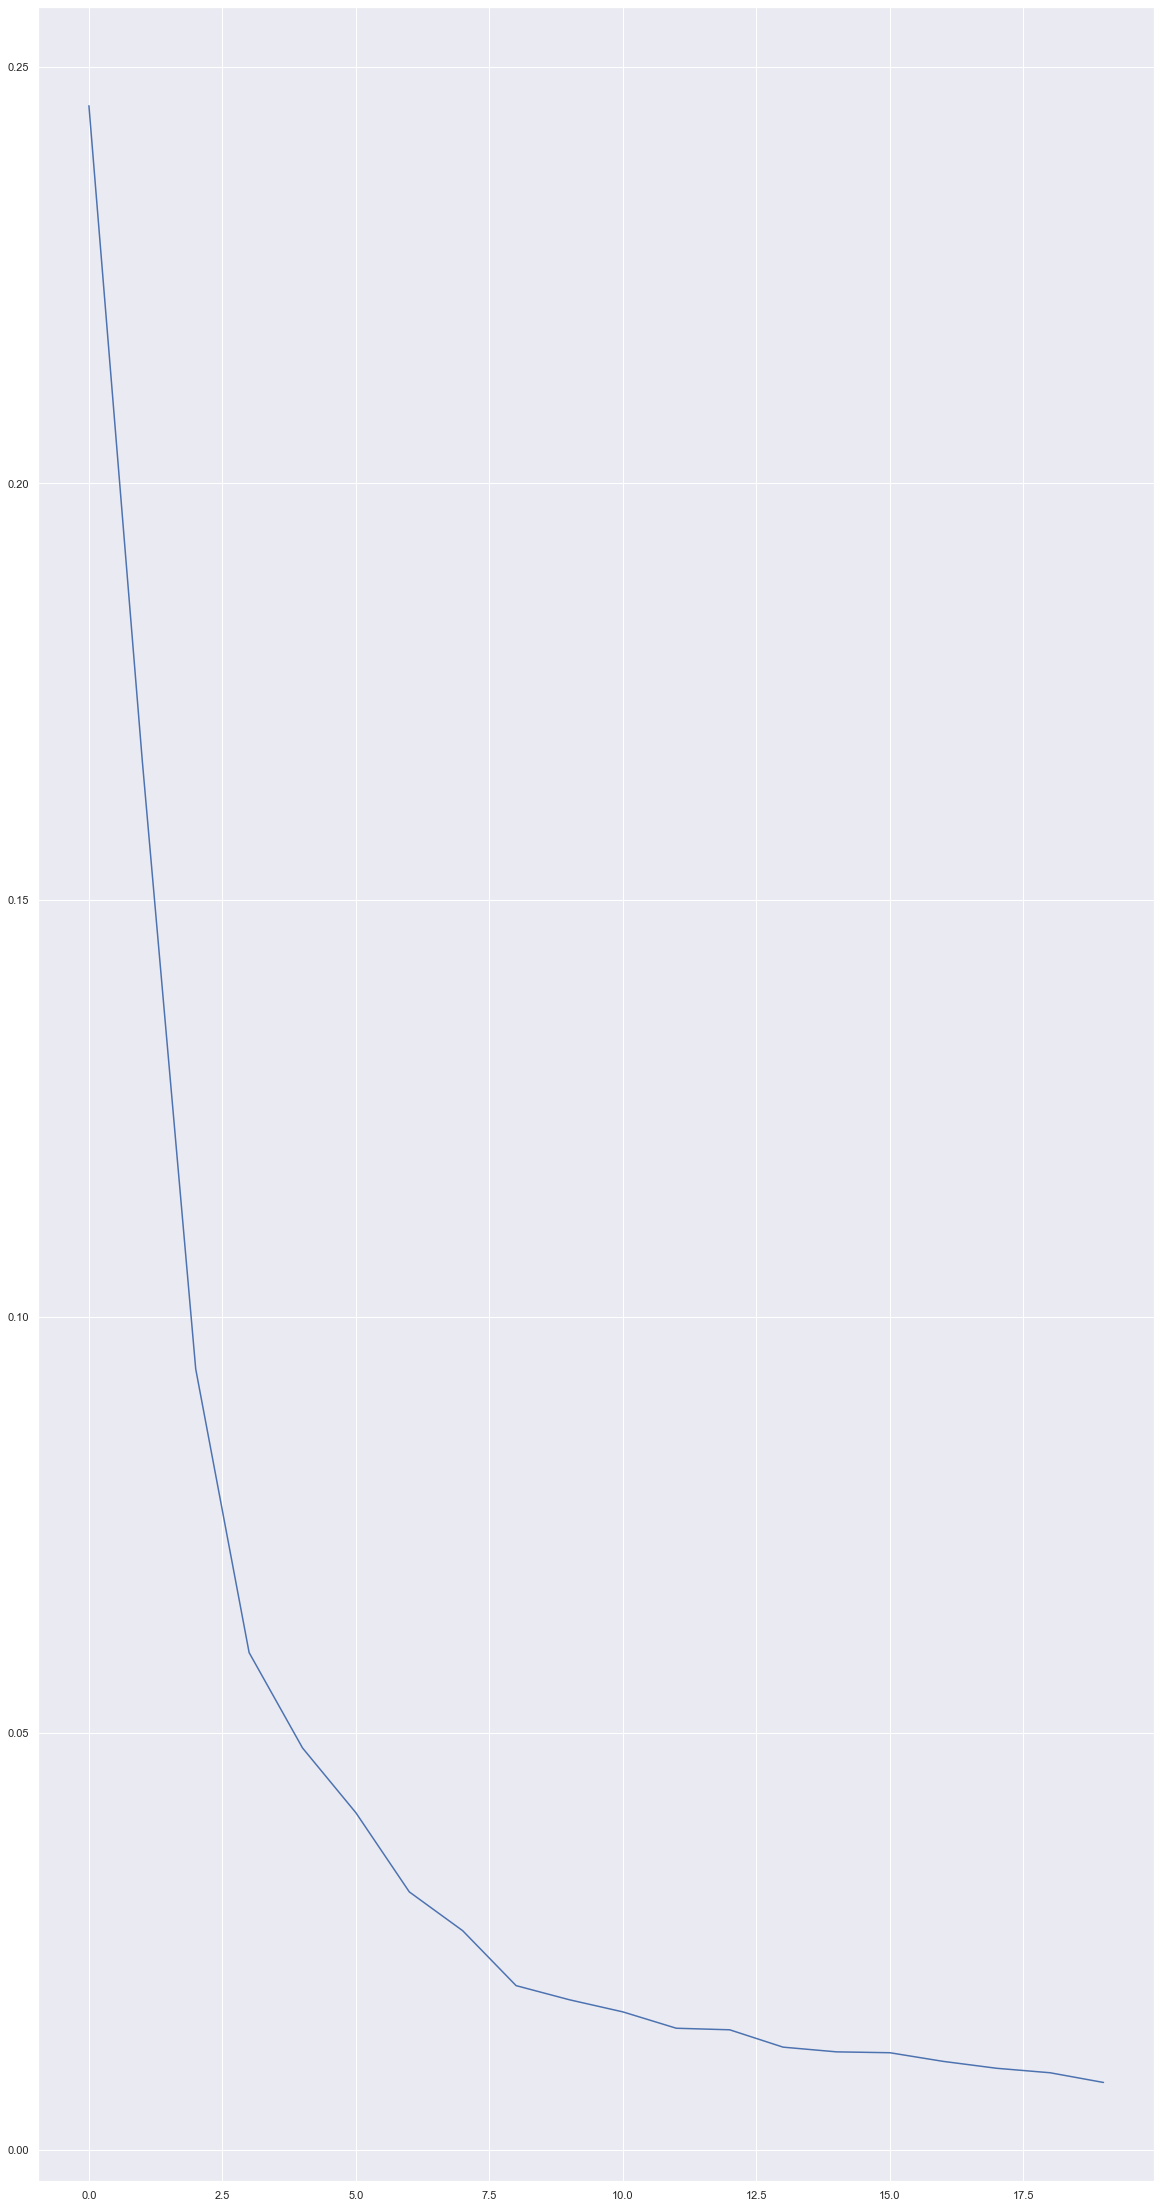

In [66]:
# Plain PCA with its own imputation?
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
pca.fit(X_std)
X_pca = pca.transform(X_std)
plt.plot(pca.explained_variance_ratio_)


In [40]:
# Remove subclasses with less than 5 cells - causes problems for crossvalidation scores further down and noisy
# Currently removes 'CCK-FBXL7', 'D1-NUDAP', 'CHAT', 'TAC3-LHX8-PLPP4', 'CCK-VIP-TAC3'

cts = y_orig.value_counts()
insuff_subclasses = cts.index[cts<5]
notinsuff_inds = [s not in insuff_subclasses for s in y_orig]
y_suff = y_orig[notinsuff_inds]
#X_suff = X_pca[notinsuff_inds,:]
X_suff = X_std[notinsuff_inds,:]
y_suff = y_suff.reset_index(drop=True)

print(insuff_subclasses)

Index(['D1-NUDAP', 'TAC3-LHX8-PLPP4', 'CCK-VIP-TAC3', 'CCK-FBXL7'], dtype='object')


Perc_correct 0.6749521988527725
0.4767529183895717
0.003
C with best perc_corr_test: 0.003


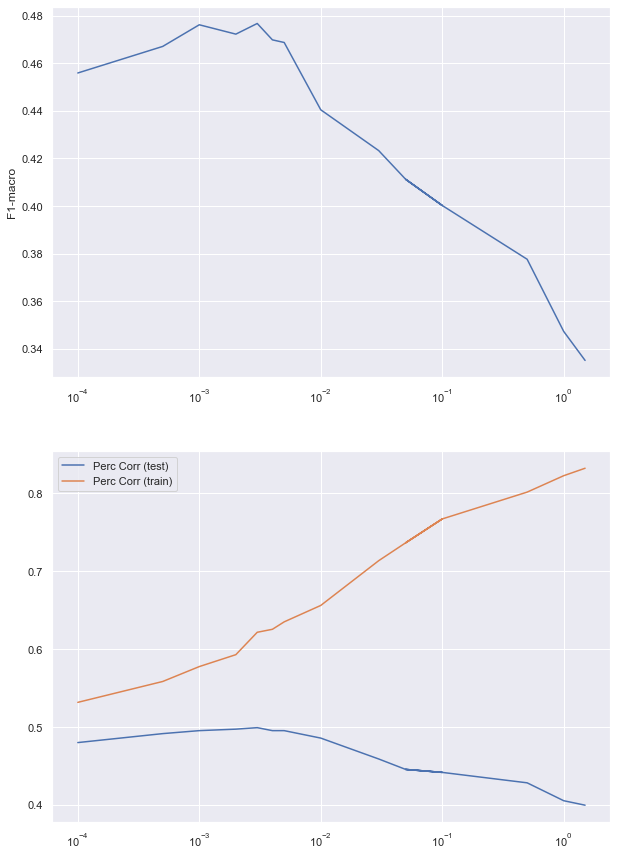

In [70]:
# Crossvalidation on common types and confusion matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

kf =KFold(n_splits=2, shuffle=True, random_state=1)

X_transformed = X_std @ df_spca.values

#X = X_transformed    
#X = X_std
#y = y_orig
X = X_suff
y = y_suff

#C_list = [5.0, 3.0, 1.0, 0.8, 0.5, 0.1, 0.09, 0.08, 0.07, 0.05]
C_list = [1.5, 1.0, 0.5, 0.1, 0.05, 0.1, 0.05, 0.03, 0.01, 0.005, 0.004, 0.003, 0.002, 0.001, 0.0005, 0.0001]
perc_corr_all = []
perc_corr_all_train = []
f1_all = []
roc_auc_ovr = []

# Worse performance than using original features
clf_lr = LogisticRegression(solver="lbfgs", multi_class='ovr', penalty = "l2", class_weight = 'balanced', max_iter=100000, C=1).fit(X, y)
y_pred = clf_lr.predict(X)
print("Perc_correct", sum(y_pred==y)/len(y))
# 0.53 with X_transformed
# 0.696 with X_std - why was it 0.69 last time?

for c in C_list:
    perc_corr = []
    perc_corr_train = []
    f1_list = []
    roc_list = []
    for train_index, test_index in kf.split(X, y):
        #clf_lr = LogisticRegression(solver="saga", multi_class='ovr', penalty = "elasticnet", l1_ratio = 0.5, max_iter=100000, C=c, class_weight = 'balanced').fit(X[train_index], y[train_index])
        #clf_lr = LogisticRegression(solver="liblinear", multi_class='ovr', penalty = "l2", max_iter=100000, C=c, class_weight = 'balanced').fit(X[train_index], y[train_index])
        #clf_lr = LogisticRegression(solver="lbfgs", multi_class='multinomial', penalty = "l2", max_iter=100000, C=c, class_weight = 'balanced').fit(X[train_index], y[train_index])
        clf_lr = LogisticRegression(solver="lbfgs", multi_class='ovr', penalty = "l2", class_weight = 'balanced', max_iter=100000, C=c).fit(X[train_index], y[train_index])
        #Predict the response for test dataset
        y_pred = clf_lr.predict(X[test_index])
        f1 = f1_score(y[test_index], y_pred, average="macro")
        perc_corr.append(sum(y_pred==y[test_index])/len(y[test_index]))
        y_pred_train = clf_lr.predict(X[train_index])
        perc_corr_train.append(sum(y_pred_train==y[train_index])/len(y[train_index]))
        f1_list.append(f1)
        #roc = roc_auc_score(y[test_index], clf_lr.predict_proba(X[test_index]), average="macro", multi_class = 'ovr')
        #roc_list.append(roc)
    #print('Perc_corr:', np.mean(perc_corr))
    #print('Perc_corr_train:', perc_corr_train)
    #print(np.mean(f1_list))
    #print(np.mean(roc_list))
    perc_corr_all.append(np.mean(perc_corr))
    perc_corr_all_train.append(np.mean(perc_corr_train))
    f1_all.append(np.mean(f1_list))
    #roc_auc_ovr.append(np.mean(roc_list))

fig, ax = plt.subplots(2,1, figsize=(10, 15))
    
ax[0].plot(C_list, f1_all)
ax[0].set_ylabel('F1-macro')
ax[0].set_xscale("log")

#plt.figure()
#plt.plot(C_list, roc_auc_ovr)
#plt.ylabel('ROC_AUC_OVR')

ax[1].plot(C_list, perc_corr_all, label = 'Perc Corr (test)')
#ax[1].set_ylabel('Perc Correct (test)')

ax[1].plot(C_list, perc_corr_all_train, label = 'Perc Corr (train)')
#ax[1].set_ylabel('Perc Correct (train)')
plt.legend()
plt.xscale("log")
#plt.show()
#ax[1].legend([line1, line2], ['Perc Corr (test)', 'Perc Corr (train)'])
#ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])
#ax[1].legend(['Perc Corr (test)', 'Perc Corr (train)'])

print(max(f1_all))
print(C_list[np.argmax(f1_all)])
C_opt = C_list[np.argmax(f1_all)]
print("C with best perc_corr_test:", C_list[np.argmax(perc_corr_all)])

# Still a hair better than PCA

In [105]:
# Using best C, generate confusion matrix
# Prepend letters because sklearn sorts classes alphabetically
sorted_prefix = [chr(ord('@')+num+1) for num in  range(len(sorted_classes))]
print(sorted_prefix)

#X = X_transformed    
#X = X_std
#y = y_orig
X = X_suff
y = y_suff

y_pref = [sorted_prefix[sorted_classes.index(yy)] for yy in y] + y
y = y_pref

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
clf_lr = LogisticRegression(solver="lbfgs", multi_class='ovr', penalty = "l2", class_weight = 'balanced', max_iter=100000, C=C_opt).fit(X_train, y_train)
y_pred = clf_lr.predict(X_test)

labels_cropped = [s[1:] for s in clf_lr.classes_]   # Remove prefix

print(sum(y_pred==y_test)/len(y_pred))

fig, ax = plt.subplots(1,2, figsize=(15, 10))
ax[0].set_title('Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels_cropped, ax = ax[0], colorbar=False)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)
ax[0].grid(False)
# Adding custom colorbar - default one is too tall and makes plot small
cax = fig.add_axes([ax[0].get_position().x1+0.01,ax[0].get_position().y0,0.02,ax[0].get_position().height])
plt.colorbar(cmp.im_,  cax=cax)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)

ax[1].set_title('Normalized Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels_cropped, ax = ax[1], normalize='true',colorbar=False)
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)
cax = fig.add_axes([ax[1].get_position().x1+0.01,ax[1].get_position().y0,0.02,ax[1].get_position().height])
plt.colorbar(cmp.im_,  cax=cax)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)
ax[1].grid(False)
ax[1].get_yaxis().set_visible(False)

# D2-Hybrid-MCHR2 not working at all

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P']


NameError: name 'C_opt' is not defined

In [71]:
# Try logitboost

from logitboost import LogitBoost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

test_size = 1/3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, stratify=y, random_state=0)

lboost = LogitBoost(n_estimators=200, random_state=0)
lboost.fit(X_train, y_train)

y_pred_train = lboost.predict(X_train)
y_pred_test = lboost.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print('Training accuracy: %.4f' % accuracy_train)
print('Test accuracy:     %.4f' % accuracy_test)

report_train = classification_report(y_train, y_pred_train)
report_test = classification_report(y_test, y_pred_test)
print('Training\n%s' % report_train)
print('Test\n%s' % report_test)


# Actually has lower f1-macro

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `base_estimator_` was deprecated in version 1.2 and will be removed in 1.4. Use `estimator_` instead.
  warnings.warn(msg, category=FutureWarning)


Training accuracy: 0.9540
Test accuracy:     0.4686
Training
                    precision    recall  f1-score   support

         D1-Matrix       0.99      0.96      0.97       101
        D1-ShellOT       1.00      1.00      1.00        24
      D1-Striosome       1.00      0.95      0.98        22
       D1D2-Hybrid       1.00      0.94      0.97        16
   D2-Hybrid-MCHR2       1.00      1.00      1.00         8
         D2-Matrix       0.83      0.99      0.90        74
        D2-ShellOT       1.00      0.96      0.98        28
      D2-Striosome       1.00      0.80      0.89        15
   LHX6-TAC3-PLPP4       1.00      0.83      0.91         6
PVALB-COL19A1-ST18       1.00      0.94      0.97        48
         SST_Chodl       1.00      0.83      0.91         6

          accuracy                           0.95       348
         macro avg       0.98      0.93      0.95       348
      weighted avg       0.96      0.95      0.95       348

Test
                    precision  

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [ ]:
# Try random forest



In [ ]:
# nclasses x nfeatures
df_I = pd.DataFrame(clf_lr.coef_, columns=df_ephys_sub.columns[:92], index = clf_lr.classes_)

df_I

for cl in clf_lr.classes_:
    featsigns = df_I.loc[cl]
    featsigns[abs(featsigns)<0.7] = np.nan    # Threshold was 0.1
    featsigns.dropna(inplace=True)
    print(f"{cl}:{featsigns.round(decimals=2)}")
    
    
    # NEED ALSO PVALS
    

In [97]:
import umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(X_std)

sorted_id = range(len(sorted_classes))
sc_dict = dict(zip(sorted_classes, sorted_id))

scatter = plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    #c=[sns.color_palette()[sc_dict[yy]] for yy in y]
    c = df_ephys_trans['level3.subclass_Corr_color'])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection', fontsize=24)
plt.legend()



OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


KeyError: 'level3.subclass_Corr_color'

TypeError: cannot perform reduce with flexible type

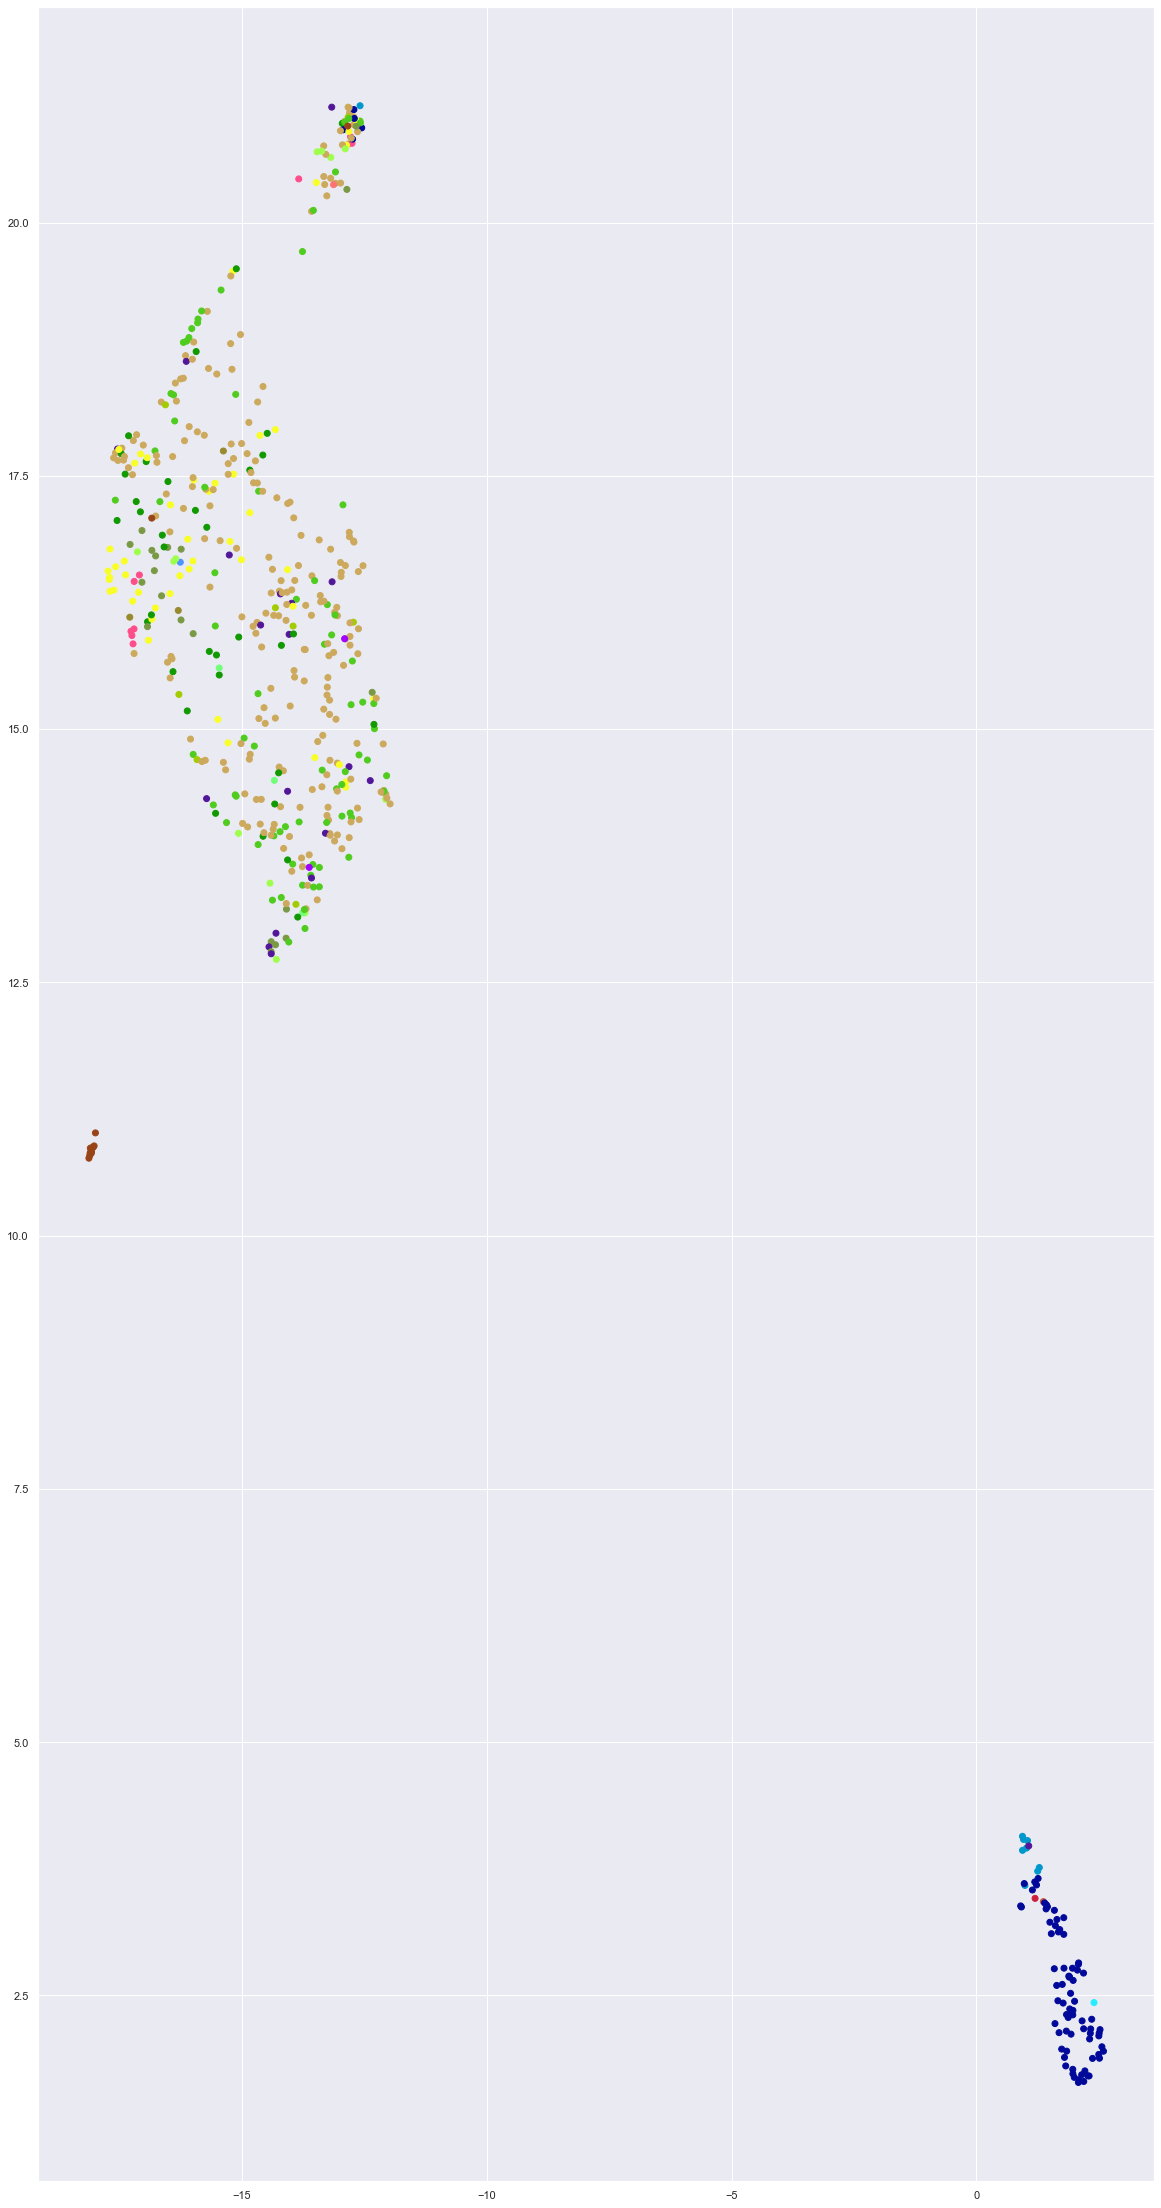

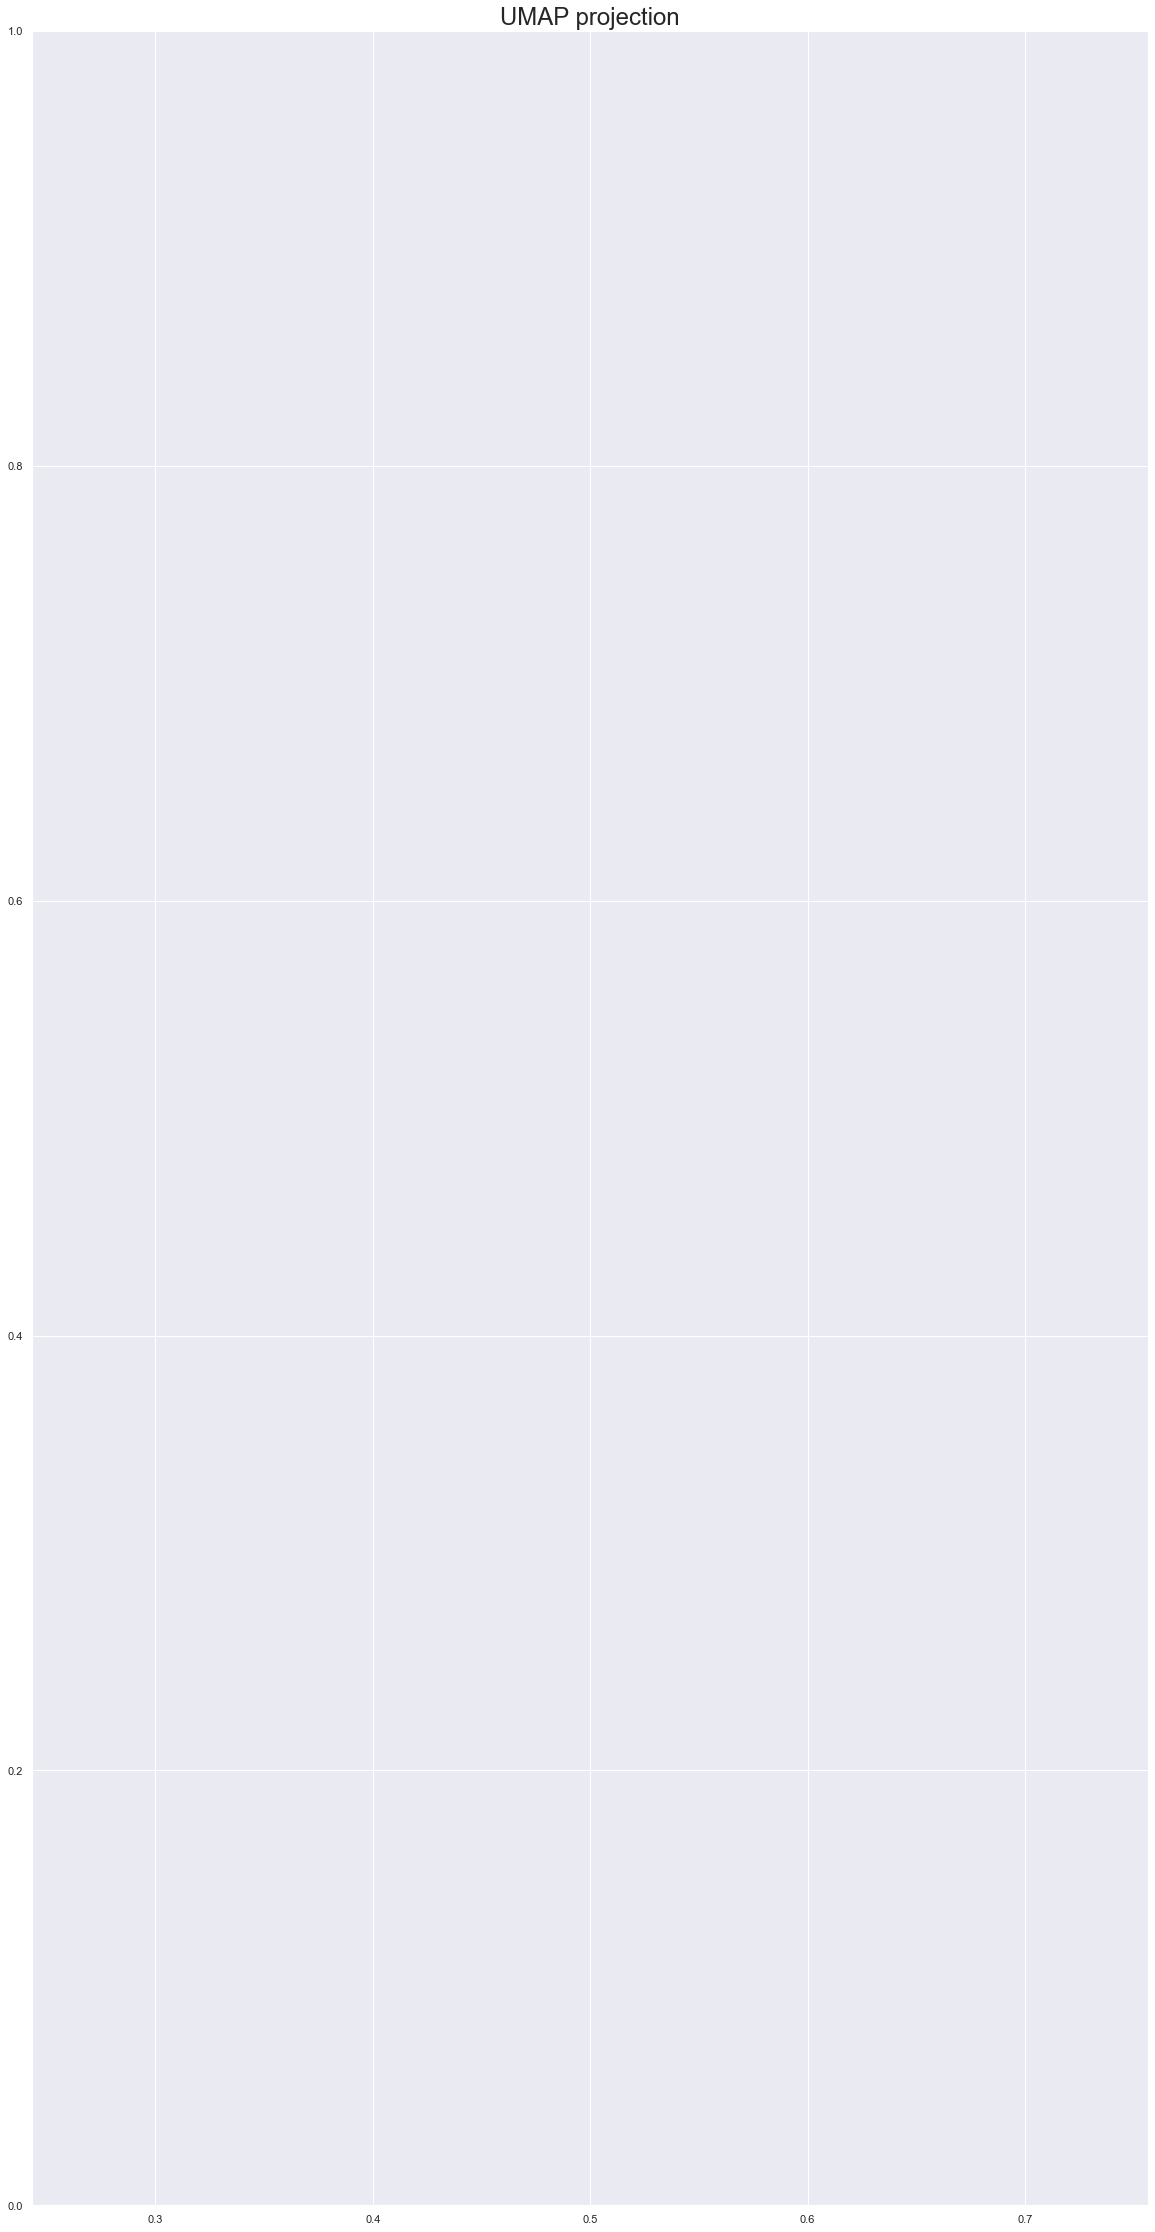

In [122]:
sc = plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    #c=[sns.color_palette()[sc_dict[yy]] for yy in y]
    c = df_ephys_trans['level3.subclass_Tree_color'])
fig, ax = plt.subplots()
ax.set_aspect('equal', 'datalim')
ax.set_title('UMAP projection', fontsize=24)
#plt.legend()

lp = lambda i: plt.plot([],color=sc.cmap(sc.norm(i)), ms=np.sqrt(size), mec="none",
                        label="Feature {:g}".format(i), ls="", marker="o")[0]
handles = [lp(i) for i in df_ephys_trans['level3.subclass_Tree_color']]
plt.legend(handles=handles)



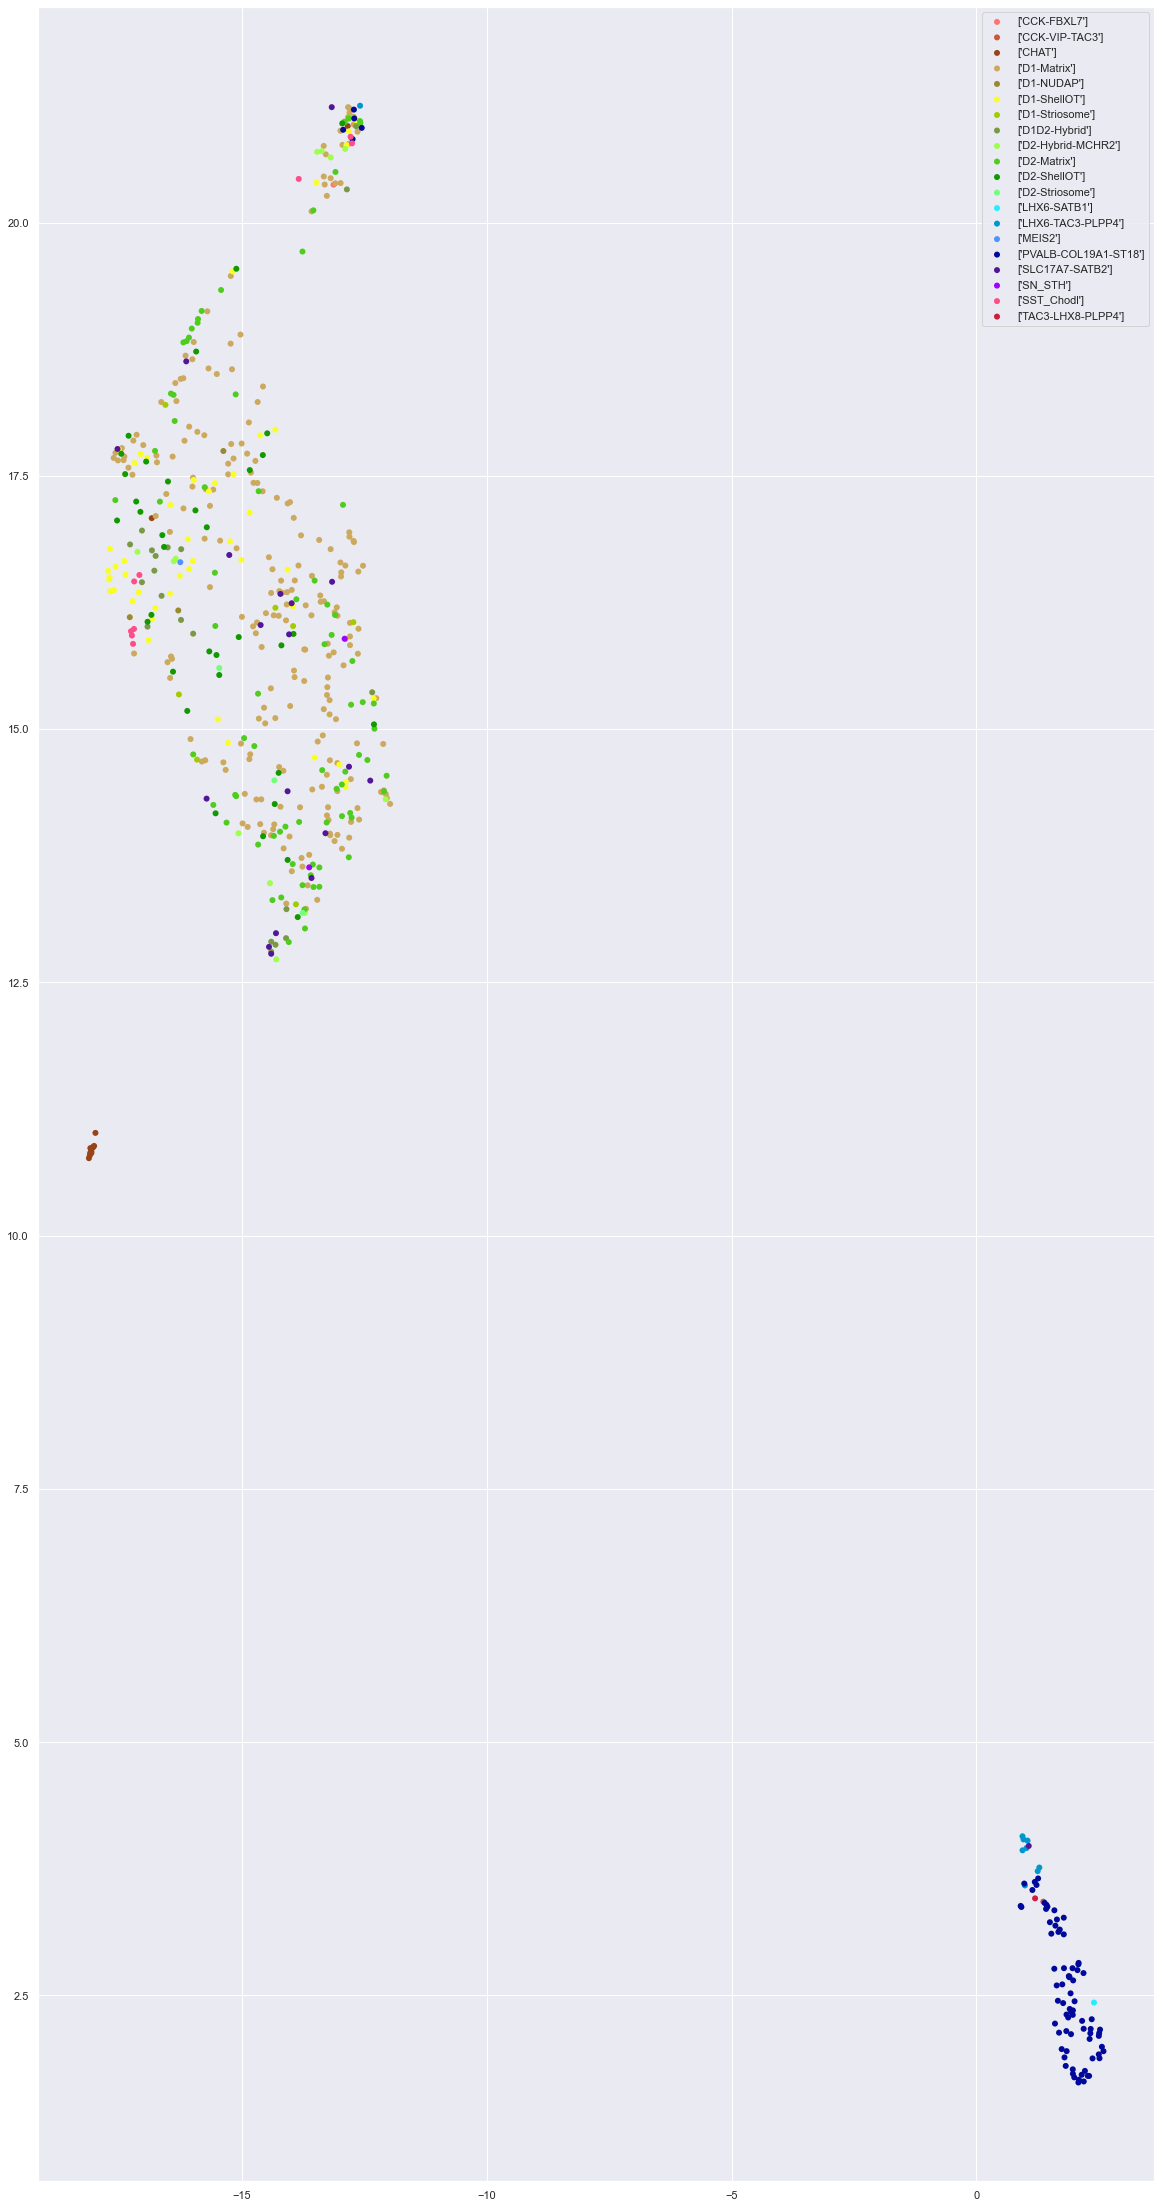

In [123]:
df = pd.DataFrame(df_ephys_trans['level3.subclass_Tree_color'])
df['level3.subclass_Tree_label'] = df_ephys_trans['level3.subclass_Tree_label']
df['UMAP1'] = embedding[:, 0]
df['UMAP2'] = embedding[:, 1]

for i, dff in df.groupby("level3.subclass_Tree_label"):
    plt.scatter(dff['UMAP1'], dff['UMAP2'], c=np.unique(dff['level3.subclass_Tree_color']), 
                edgecolors='none', label=np.unique(dff['level3.subclass_Tree_label']))

plt.legend()

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_38543/715937850.py:49: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(dff['UMAP1'], dff['UMAP2'], c=np.unique(dff['Subclass_Corr_color']),


[]

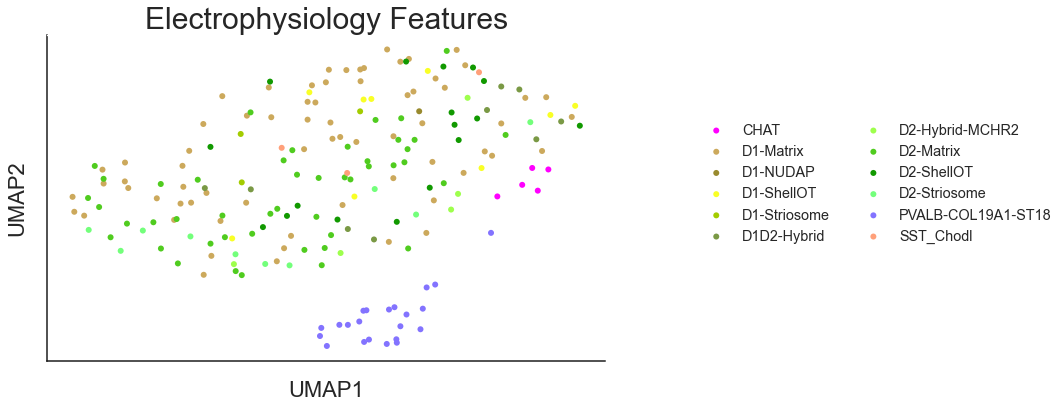

In [41]:
# Without chirp features, with imputation only if no more than 20 features are missing - else you get rainbow junky cell cluster from over imputation

# Modify confusing colors

import umap

#df_ephys_trans_orig = df_ephys_trans

df_ephys_trans.loc[df_ephys_trans['Subclass_Corr_label']=='CHAT','Subclass_Corr_color'] = '#FF00FF'
#df_ephys_trans.loc[df_ephys_trans['level3.subclass_Corr_label']=='CHAT','level3.subclass_Corr_color'] = 'r'

df_ephys_trans.loc[df_ephys_trans['Subclass_Corr_label']=='TAC3-LHX8-PLPP4','Subclass_Corr_color'] = '#297389'

df_ephys_trans.loc[df_ephys_trans['Subclass_Corr_label']=='CCK-FBXL7','Subclass_Corr_color'] = 'teal'
df_ephys_trans.loc[df_ephys_trans['Subclass_Corr_label']=='SST_Chodl','Subclass_Corr_color'] = 'lightsalmon'

X_no_chirp = df_ephys_trans.iloc[:,feat_start_ind:feat_end_nochirp_ind] 
df_ephys_trans = df_ephys_trans.iloc[np.array(np.sum(X_no_chirp.isna(), axis=1)<20), :]
X_no_chirp = X_no_chirp.iloc[np.array(np.sum(X_no_chirp.isna(), axis=1)<20), :]

imputer = KNNImputer(missing_values=np.nan)
X_imputed = imputer.fit_transform(X_no_chirp)  

scaler = StandardScaler().fit(X_imputed)
#scaler = StandardScaler().fit(X_no_chirp)
X_std = scaler.transform(X_imputed)

reducer = umap.UMAP(
        n_neighbors= 120,   # Default 15, 120 is looking good
        min_dist=0.35,  # Default 0.1, 0.4 is looking good
        #n_components=n_components,
        metric='manhattan',
        random_state = 42
    )
#embedding = reducer.fit_transform(X_std, force_all_finite=False)
embedding = reducer.fit_transform(X_std)

sorted_id = range(len(sorted_classes))
sc_dict = dict(zip(sorted_classes, sorted_id))

df = pd.DataFrame(df_ephys_trans['Subclass_Corr_color'])
df['Subclass_Corr_label'] = df_ephys_trans['Subclass_Corr_label']
df['UMAP1'] = embedding[:, 0]
df['UMAP2'] = embedding[:, 1]

fig, ax = plt.subplots(figsize=(10, 6))

for i, dff in df.groupby("Subclass_Corr_label"):
    ax.scatter(dff['UMAP1'], dff['UMAP2'], c=np.unique(dff['Subclass_Corr_color']), 
                edgecolors='none', label=np.unique(dff['Subclass_Corr_label'])[0], vmin=0, vmax=100)
ax.set_xlabel('UMAP1', fontsize = 22, labelpad=20)
ax.set_ylabel('UMAP2', fontsize = 22, labelpad =20)
ax.set_title('Electrophysiology Features', fontsize = 30)
plt.legend(ncol =2, fancybox=False, loc='lower left', bbox_to_anchor=(1.15,0.32), fontsize='large', frameon=False)
ax.set_facecolor('white')
ax.spines['left'].set(linewidth=1.5, color='k')
ax.spines['bottom'].set(linewidth=1.5, color='k')
ax.tick_params(axis='both', which='major', labelsize=22)
ax.set_xticks([])
ax.set_yticks([])

(array([140., 332.,  51.,  30.,   5.,   0.,   0.,   1.,   6.,  32.]),
 array([ 1. ,  9.4, 17.8, 26.2, 34.6, 43. , 51.4, 59.8, 68.2, 76.6, 85. ]),
 <BarContainer object of 10 artists>)

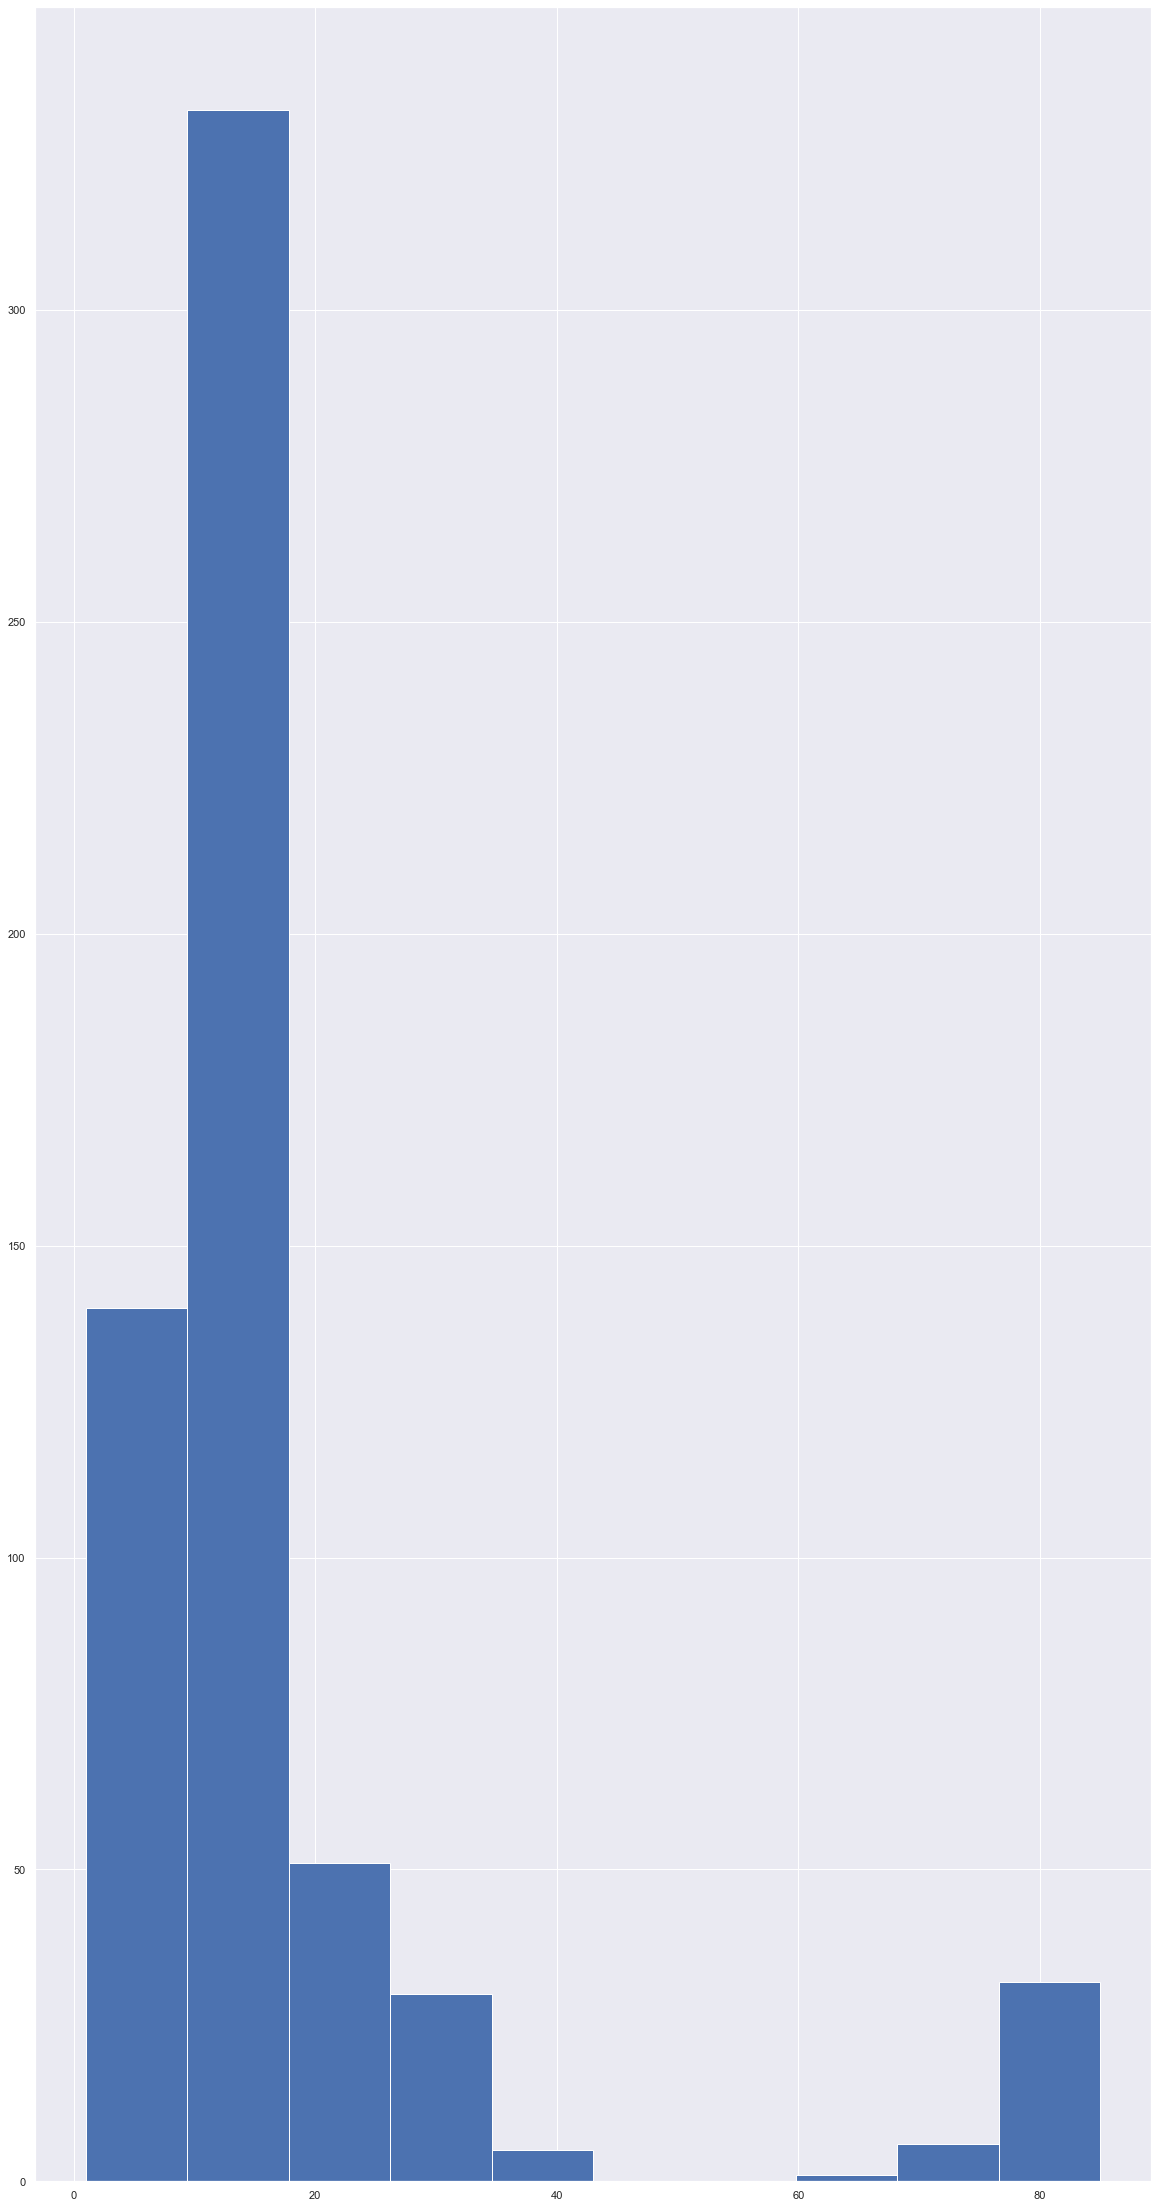

In [102]:
plt.hist(np.sum(X_no_chirp.isna(), axis=1))

/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_4770/2885443184.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(dff['UMAP1'], dff['UMAP2'],


[]

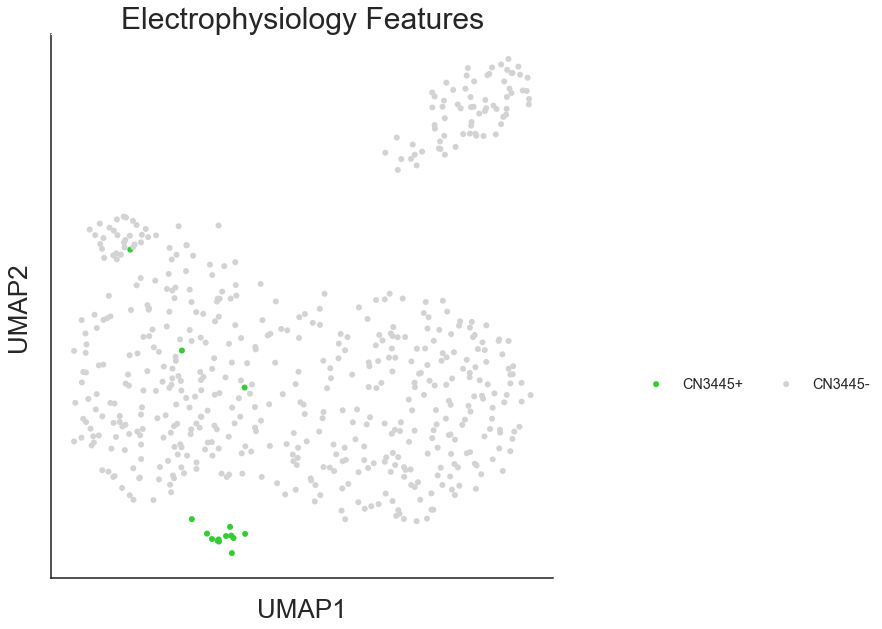

In [109]:
fig, ax = plt.subplots(figsize=(9, 10))

df = pd.DataFrame(df_ephys_trans['CN3445'])
df['CN3445'] = df_ephys_trans['CN3445']
df['UMAP1'] = embedding[:, 0]
df['UMAP2'] = embedding[:, 1]

dict = {'CN3445+': 'limegreen', 'CN3445-': 'lightgray'}
df['CN3445_color'] = [dict[col] for col in df['CN3445']]

for i, dff in df.groupby("CN3445"):
    ax.scatter(dff['UMAP1'], dff['UMAP2'], 
                edgecolors='none', c = np.unique(dff['CN3445_color']), label=np.unique(dff['CN3445'])[0], vmin=0, vmax=100)

ax.set_xlabel('UMAP1', fontsize = 26, labelpad=20)
ax.set_ylabel('UMAP2', fontsize = 26, labelpad =20)
ax.set_title('Electrophysiology Features', fontsize = 30)
plt.legend(ncol =2, fancybox=False, loc='lower left', bbox_to_anchor=(1.15,0.32), fontsize='large', frameon=False)
ax.set_facecolor('white')
ax.spines['left'].set(linewidth=1.5, color='k')
ax.spines['bottom'].set(linewidth=1.5, color='k')
ax.tick_params(axis='both', which='major', labelsize=22)
ax.set_xticks([])
ax.set_yticks([])

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_75435/2288892352.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(dff['UMAP1'], dff['UMAP2'], c=np.unique(dff['Subclass_Corr_color']),


[]

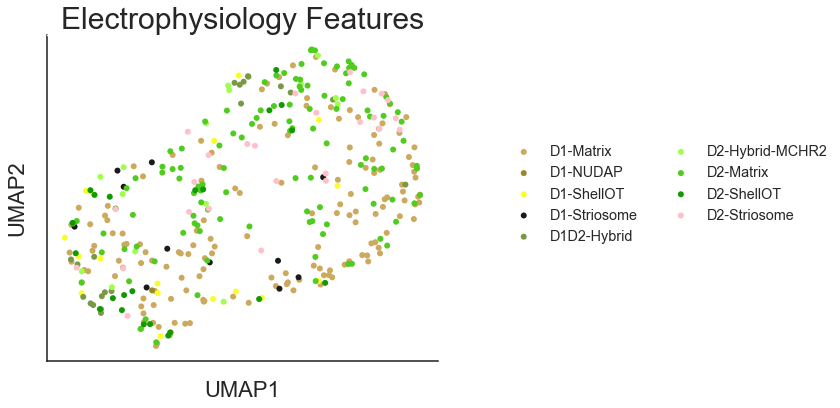

In [88]:
# MSNs only, with PCA first

df_ephys_MSN = df_ephys_trans.iloc[np.array(df_ephys_trans.Class_Corr_label) =='MSN',:]

df_ephys_MSN.loc[df_ephys_MSN['Subclass_Corr_label']=='','Subclass_Corr_color'] = '#FF00FF'

df_ephys_MSN.loc[df_ephys_MSN['Subclass_Corr_label']=='D1-Striosome','Subclass_Corr_color'] = 'k'

df_ephys_MSN.loc[df_ephys_MSN['Subclass_Corr_label']=='D2-Striosome','Subclass_Corr_color'] = 'pink'

X_no_chirp = df_ephys_MSN.iloc[:,feat_start_ind:feat_end_nochirp_ind] 
df_ephys_MSN = df_ephys_MSN.iloc[np.array(np.sum(X_no_chirp.isna(), axis=1)<25), :]
X_no_chirp = X_no_chirp.iloc[np.array(np.sum(X_no_chirp.isna(), axis=1)<25), :]

imputer = KNNImputer(missing_values=np.nan)
X_imputed = imputer.fit_transform(X_no_chirp)  

scaler = StandardScaler().fit(X_imputed)
X_std = scaler.transform(X_imputed)

from sklearn.decomposition import PCA
pca = PCA(n_components=30)
X_std = pca.fit_transform(X_std)

reducer = umap.UMAP(
        n_neighbors= 20,   # Default 15, 120 is looking good
        min_dist=0.01,  # Default 0.1, 0.4 is looking good
        #n_components=n_components,
        metric='minkowski',
        random_state = 42
    )
embedding = reducer.fit_transform(X_std)

sorted_id = range(len(sorted_classes))
sc_dict = dict(zip(sorted_classes, sorted_id))

df = pd.DataFrame(df_ephys_MSN['Subclass_Corr_color'])
df['Subclass_Corr_label'] = df_ephys_MSN['Subclass_Corr_label']
df['UMAP1'] = embedding[:, 0]
df['UMAP2'] = embedding[:, 1]

fig, ax = plt.subplots(figsize=(7, 6))

for i, dff in df.groupby("Subclass_Corr_label"):
    ax.scatter(dff['UMAP1'], dff['UMAP2'], c=np.unique(dff['Subclass_Corr_color']), 
                edgecolors='none', label=np.unique(dff['Subclass_Corr_label'])[0], vmin=0, vmax=100)
ax.set_xlabel('UMAP1', fontsize = 22, labelpad=20)
ax.set_ylabel('UMAP2', fontsize = 22, labelpad =20)
ax.set_title('Electrophysiology Features', fontsize = 30)
plt.legend(ncol =2, fancybox=False, loc='lower left', bbox_to_anchor=(1.15,0.32), fontsize='large', frameon=False)
ax.set_facecolor('white')
ax.spines['left'].set(linewidth=1.5, color='k')
ax.spines['bottom'].set(linewidth=1.5, color='k')
ax.tick_params(axis='both', which='major', labelsize=22)
ax.set_xticks([])
ax.set_yticks([])

In [87]:
X_no_chirp.shape

(382, 85)

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Index(['Subclass_Corr_color', 'Subclass_Corr_label', 'UMAP1', 'UMAP2',
       'roi_label'],
      dtype='object')
Index(['Subclass_Corr_color', 'Subclass_Corr_label', 'UMAP1', 'UMAP2',
       'roi_label'],
      dtype='object')
Index(['Subclass_Corr_color', 'Subclass_Corr_label', 'UMAP1', 'UMAP2',
       'roi_label'],
      dtype='object')
Index(['Subclass_Corr_color', 'Subclass_Corr_label', 'UMAP1', 'UMAP2',
       'roi_label'],
      dtype='object')
Index(['Subclass_Corr_color', 'Subclass_Corr_label', 'UMAP1', 'UMAP2',
       'roi_label'],
      dtype='object')
Index(['Subclass_Corr_color', 'Subclass_Corr_label', 'UMAP1', 'UMAP2',
       'roi_label'],
      dtype='object')


/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_51409/2638843637.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(dff['UMAP1'], dff['UMAP2'], c=col_dict[dff['Subclass_Corr_label'].iloc[0]],


[]

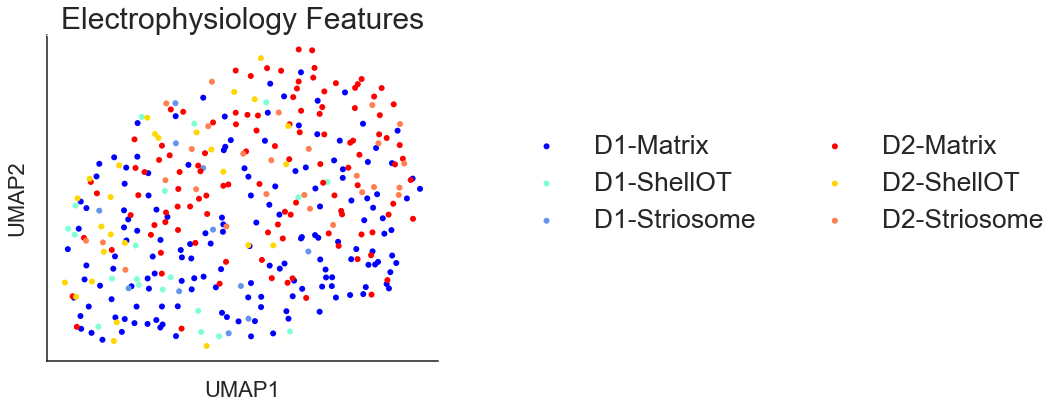

In [155]:
# MSNs only, no pca, manhattan

df_ephys_MSN = df_ephys_trans.iloc[np.array(df_ephys_trans.Class_Corr_label) =='MSN',:]

#df_ephys_MSN.loc[df_ephys_MSN['Subclass_Corr_label']=='','Subclass_Corr_color'] = '#FF00FF'

#df_ephys_MSN.loc[df_ephys_MSN['Subclass_Corr_label']=='D1-Striosome','Subclass_Corr_color'] = 'k'

#df_ephys_MSN.loc[df_ephys_MSN['Subclass_Corr_label']=='D2-Striosome','Subclass_Corr_color'] = 'pink'

#df_ephys_MSN = df_ephys_MSN[[sc not in ['D1-ShellOT', 'D2-ShellOT', 'D1-NUDAP'] for sc in df_ephys_MSN.Subclass_Corr_label]]
df_ephys_MSN = df_ephys_MSN[[sc not in ['D1-NUDAP','D1D2-Hybrid', 'D2-Hybrid-MCHR2'] for sc in df_ephys_MSN.Subclass_Corr_label]]

col_dict = dict()
col_dict['D1-Matrix'] = 'blue'       
col_dict['D2-Matrix'] = 'red'       
col_dict['D1-Striosome'] = 'cornflowerblue'
col_dict['D2-Striosome'] = 'coral'
col_dict['D1D2-Hybrid'] = 'purple'
col_dict['D2-Hybrid-MCHR2'] = 'lime'
col_dict['D1-ShellOT'] = 'aquamarine'
col_dict['D2-ShellOT'] = 'gold'

X_no_chirp = df_ephys_MSN.iloc[:,feat_start_ind:feat_end_nochirp_ind]
df_ephys_MSN = df_ephys_MSN.iloc[np.array(np.sum(X_no_chirp.isna(), axis=1)<25), :]
X_no_chirp = X_no_chirp.iloc[np.array(np.sum(X_no_chirp.isna(), axis=1)<25), :]

imputer = KNNImputer(missing_values=np.nan)
X_imputed = imputer.fit_transform(X_no_chirp)  

scaler = StandardScaler().fit(X_imputed)
X_std = scaler.transform(X_imputed)

#from sklearn.decomposition import PCA
#pca = PCA(n_components=40)
#X_std = pca.fit_transform(X_std)

reducer = umap.UMAP(
#        n_neighbors= 50,   # For Hybrids
#        min_dist=0.2,  # For Hybrids
        n_neighbors= 50,
        min_dist=0.6,
        #n_components=n_components,
        metric='manhattan',
        random_state = 42
    )
embedding = reducer.fit_transform(X_std)

sorted_id = range(len(sorted_classes))
sc_dict = dict(zip(sorted_classes, sorted_id))

df = pd.DataFrame(df_ephys_MSN['Subclass_Corr_color'])
df['Subclass_Corr_label'] = df_ephys_MSN['Subclass_Corr_label']
df['UMAP1'] = embedding[:, 0]
df['UMAP2'] = embedding[:, 1]
df['roi_label'] = [s.replace('_', '') for s in df_ephys_MSN['roi_label']]

fig, ax = plt.subplots(figsize=(7, 6))

for i, dff in df.groupby("Subclass_Corr_label"):
    print(dff.columns)
#    ax.scatter(dff['UMAP1'], dff['UMAP2'], c=np.unique(dff['Subclass_Corr_color']), 
    ax.scatter(dff['UMAP1'], dff['UMAP2'], c=col_dict[dff['Subclass_Corr_label'].iloc[0]], 
                edgecolors='none', label=np.unique(dff['Subclass_Corr_label'])[0], vmin=0, vmax=100)
#    [col_dict[sc] for sc in df_ephys_trans[keep_inds]['Subclass_Corr_label']]
ax.set_xlabel('UMAP1', fontsize = 22, labelpad=20)
ax.set_ylabel('UMAP2', fontsize = 22, labelpad =20)
ax.set_title('Electrophysiology Features', fontsize = 30)
plt.legend(ncol =2, fancybox=False, loc='lower left', bbox_to_anchor=(1.15,0.32), fontsize='large', frameon=False)
ax.set_facecolor('white')
ax.spines['left'].set(linewidth=1.5, color='k')
ax.spines['bottom'].set(linewidth=1.5, color='k')
ax.tick_params(axis='both', which='major', labelsize=22)
ax.set_xticks([])
ax.set_yticks([])

In [47]:
# Bring in cortical IN's
df_anno2 = pd.read_csv("../CrossAreal_cortical/GreatApes_Macaque_NCBI/GreatApes_Macaque_NCBI_RSC-204-371_roi_QC.csv")
set(df_anno2['roi'])
df_anno2['subclass_Corr'].value_counts()
df2 = pd.merge(df_anno2, df_id, how='inner', left_on='cell_name', right_on='cell_specimen_name ', sort=True)
df3 = pd.merge(df2, df_ephys, how='inner', left_on='cell_specimen_id ', right_on='cell_name', sort=True)
df4 = df3[df3['subclass_Tree']=='Pvalb']
df4.shape

inds1a = ['STR' in roi for roi in df4['roi'].astype('str')]
inds1b = np.array(['GPe' in roi for roi in df4['roi'].astype('str')])
inds1c = np.array(['GPi' in roi for roi in df4['roi'].astype('str')])
inds1d = np.array(['OT' in roi for roi in df4['roi'].astype('str')])
inds1e = np.array(['HIP' in roi for roi in df4['roi'].astype('str')])


df4_filt = df4[[not any(c) for c in zip(inds1a,inds1b,inds1c,inds1d,inds1e)]]
df4_filt['roi'].value_counts()

df4_filt = df4_filt[df4_filt['percent_reads_aligned_total']>=25]    # was 50%
print(len(df4_filt))
df4_filt = df4_filt[df4_filt['Genes.Detected']>=1000]
print(len(df4_filt))
#df3_filt = df3_filt[df3_filt['score.Corr']>=0.55]
df4_filt = df4_filt[df4_filt['marker_sum_norm_label'] >= 0.6]
print(len(df4_filt))
# Layer labels have no numerics, no need to filter
#df4_filt['Subclass_Tree'].value_counts()

feat_start_ind2 = df4_filt.columns.get_loc('upstroke_downstroke_ratio_ramp')
feat_end_ind2 = df4_filt.columns.get_loc('peak_deltav_5th_adapt_ratio')
df_ephys_sub2 = df4_filt.iloc[:,feat_start_ind2:feat_end_ind2]
print(df_ephys_sub2.shape)

df_ephys_sub_no_outliers2, df_ephys_trans2, feat_outliers = outlier_transform (df_ephys_sub2, df4_filt, 'subclass_Corr')
#df_ephys_trans2.shape


222
214
112
(112, 84)
upstroke_downstroke_ratio_ramp
not_skewed
SST_Chodl
4
-4
0
0
0
PVALB-COL19A1-ST18
4
-4
0
0
0
CHAT
4
-4
0
0
0
LHX6-TAC3-PLPP4
4
-4
0
0
0
TAC3-LHX8-PLPP4
4
-4
0
0
0
[]
threshold_v_ramp
not_skewed
SST_Chodl
4
-4
0
0
0
PVALB-COL19A1-ST18
4
-4
0
0
0
CHAT
4
-4
0
0
0
LHX6-TAC3-PLPP4
4
-4
0
0
0
TAC3-LHX8-PLPP4
4
-4
0
0
0
[]
width_ramp
skewed
SST_Chodl
4
-4
0
0
0
PVALB-COL19A1-ST18
4
-4
0
0
0
CHAT
4
-4
0
0
0
LHX6-TAC3-PLPP4
4
-4
0
0
0
TAC3-LHX8-PLPP4
4
-4
0
0
0
[]
upstroke_ramp
not_skewed
SST_Chodl
4
-4
0
0
0
PVALB-COL19A1-ST18
4
-4
0
0
0
CHAT
4
-4
0
0
0
LHX6-TAC3-PLPP4
4
-4
0
0
0
TAC3-LHX8-PLPP4
4
-4
0
0
0
[]
downstroke_ramp
not_skewed
SST_Chodl
4
-4
0
0
0
PVALB-COL19A1-ST18
4
-4
0
0
0
CHAT
4
-4
0
0
0
LHX6-TAC3-PLPP4
4
-4
0
0
0
TAC3-LHX8-PLPP4
4
-4
0
0
0
[]
width_suprathresh_ramp
skewed
SST_Chodl
4
-4
0
0
0
PVALB-COL19A1-ST18
4
-4
0
0
0
CHAT
4
-4
0
0
0
LHX6-TAC3-PLPP4
4
-4
0
0
0
TAC3-LHX8-PLPP4
4
-4
0
0
0
[]
trough_v_ramp
not_skewed
SST_Chodl
4
-4
0
0
0
PVALB-COL19A1-ST18

/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_38543/3080752432.py:43: RuntimeWarning: Mean of empty slice
  feat_vals_z = (feat_vals-np.nanmean(feat_vals_sub))/np.nanstd(feat_vals_sub)
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_38543/3080752432.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ephys_trans[feat].iloc[outlier_temp] = np.nan
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


SST_Chodl
4
-4
0
0
0
PVALB-COL19A1-ST18
4
-4
0
0
0
CHAT
4
-4
0
0
0
LHX6-TAC3-PLPP4
4
-4
0
0
0
TAC3-LHX8-PLPP4
4
-4
0
0
0
[]
sag_area_depol
not_skewed
SST_Chodl
4
-4
0
0
0
PVALB-COL19A1-ST18
4
-4
0
0
0
CHAT
4
-4
0
0
0
LHX6-TAC3-PLPP4
4
-4
0
0
0
TAC3-LHX8-PLPP4
4
-4
0
0
0
[]
sag_tau_depol
not_skewed
SST_Chodl
4
-4
0
0
0
PVALB-COL19A1-ST18
4
-4
0
0
0
CHAT
4
-4
0
0
0
LHX6-TAC3-PLPP4
4
-4
0
0
0
TAC3-LHX8-PLPP4
4
-4
0
0
0
[]
adapt_mean
skewed
SST_Chodl
4
-4
0
0
0
PVALB-COL19A1-ST18
4
-4
0
0
0
CHAT
4
-4
0
0
0
LHX6-TAC3-PLPP4
4
-4
0
0
0
TAC3-LHX8-PLPP4
4
-4
0
0
0
[]
isi_cv_mean
not_skewed
SST_Chodl
4
-4
0
0
0
PVALB-COL19A1-ST18
4
-4
0
0
0
CHAT
4
-4
0
0
0
LHX6-TAC3-PLPP4
4
-4
0
0
0
TAC3-LHX8-PLPP4
4
-4
0
0
0
[]
ir_late_mean
not_skewed
SST_Chodl
4
-4
0
0
0
PVALB-COL19A1-ST18
4
-4
0
0
0
CHAT
4
-4
0
0
0
LHX6-TAC3-PLPP4
4
-4
0
0
0
TAC3-LHX8-PLPP4
4
-4
0
0
0
[]
avg_rate_max
not_skewed
SST_Chodl
4
-4
0
0
0
PVALB-COL19A1-ST18
4
-4
0
0
0
CHAT
4
-4
0
0
0
LHX6-TAC3-PLPP4
4
-4
0
0
0
TAC3-LHX8-PLPP4
4
-4
0

In [48]:
df_ephys_trans2['Subclass_Tree_label']= 'PVALB-Cortex' 
#df_ephys_trans2['Subclass_Tree_label'][df_ephys_trans2['cluster_Tree']=='Pvalb_2'] = 'PVALB2-Cortex' 
#df_ephys_trans2['Subclass_Tree_label'] = 'PVALB-Cortex (VISp)'
#df_ephys_trans2['Subclass_Tree_label'][['VISp' not in str for str in df_ephys_trans2['roi']]] = 'PVALB-Cortex (other)'
df_ephys_trans2['Subclass_Tree_color'] = 'mediumslateblue'
#df_ephys_trans2['Subclass_Tree_color'][df_ephys_trans2['cluster_Tree']=='Pvalb_2'] = 'cornflowerblue'
#df_ephys_trans2['Subclass_Tree_color'][['VISp' not in str for str in df_ephys_trans2['roi']]] = 'cornflowerblue'

# Cluster and region don't seem to explain two clumps in cortical pvalbs

df_ephys_trans2.shape

(112, 364)

In [45]:
df_ephys_trans2['cluster_Tree'].value_counts()

Pvalb_3    47
Pvalb_2    29
Pvalb_4    21
Pvalb_1    15
Name: cluster_Tree, dtype: int64

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_38543/342980903.py:51: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(dff['UMAP1'], dff['UMAP2'], c=np.unique(dff['Subclass_Tree_color']),


[]

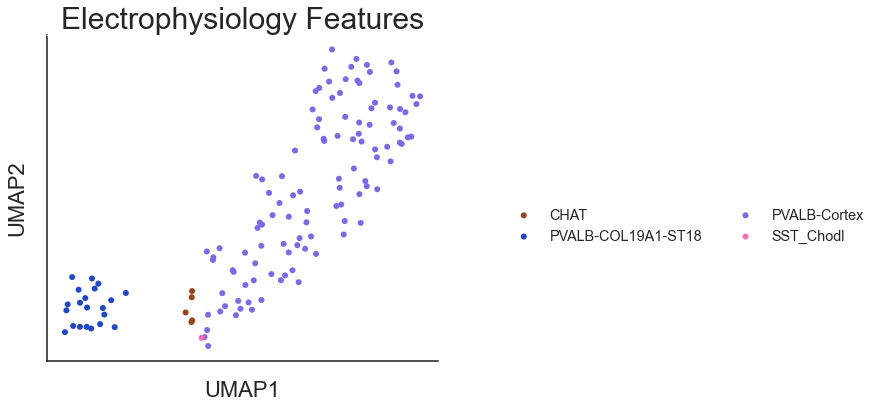

In [49]:
# INs only, with PCA first

df_ephys_IN = df_ephys_trans.iloc[np.array(df_ephys_trans.Class_Tree_label) =='Interneuron',:]
main_subclasses = ['SST_Chodl', 'PVALB-COL19A1-ST18', 'CHAT', 'LHX6-TAC3-PLPP4', 'TAC3-LHX8-PLPP4']
df_ephys_IN = df_ephys_IN[[sc in main_subclasses for sc in df_ephys_IN['Subclass_Tree_label']]]   
df_ephys_IN.reset_index(inplace=True, drop=True)   # Important to reset index for subsequent steps

df_ephys_IN = pd.concat([df_ephys_IN, df_ephys_trans2], axis=0, join='outer')   

df_ephys_IN.loc[df_ephys_IN['Subclass_Tree_label']=='TAC3-LHX8-PLPP4','Subclass_Tree_color'] = 'lightseagreen'
#'#297389'

df_ephys_IN.loc[df_ephys_IN['Subclass_Tree_label']=='SST_Chodl','Subclass_Tree_color'] = 'hotpink'


X_no_chirp = df_ephys_IN.iloc[:,feat_start_ind:feat_end_nochirp_ind] 
df_ephys_IN = df_ephys_IN.iloc[np.array(np.sum(X_no_chirp.isna(), axis=1)<40), :]
X_no_chirp = X_no_chirp.iloc[np.array(np.sum(X_no_chirp.isna(), axis=1)<40), :]

imputer = KNNImputer(missing_values=np.nan)
X_imputed = imputer.fit_transform(X_no_chirp)  

scaler = StandardScaler().fit(X_imputed)
X_std = scaler.transform(X_imputed)

#from sklearn.decomposition import PCA
#pca = PCA(n_components=40)
#pca = PCA(n_components=20)
#X_std = pca.fit_transform(X_std)

reducer = umap.UMAP(
        n_neighbors= 20,   # Default 15, 120 is looking good
        min_dist=0.2,  # Default 0.1, 0.4 is looking good
        #n_components=n_components,
        metric='manhattan',
        random_state = 42
    )
embedding = reducer.fit_transform(X_std)

sorted_id = range(len(sorted_classes))
sc_dict = dict(zip(sorted_classes, sorted_id))

df = pd.DataFrame(df_ephys_IN['Subclass_Tree_color'])
df['Subclass_Tree_label'] = df_ephys_IN['Subclass_Tree_label']
df['UMAP1'] = embedding[:, 0]
df['UMAP2'] = embedding[:, 1]

fig, ax = plt.subplots(figsize=(7, 6))

for i, dff in df.groupby("Subclass_Tree_label"):
    ax.scatter(dff['UMAP1'], dff['UMAP2'], c=np.unique(dff['Subclass_Tree_color']), 
                edgecolors='none', label=np.unique(dff['Subclass_Tree_label'])[0], vmin=0, vmax=100)
ax.set_xlabel('UMAP1', fontsize = 22, labelpad=20)
ax.set_ylabel('UMAP2', fontsize = 22, labelpad =20)
ax.set_title('Electrophysiology Features', fontsize = 30)
plt.legend(ncol =2, fancybox=False, loc='lower left', bbox_to_anchor=(1.15,0.32), fontsize='large', frameon=False)
ax.set_facecolor('white')
ax.spines['left'].set(linewidth=1.5, color='k')
ax.spines['bottom'].set(linewidth=1.5, color='k')
ax.tick_params(axis='both', which='major', labelsize=22)
ax.set_xticks([])
ax.set_yticks([])

Text(0.5, 0, 'Subclass')

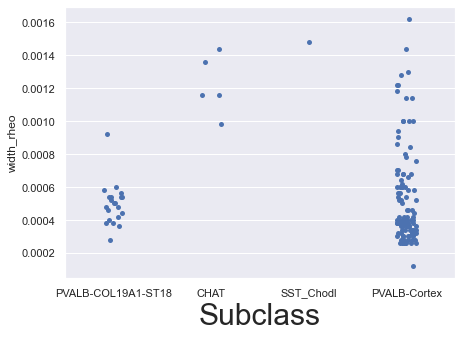

In [55]:
fig, ax1 = plt.subplots(figsize=(7,5))
sns.set(rc={'figure.figsize':(20,40)})
sns.stripplot(data=df_ephys_IN, x="Subclass_Tree_label", y="width_rheo", ax = ax1)
#sns.stripplot(data=df3_filt, x="Subclass_Tree_wglia", y="width_rheo", ax = ax1)
ax1.set_xlabel('Subclass', fontsize = 30)


Text(0.5, 0, 'Subclass')

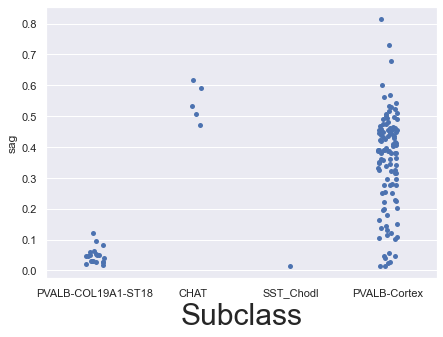

In [57]:
fig, ax1 = plt.subplots(figsize=(7,5))
sns.set(rc={'figure.figsize':(20,40)})
sns.stripplot(data=df_ephys_IN, x="Subclass_Tree_label", y="sag", ax = ax1)
#sns.stripplot(data=df3_filt, x="Subclass_Tree_wglia", y="width_rheo", ax = ax1)
ax1.set_xlabel('Subclass', fontsize = 30)

Text(0.5, 0, 'Subclass')

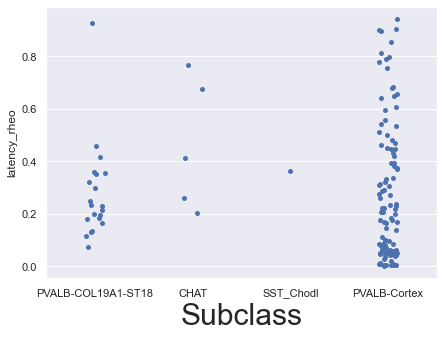

In [58]:
fig, ax1 = plt.subplots(figsize=(7,5))
sns.set(rc={'figure.figsize':(20,40)})
sns.stripplot(data=df_ephys_IN, x="Subclass_Tree_label", y="latency_rheo", ax = ax1)
#sns.stripplot(data=df3_filt, x="Subclass_Tree_wglia", y="width_rheo", ax = ax1)
ax1.set_xlabel('Subclass', fontsize = 30)

In [53]:
set(df_ephys_IN["Subclass_Corr_label"])

{'CHAT', 'D1-Matrix', 'PVALB-COL19A1-ST18', nan}

<IPython.core.display.Javascript object>


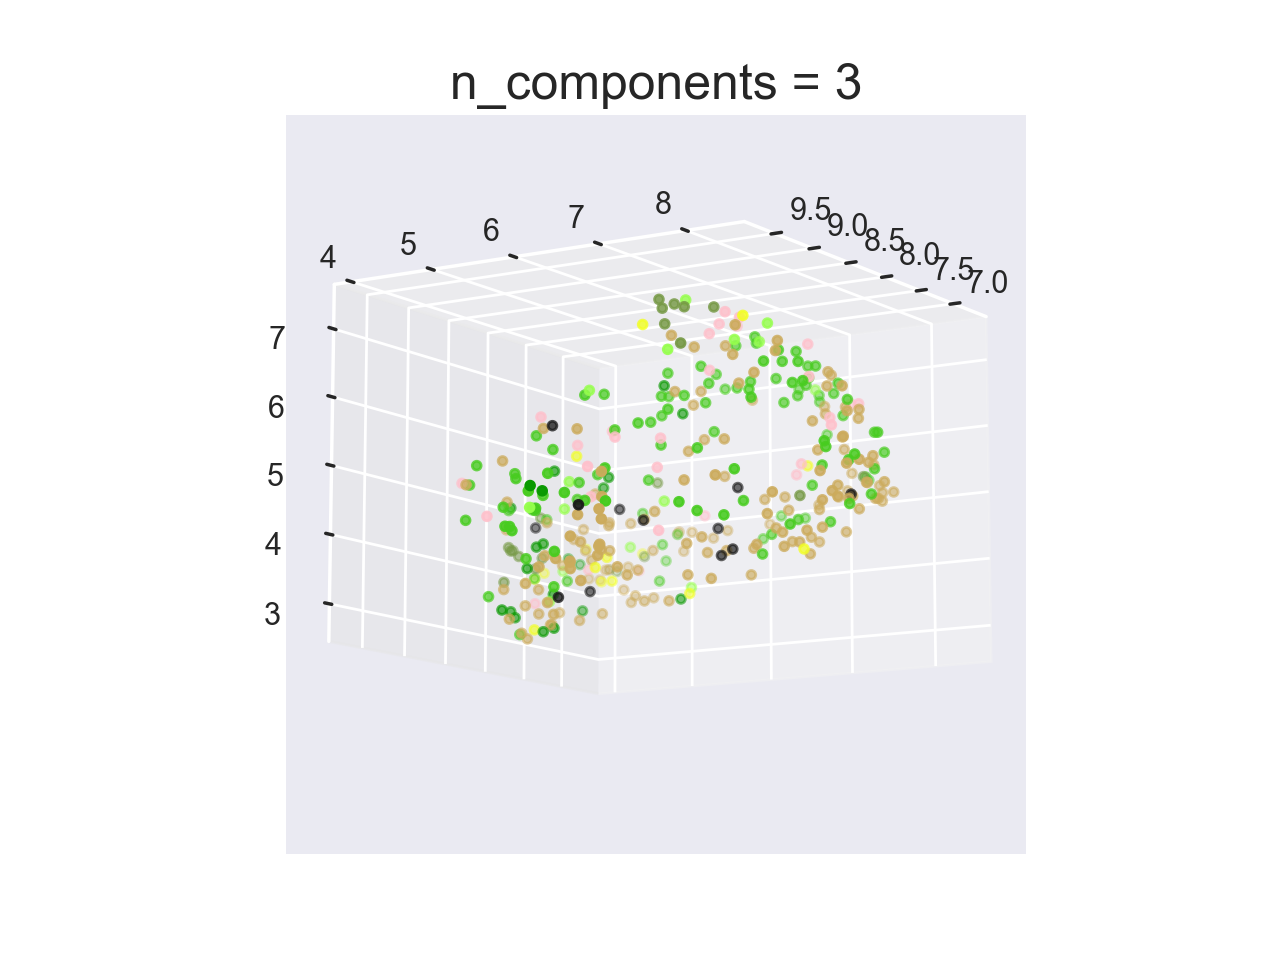

In [170]:
def draw_umap(n_neighbors=50, min_dist=0.1, n_components=2, metric='minkowski', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(X_std);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=df_ephys_MSN['Subclass_Corr_color'])
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=df_ephys_MSN['Subclass_Corr_color'])
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], c=df_ephys_MSN['Subclass_Corr_color'], s=10)
    plt.title(title, fontsize=18)

%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d       
    
draw_umap(n_components=3, title='n_components = 3')

In [164]:
ax.azim = 200
ax.elev = -45

In [80]:
df_ephys_trans.Class_Corr_label

0              MSN
1              MSN
2              MSN
3              MSN
4              MSN
          ...     
592            MSN
593            MSN
594    Interneuron
595            MSN
596            MSN
Name: Class_Corr_label, Length: 597, dtype: object

In [74]:
df_ephys_trans['Class_Corr_label'].value_counts()

MSN            469
Interneuron    128
Name: Class_Corr_label, dtype: int64

In [78]:
df_ephys_trans['virus']

KeyError: 'virus'

/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_47064/2943487704.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(dff['UMAP1'], dff['UMAP2'], c = '#f76348',
/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_47064/2943487704.py:51: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(dff['UMAP1'], dff['UMAP2'], c=np.unique(dff['level3.subclass_Tree_color']),
/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_47064/2943487704.py:48: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(dff['UMAP1'], dff['UMAP2'], c = 'k',
/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_47064/2943487704.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(dff['UMAP1'], dff['UMAP2'], c = '#234713',


([], [])

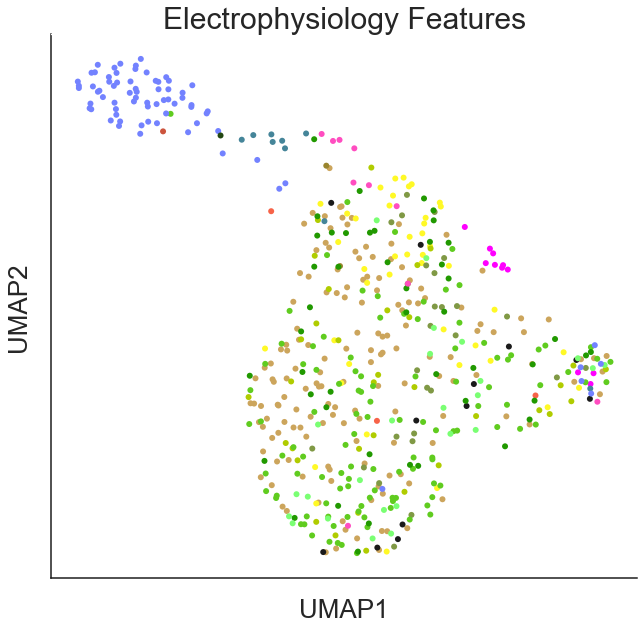

In [133]:
#np.std(X_std[:,3])


# Without chirp features

# Modify confusing colors

import umap

df_ephys_trans.loc[df_ephys_trans['level3.subclass_Tree_label']=='CHAT','level3.subclass_Tree_color'] = '#FF00FF'

df_ephys_trans.loc[df_ephys_trans['level3.subclass_Tree_label']=='TAC3-LHX8-PLPP4','level3.subclass_Tree_color'] = '#297389'

X_no_chirp = df_ephys_trans.iloc[:,597:677]

imputer = KNNImputer(missing_values=np.nan)
X_imputed = imputer.fit_transform(X_no_chirp)  

scaler = StandardScaler().fit(X_imputed)
X_std = scaler.transform(X_imputed)

reducer = umap.UMAP(
    n_neighbors= 50,
    min_dist=0.4,
    metric='manhattan',
    random_state = 0
    )
embedding = reducer.fit_transform(X_std)

sorted_id = range(len(sorted_classes))
sc_dict = dict(zip(sorted_classes, sorted_id))

df = pd.DataFrame(df_ephys_trans['level3.subclass_Tree_color'])
df['level3.subclass_Tree_label'] = df_ephys_trans['level3.subclass_Tree_label']
df['UMAP1'] = embedding[:, 0]
df['UMAP2'] = embedding[:, 1]

fig, ax = plt.subplots(figsize=(10.5, 10))

for i, dff in df.groupby("level3.subclass_Tree_label"):
    if np.unique(dff['level3.subclass_Tree_label']) == 'TAC3-LHX8-PLPP4':
        ax.scatter(dff['UMAP1'], dff['UMAP2'], c = '#234713',
                edgecolors='none', label=np.unique(dff['level3.subclass_Tree_label'])[0], vmin=0, vmax=100)
    elif np.unique(dff['level3.subclass_Tree_label']) == 'CCK-FBXL7':
        ax.scatter(dff['UMAP1'], dff['UMAP2'], c = '#f76348',
                edgecolors='none', label=np.unique(dff['level3.subclass_Tree_label'])[0], vmin=0, vmax=100)
    elif np.unique(dff['level3.subclass_Tree_label']) == 'D2-Hybrid-MCHR2':
        ax.scatter(dff['UMAP1'], dff['UMAP2'], c = 'k',
                edgecolors='none', label=np.unique(dff['level3.subclass_Tree_label'])[0], vmin=0, vmax=100)
    else:
        ax.scatter(dff['UMAP1'], dff['UMAP2'], c=np.unique(dff['level3.subclass_Tree_color']), 
                edgecolors='none', label=np.unique(dff['level3.subclass_Tree_label'])[0], vmin=0, vmax=100)

ax.set_xlabel('UMAP1', fontsize = 26, labelpad=20)
ax.set_ylabel('UMAP2', fontsize = 26, labelpad =20)
ax.set_title('Electrophysiology Features', fontsize = 30)
#plt.legend(ncol =2, fancybox=False, loc='center right', bbox_to_anchor=(1.15,0.32), fontsize='large', frameon=False)
ax.set_facecolor('white')
ax.spines['left'].set(linewidth=1.5, color='k')
ax.spines['bottom'].set(linewidth=1.5, color='k')
ax.tick_params(axis='both', which='major', labelsize=22)
plt.xticks([])
plt.yticks([])

In [127]:
sum(df["level3.subclass_Tree_label"]== 'CCK-FBXL7')

3

In [153]:
df_ephys_trans['level3.subclass_Tree_color'][df_ephys_trans['level3.subclass_Tree_label']=='LHX6-TAC3-PLPP4']

7      #45C0E5
129    #45C0E5
149    #45C0E5
196    #45C0E5
240    #45C0E5
314    #45C0E5
350    #45C0E5
362    #45C0E5
397    #45C0E5
Name: level3.subclass_Tree_color, dtype: object

In [102]:
df.columns
#df.groupby("level3.subclass_Tree_label")

Index(['level3.subclass_Tree_color', 'leve3.subclass_Tree_label', 'UMAP1',
       'UMAP2'],
      dtype='object')

In [103]:
sorted_id = range(len(sorted_classes))
sc_dict = dict(zip(sorted_classes, sorted_id))
sc_dict['D2-Matrix']
[sc_dict[yy] for yy in y]
sns.color_palette()
sorted_id

range(0, 16)

In [216]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df_ephys_trans['level3.subclass_Tree'].map({"D1-Matrix":0, "D2-Matrix":1, "D1-Striosome":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24)

TypeError: list indices must be integers or slices, not float

In [206]:
from logitboost import LogitBoost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Remove classes with less than three members - otherwise it throws an error, and makes more sense for crossvalidation split
counts = df_ephys_trans['level3.subclass_Tree'].value_counts()
sc_remove = counts.index[counts<3]
X = X_std[[sc not in sc_remove for sc in df_ephys_trans['level3.subclass_Tree']],:]   
y = y_orig[[sc not in sc_remove for sc in df_ephys_trans['level3.subclass_Tree']]]
print(X.shape)

test_size = 1/3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, stratify=y, random_state=0)

lboost = LogitBoost(n_estimators=200, random_state=0)
lboost.fit(X_train, y_train)

y_pred_train = lboost.predict(X_train)
y_pred_test = lboost.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print('Training accuracy: %.4f' % accuracy_train)
print('Test accuracy:     %.4f' % accuracy_test)

report_train = classification_report(y_train, y_pred_train)
report_test = classification_report(y_test, y_pred_test)
print('Training\n%s' % report_train)
print('Test\n%s' % report_test)

(522, 92)


/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `base_estimator_` was deprecated in version 1.2 and will be removed in 1.4. Use `estimator_` instead.
  warnings.warn(msg, category=FutureWarning)


Training accuracy: 0.9655
Test accuracy:     0.5000
Training
                    precision    recall  f1-score   support

         D1-Matrix       0.89      1.00      0.94        99
        D1-ShellOT       1.00      1.00      1.00        27
      D1-Striosome       1.00      0.95      0.98        21
       D1D2-Hybrid       1.00      0.94      0.97        16
   D2-Hybrid-MCHR2       1.00      1.00      1.00         8
         D2-Matrix       1.00      0.95      0.97        73
        D2-ShellOT       1.00      0.96      0.98        27
      D2-Striosome       1.00      0.89      0.94        18
   LHX6-TAC3-PLPP4       1.00      1.00      1.00         6
PVALB-COL19A1-ST18       1.00      0.94      0.97        47
         SST_Chodl       1.00      1.00      1.00         6

          accuracy                           0.97       348
         macro avg       0.99      0.97      0.98       348
      weighted avg       0.97      0.97      0.97       348

Test
                    precision  

Index(['CCK-FBXL7', 'D1-NUDAP', 'CHAT', 'TAC3-LHX8-PLPP4', 'CCK-VIP-TAC3'], dtype='object')

In [ ]:
# Try XGBoost

In [ ]:
# Only do crossvalidation on categories with more than 3 cells

# Hyperparameter tuning

percentage correst on train vs test
F1 score, F1 macro

In [42]:
round(0.005 * len(feat_vals))

3

In [52]:
df3_filt_sub['level3.subclass_Tree']

0             D2-Striosome
1                D2-Matrix
2                D1-Matrix
3                D2-Matrix
4                D2-Matrix
               ...        
1080             D2-Matrix
1081            D1-ShellOT
1209            D2-ShellOT
1211             D2-Matrix
1221    PVALB-COL19A1-ST18
Name: level3.subclass_Tree, Length: 527, dtype: object

In [55]:
a = [True, True]
b = [True, False]
a and b

[True, False]